# HR ANALYTICS - CASO ESTUDIO 5

## Entendimiento contextual del proyecto a desarrollar

Se entrega el siguiente set de datos del área de Recursos Humanos de una empresa
del sector de consultoría ___HRAnalytics.csv___. El análisis de los recursos humanos o los
colaboradores está revolucionando la forma en que operan los departamentos de
recursos humanos, lo que lleva a una mayor eficiencia y mejores resultados en
general. Recursos humanos ha estado utilizando la analítica durante años. Sin
embargo, la recopilación, el procesamiento y el análisis de datos han sido en gran
medida manuales y, dada la naturaleza de la dinámica de los recursos humanos y
los KPI de RR.HH., el enfoque ha estado restringiendo a los RR.HH.

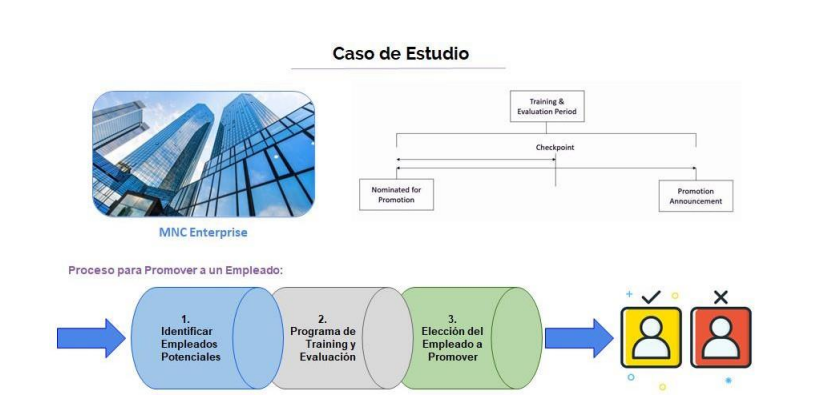

Por lo tanto, es sorprendente que los departamentos de recursos humanos se hayan
dado cuenta de la utilidad del aprendizaje automático tan tarde en el juego. En el
último año por ejemplo la rotación en el área de Analytics de la empresa ha estado
por encima del 20% anual, lo que de una u otra manera dificulta la continuidad de
los procesos y proyectos además de la transferencia de conocimientos. Uno de los
motivos por los cuáles los ex – colaboradores manifiestan que han decidido buscar
nuevas oportunidades es por la falta de línea de carrera en la empresa mencionada.

Debido a que usted está llevando una especialización en Data Science se requiere
que los ayude a identificar a los clientes con alta probabilidad de **SER PROMOVIDOS 
EN LA EMPRESA**

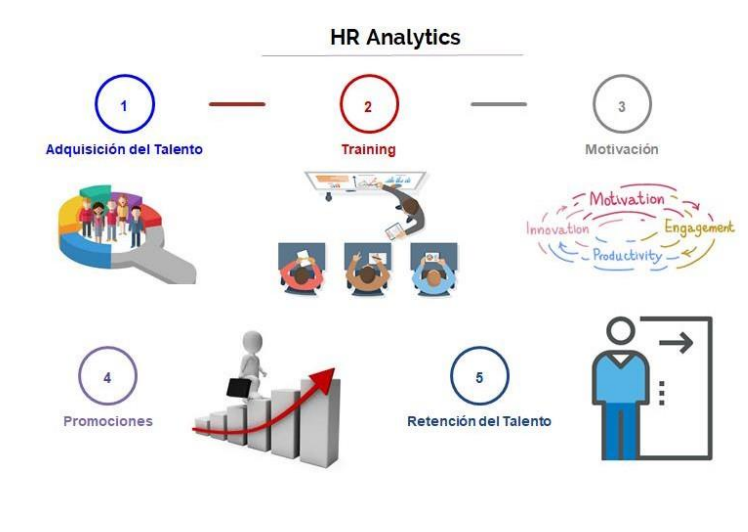

**<ins>LAS VARIABLES QUE SE DISPONIBILIZAN SON:</ins>**

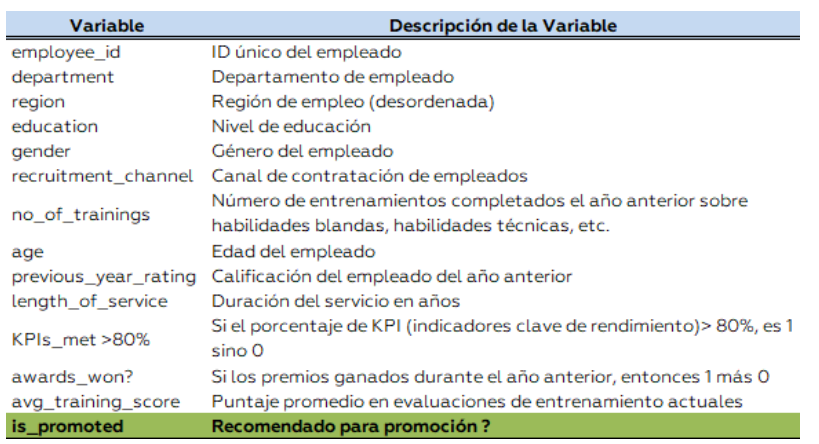

# ANÁLISIS EXPLORATORIO DE DATOS

In [1]:
##Instalando las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
##Asignando los datos a un dataframe df
df = pd.read_csv('HRAnalytics.csv', encoding='UTF-8')
df.head(10)

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   
5        58896          Analytics   region_2        Bachelor's      m   
6        20379         Operations  region_20        Bachelor's      f   
7        16290         Operations  region_34  Master's & above      m   
8        73202          Analytics  region_20        Bachelor's      m   
9        28911  Sales & Marketing   region_1  Master's & above      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   
5            sourcing                2   31                   3.0   
6               other                1   31                   3.0   
7            sourcing                1   33                   3.0   
8               other                1   28                   4.0   
9            sourcing                1   32                   5.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   
5                  7              0            0                  85   
6                  5              0            0                  59   
7                  6              0            0                  63   
8                  5              0            0                  83   
9                  5              1            0                  54   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0  
5            0  
6            0  
7            0  
8            0  
9            0

In [3]:
##Vista general de los datos, observando valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


<ins>**Observaciones:**</ins>
* Verificamos que tenemos 14 columnas, de las cuales la primera columna es el ID (Se elimina la columna)
+ Total de registros (filas) 54808, notamos que dos variables tienen nulos ('education' y 'previous_year_rating'), pero no son considerables, son pocos nulos para la cantidad de datos totales. Se procederá a realizar la IMPUTACION de estos valores
- Observamos, que tenemos datos enteros, flotantes y objetos
* La variable objetivo (target), es la variale 'is_promoted', para saber si se dara promoción o no al empleado

## Preparación y valor agregado de los datos

En esta etapa revisaremos la data y la estructura de la información

In [4]:
## Las dimensiones del dataframe, 14 columnas y 54808 filas
df.shape

(54808, 14)

In [5]:
## Observamos los nombres de las variables que analizaremos
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
df.head(20)

employee_id         department     region         education gender  \
0         65438  Sales & Marketing   region_7  Master's & above      f   
1         65141         Operations  region_22        Bachelor's      m   
2          7513  Sales & Marketing  region_19        Bachelor's      m   
3          2542  Sales & Marketing  region_23        Bachelor's      m   
4         48945         Technology  region_26        Bachelor's      m   
5         58896          Analytics   region_2        Bachelor's      m   
6         20379         Operations  region_20        Bachelor's      f   
7         16290         Operations  region_34  Master's & above      m   
8         73202          Analytics  region_20        Bachelor's      m   
9         28911  Sales & Marketing   region_1  Master's & above      m   
10        29934         Technology  region_23               NaN      m   
11        49017  Sales & Marketing   region_7        Bachelor's      f   
12        60051  Sales & Marketing   region_4        Bachelor's      m   
13        38401         Technology  region_29  Master's & above      m   
14        77040                R&D   region_2  Master's & above      m   
15        43931         Operations   region_7        Bachelor's      m   
16         7152         Technology   region_2        Bachelor's      m   
17         9403  Sales & Marketing  region_31        Bachelor's      m   
18        17436  Sales & Marketing  region_31        Bachelor's      m   
19        54461         Operations  region_15        Bachelor's      m   

   recruitment_channel  no_of_trainings  age  previous_year_rating  \
0             sourcing                1   35                   5.0   
1                other                1   30                   5.0   
2             sourcing                1   34                   3.0   
3                other                2   39                   1.0   
4                other                1   45                   3.0   
5             sourcing                2   31                   3.0   
6                other                1   31                   3.0   
7             sourcing                1   33                   3.0   
8                other                1   28                   4.0   
9             sourcing                1   32                   5.0   
10            sourcing                1   30                   NaN   
11            sourcing                1   35                   5.0   
12            sourcing                1   49                   5.0   
13               other                2   39                   3.0   
14            sourcing                1   37                   3.0   
15               other                1   37                   1.0   
16               other                1   38                   3.0   
17               other                1   34                   1.0   
18               other                1   34                   5.0   
19               other                1   37                   3.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                   8              1            0                  49   
1                   4              0            0                  60   
2                   7              0            0                  50   
3                  10              0            0                  50   
4                   2              0            0                  73   
5                   7              0            0                  85   
6                   5              0            0                  59   
7                   6              0            0                  63   
8                   5              0            0                  83   
9                   5              1            0                  54   
10                  1              0            0                  77   
11                  3              1            0                  50   
12                  5        

In [7]:
## Creamos un back up de la base
df_mod = df.copy()

## Eliminamos la variable identificadira de la base 'employee_id'
## Trabajaremos con este nuevo dataframe
df_mod = df_mod.drop(columns = ['employee_id'])

In [8]:
## Notamos que ahora el dataframe inicia con la variable 'department'
df_mod.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0

## Exámen gráfico y descriptivo numérico

In [9]:
## Iniciamos analizando aspectos generales de las variables numéricas
df_mod.describe()

no_of_trainings           age  previous_year_rating  length_of_service  \
count     54808.000000  54808.000000          50684.000000       54808.000000   
mean          1.253011     34.803915              3.329256           5.865512   
std           0.609264      7.660169              1.259993           4.265094   
min           1.000000     20.000000              1.000000           1.000000   
25%           1.000000     29.000000              3.000000           3.000000   
50%           1.000000     33.000000              3.000000           5.000000   
75%           1.000000     39.000000              4.000000           7.000000   
max          10.000000     60.000000              5.000000          37.000000   

       KPIs_met >80%   awards_won?  avg_training_score   is_promoted  
count   54808.000000  54808.000000        54808.000000  54808.000000  
mean        0.351974      0.023172           63.386750      0.085170  
std         0.477590      0.150450           13.371559      0.279137  
min         0.000000      0.000000           39.000000      0.000000  
25%         0.000000      0.000000           51.000000      0.000000  
50%         0.000000      0.000000           60.000000      0.000000  
75%         1.000000      0.000000           76.000000      0.000000  
max         1.000000      1.000000           99.000000      1.000000

<ins>**Observaciones Generales:**</ins>

* La variable __'is_promoted'__ es binaria (0 o 1). La media nos sale 0.08517, lo que significa que aproximadamente el 8.517% de empleados han sido promovidos, lo que demuestra que la mayoria no lo ha sido.
* En el __'np_of_trainings'__, notamos que tenemos una media de 1.253011, y vemos que tanto el minimo como el 25%-50%-75% son valor 1, mientras que el maximo es valor 10, esto nos indica que debe existir algun valor atipico en estos datos. La mayoria de empleados han realizado solo 1 entrenamiento.
* En la variable __'age'__, tambien observamos que la media es 34.803915, y vemos que el maximo se desfasa un poco, posibles valores atipicos en los datos. La edad promedio es aproximadamente de 34.80.
* En la variable __'lenght_of_service'__, notamos que la media es 5.865512, y el valor maximo se desfasa mucho, posibles valores atipicos en los datos. La antiguedad promedio de los empleados es de 5.87 años en la empresa.
* La variable __'previous_year_rating'__, nos indica que la calificación promedio del año anterior es de 3.33.
* La variable __'KPIs_met >80%'__, al ser variable binaria, sucede igual que el target, la media nos indica que alrededor del 35.20% de los empleados han cumplido con KPIs >80%.
* La variable __'awards_won?'__, al ser binaria, la media nos indica que alrededor de 2.32% de empleados han ganado premios el año anterior.
* La variable __'avg_training_score'__, nos indica que la puntuacion promedia de entrenamiento de los empleados es de 63.39


## Análisis Univariado

### <ins>**Análisis Univariado: 'is_promoted'**</ins>

La variable 'is_promoted' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaria una predicción del valor de esta variable, por lo que vamos a estudiarla con mayor detenimiento

In [10]:
## Frecuencia de la variable 
df_mod['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Observamos que 50140 empleados no han sido promovidos, mientras que solo 4668 empleados si lo han sido

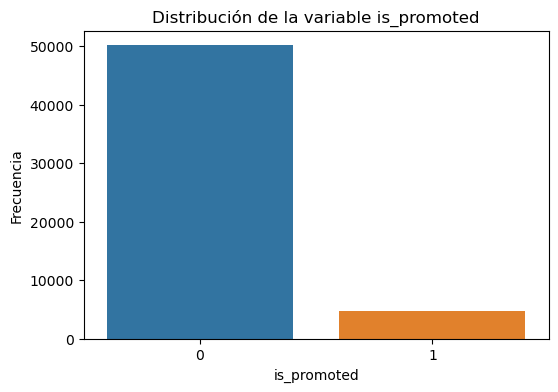

In [11]:
# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=df_mod)
plt.title('Distribución de la variable is_promoted')
plt.xlabel('is_promoted')
plt.ylabel('Frecuencia')
plt.show()

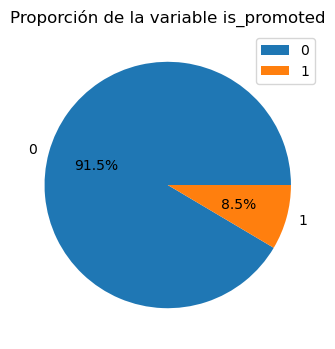

In [12]:
## Gráfica de torta
valores = df_mod['is_promoted'].value_counts()
etiqueta = df_mod['is_promoted'].unique()
plt.figure(figsize=(6,4))
plt.pie(valores,labels=etiqueta,autopct="%1.1f%%")
plt.legend(loc='best')
plt.title('Proporción de la variable is_promoted')
plt.show()

### <ins>Análisis Univariado:Variables numéricas</ins>

In [13]:
variables_numericas = list(df_mod.describe().columns)
variables_numericas

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

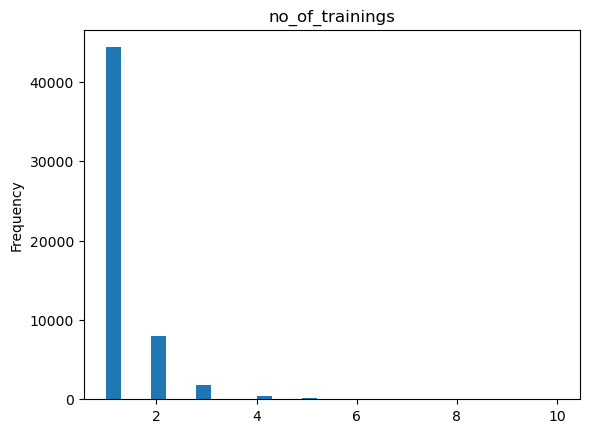

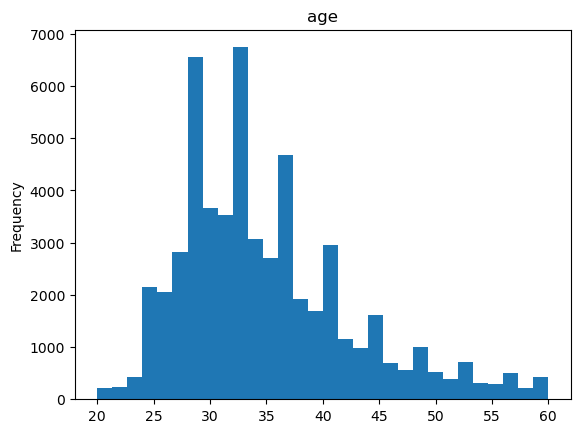

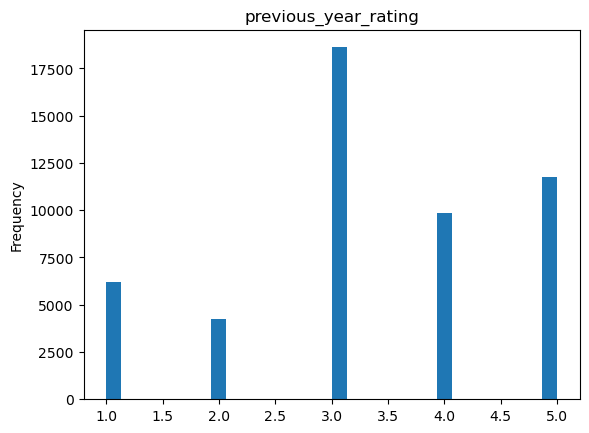

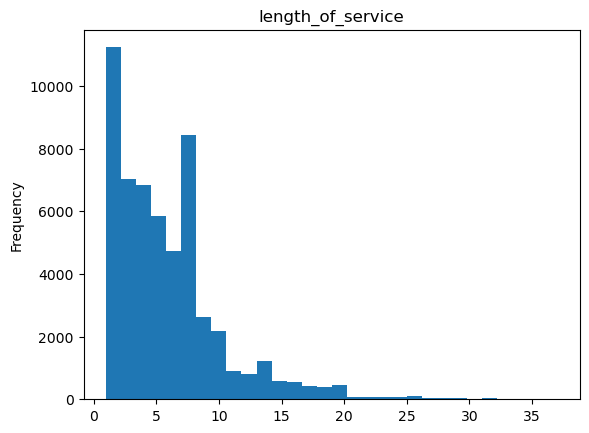

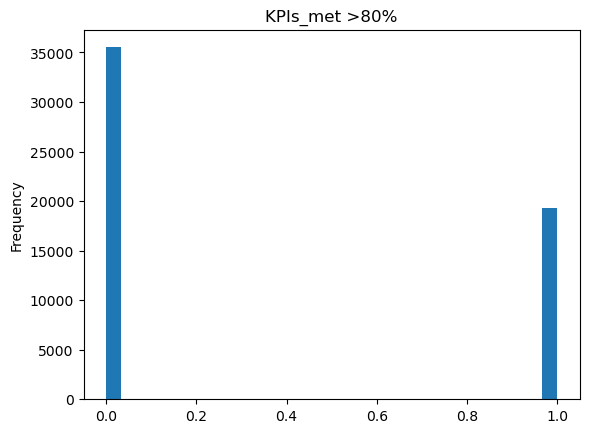

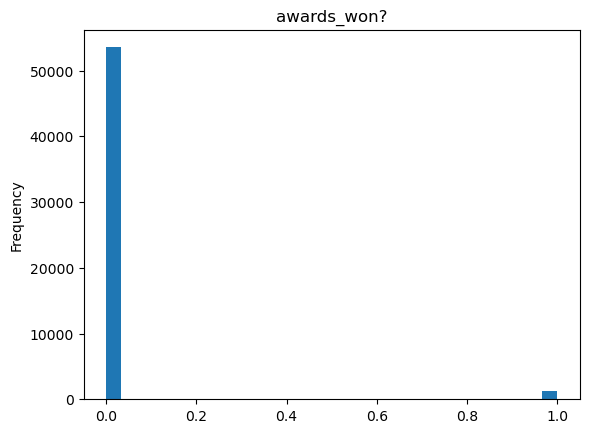

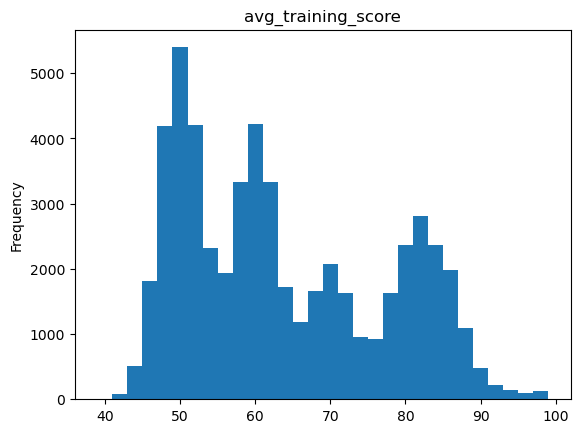

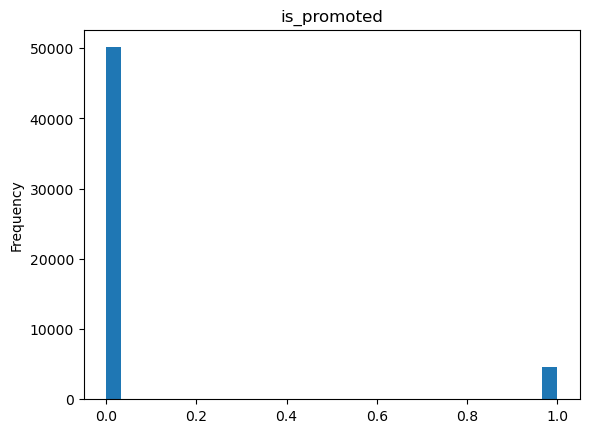

In [14]:
## Realizamos histograma para analizar la distribución de cada variable numérica
for var in variables_numericas:
    df_mod[var].plot(kind='hist', title=var, bins=30)
    plt.show()

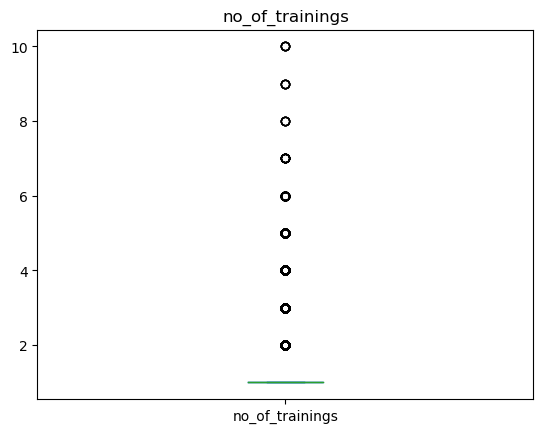

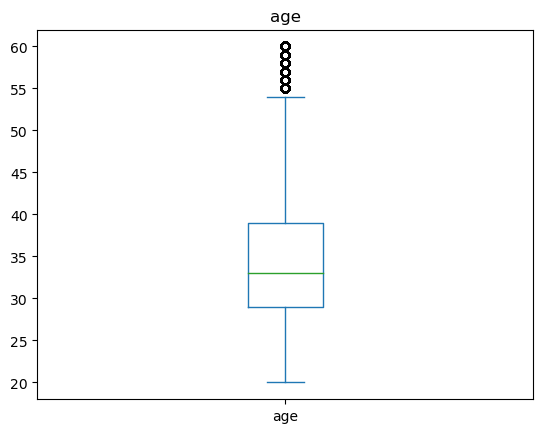

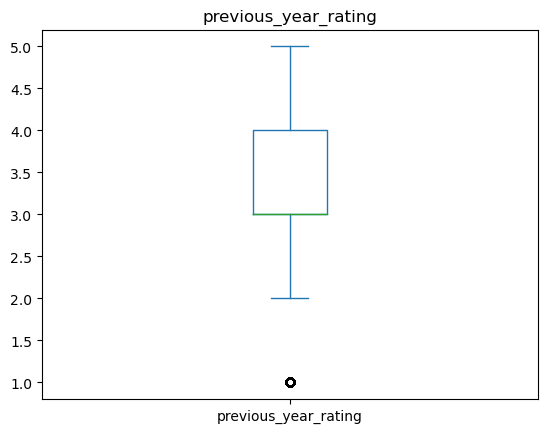

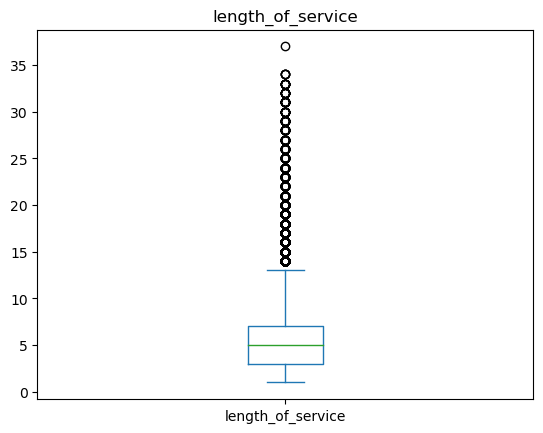

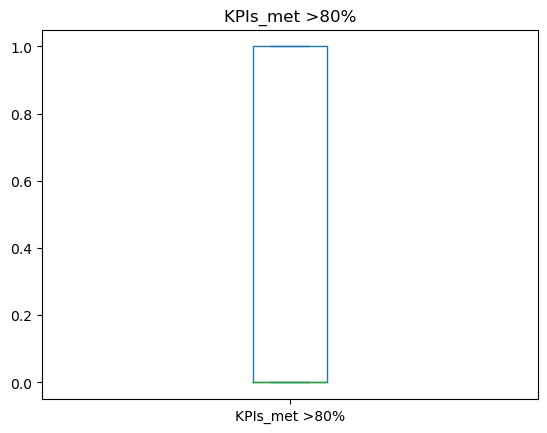

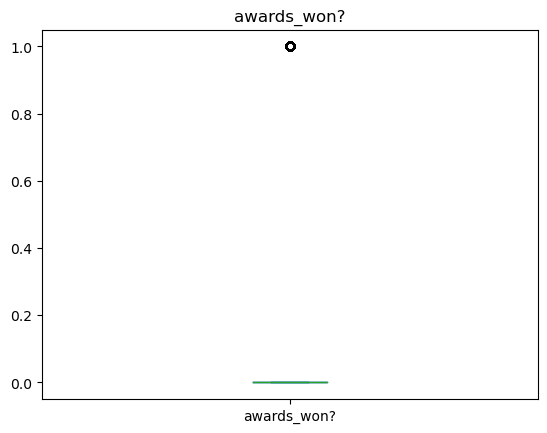

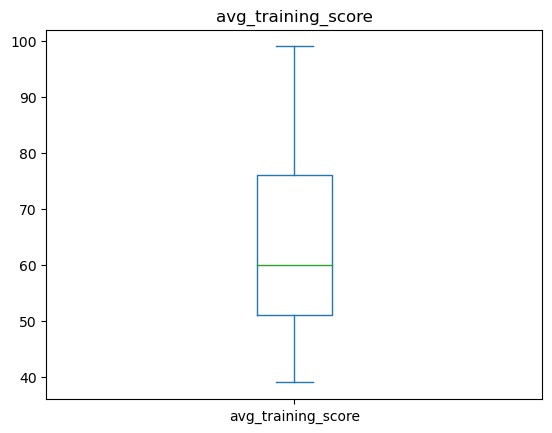

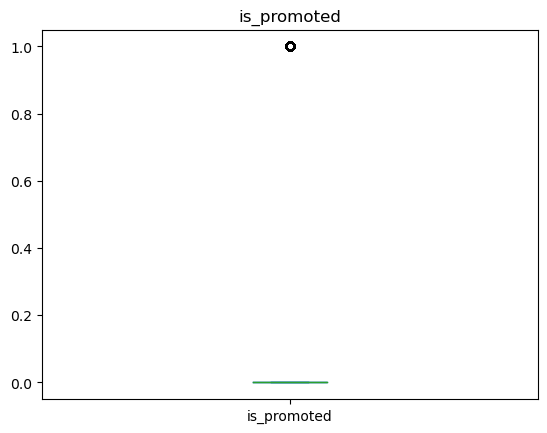

In [15]:
## Realizamos boxplot para analizar la distribución de cada variable numérica
for var in variables_numericas:
    df_mod[var].plot(kind='box', title=var)
    plt.show()

* ***Al analizar las variables numéricas, observamos que tenemos información relevante para todas, por ende si se considerarán para los análisis. Observar algunos anómalos en ciertas variables, especialmente en las que no son binarias***
* ***Observamos posibles atipicos bien notorios en 'no_of_trainings' y 'length_of_service'***

### <ins>Análisis Univariado: Variables Categóricas</ins>

In [16]:
variables_numericas = df_mod.describe().columns
variables_categoricas = list(df_mod.drop(columns=variables_numericas).columns)
variables_categoricas


['department', 'region', 'education', 'gender', 'recruitment_channel']

In [17]:
df_mod[variables_categoricas]

department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  
0                sourcing  
1                   other  
2                sourcing  
3                   other  
4                   other  
...                   ...  
54803            sourcing  
54804               other  
54805               other  
54806            sourcing  
54807               other  

[54808 rows x 5 columns]

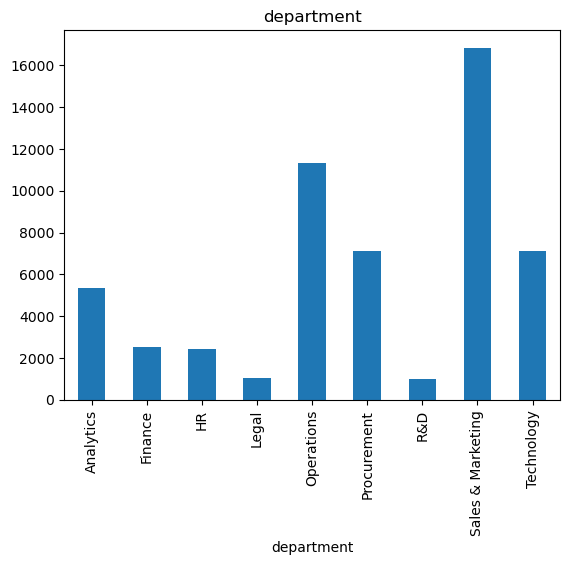

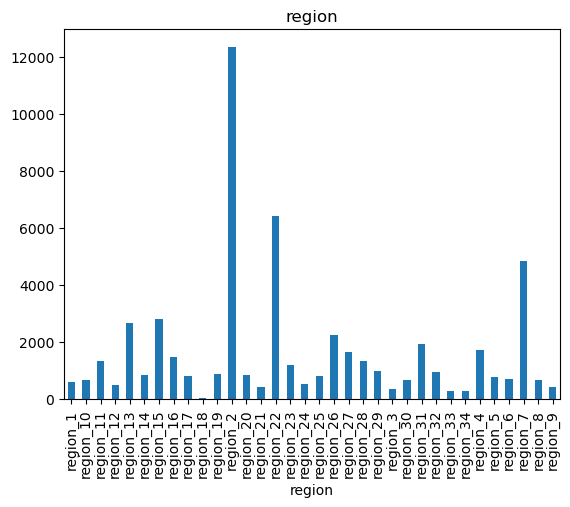

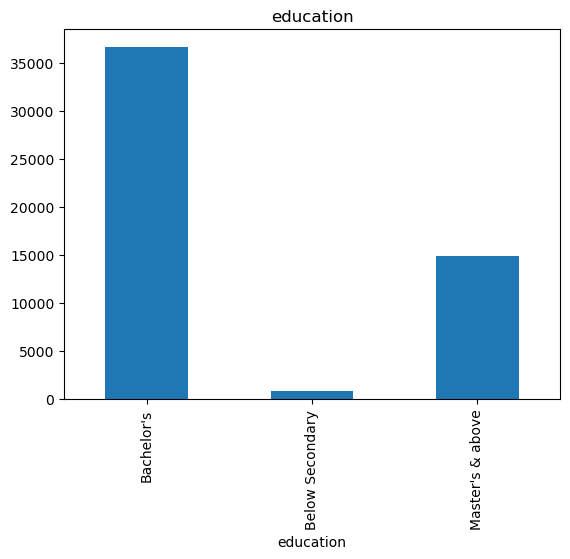

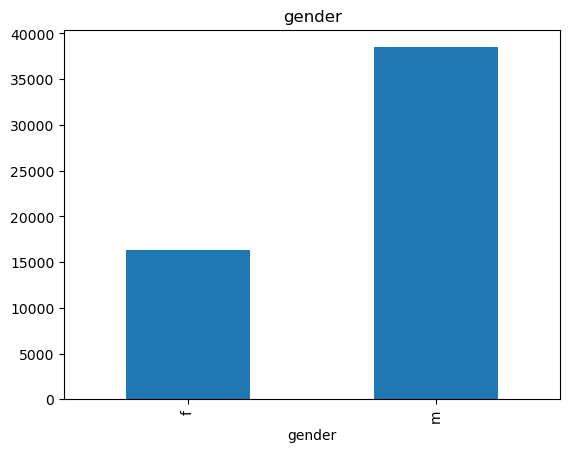

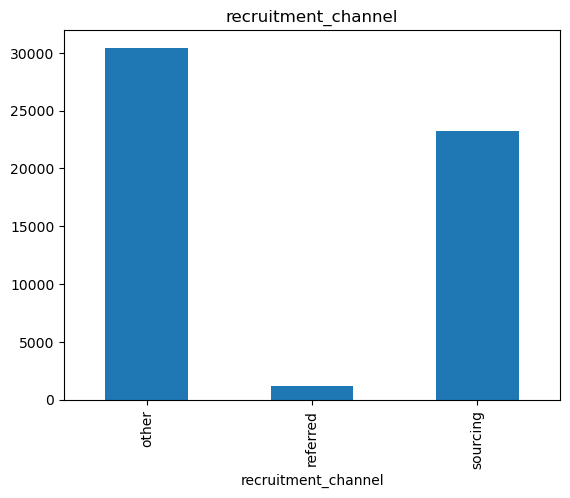

In [18]:
## Realizamos un gráfico de barras para revisar la distribución de frecuencias de cada variable categorica

for var in variables_categoricas:
    df_mod.groupby(var)[var].count().plot.bar()
    plt.title(var)
    plt.show()

***Observamos los gráficos de frecuencias y observamos que todas las variables tienen información para todos sus subgeneros, por ende estas variables categóricas si se considerarán para los análisis***

## Análisis Bivariado

### <ins>Análisis Bivariado: Variable target Vs. Variables Numéricas - Gráfica de frecuencia</ins>

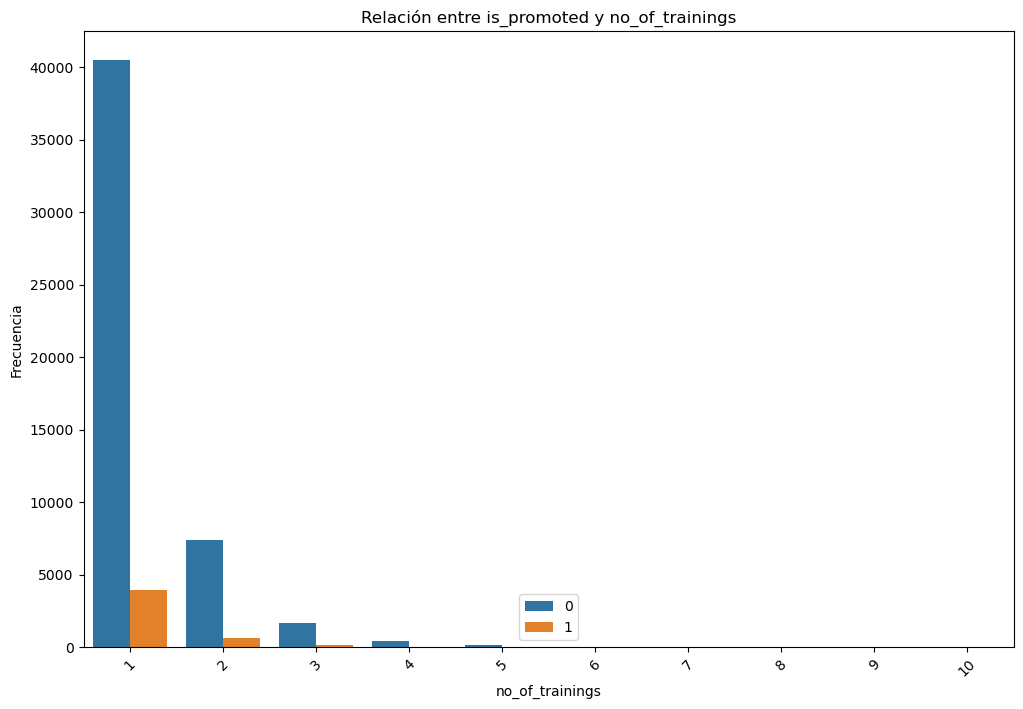

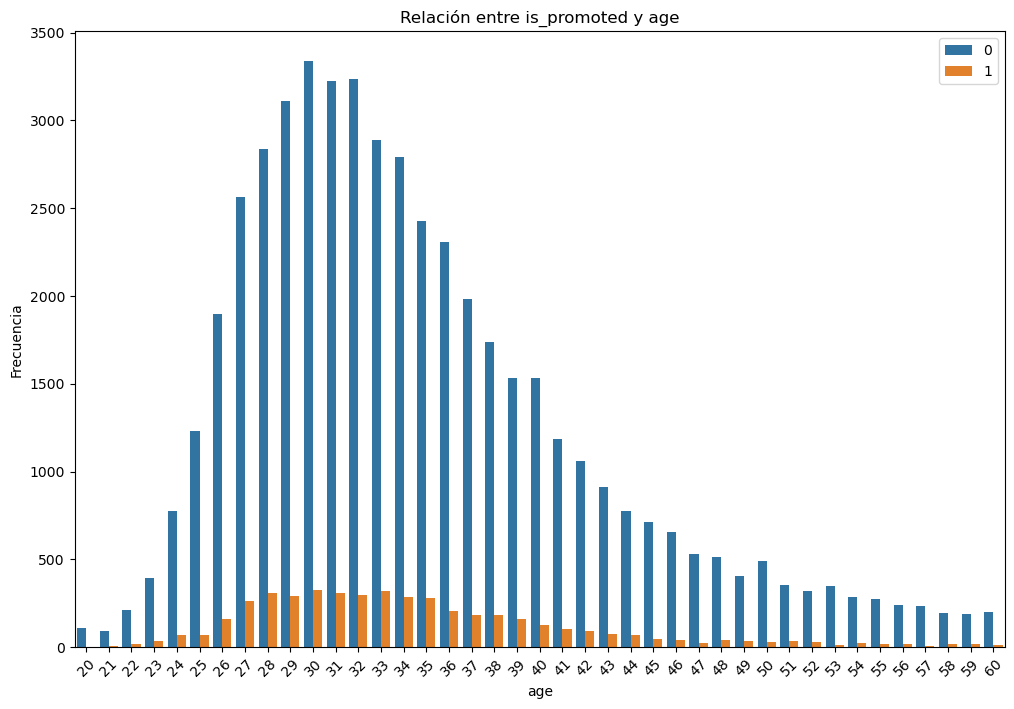

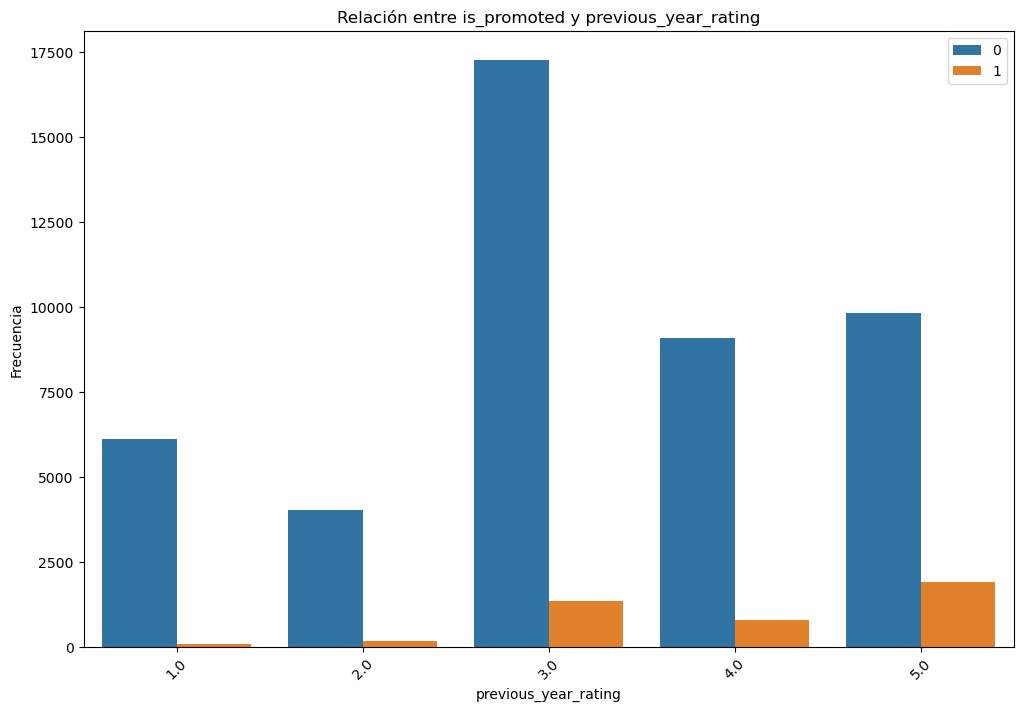

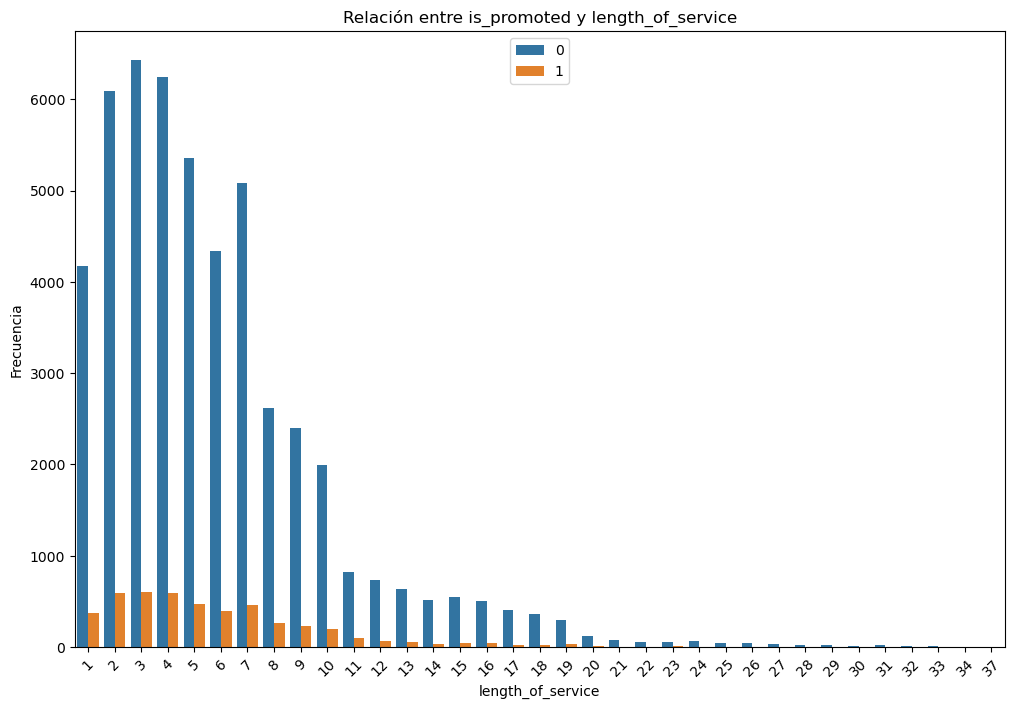

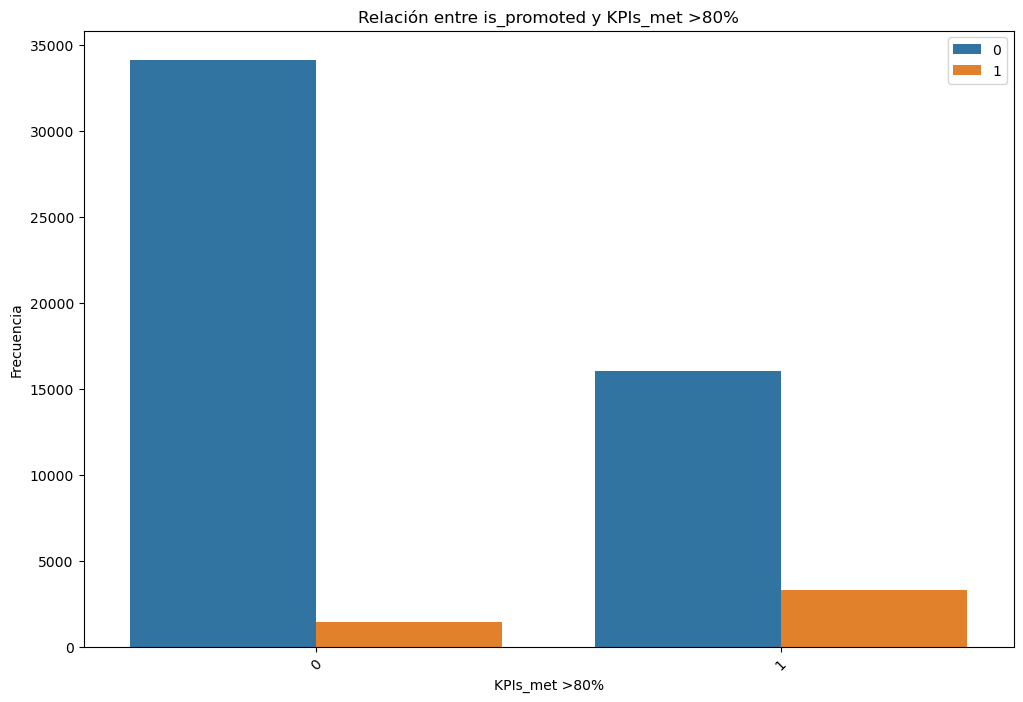

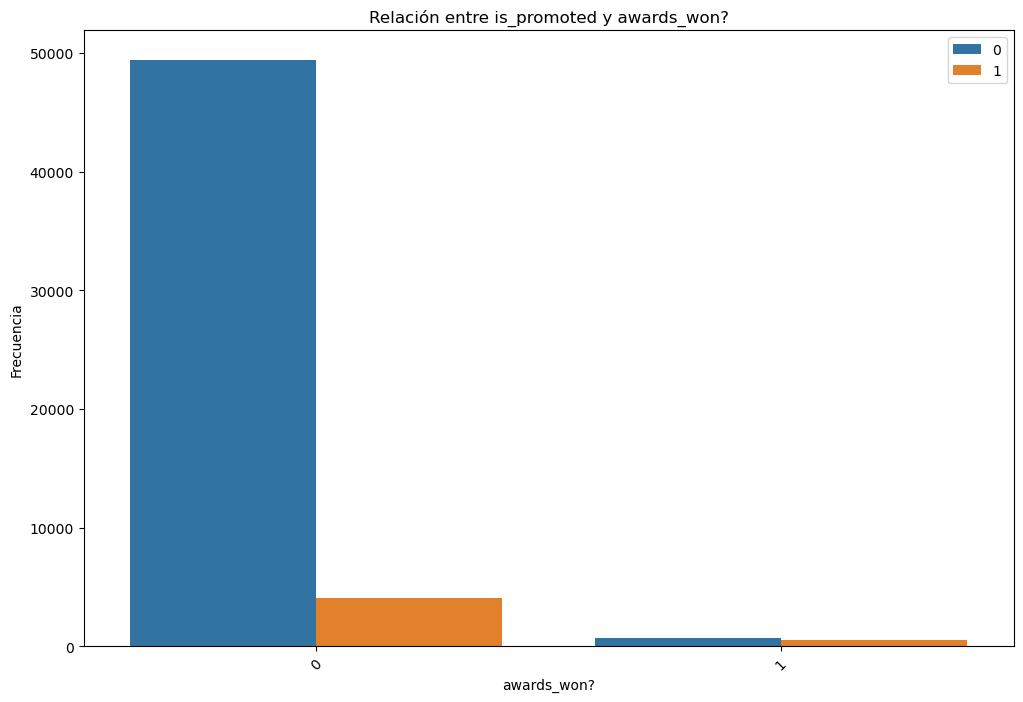

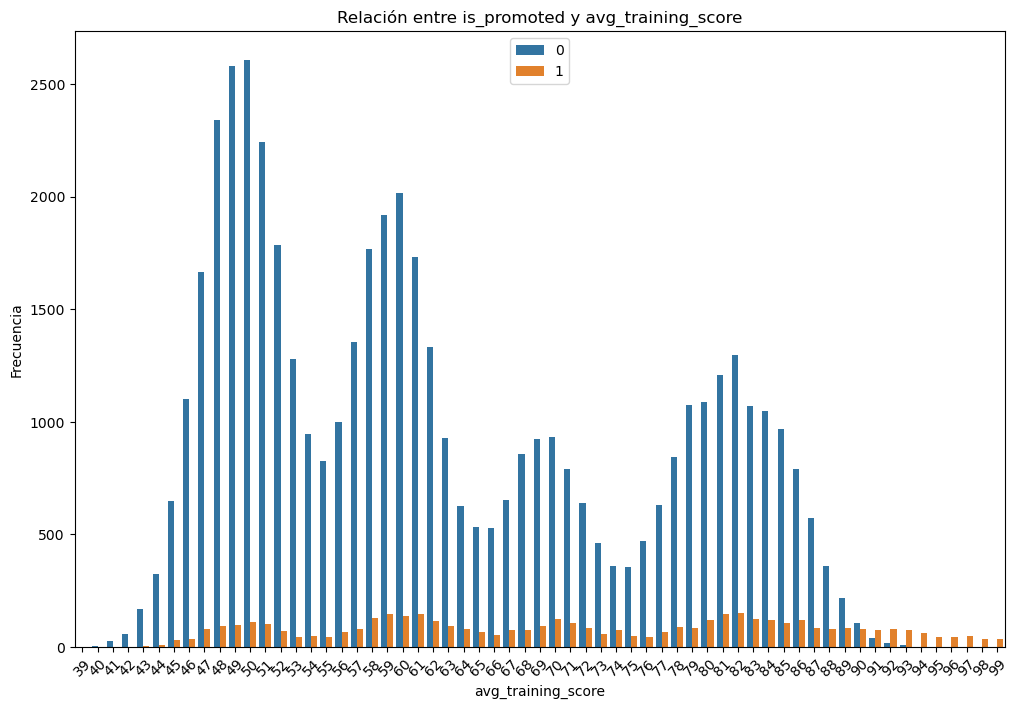

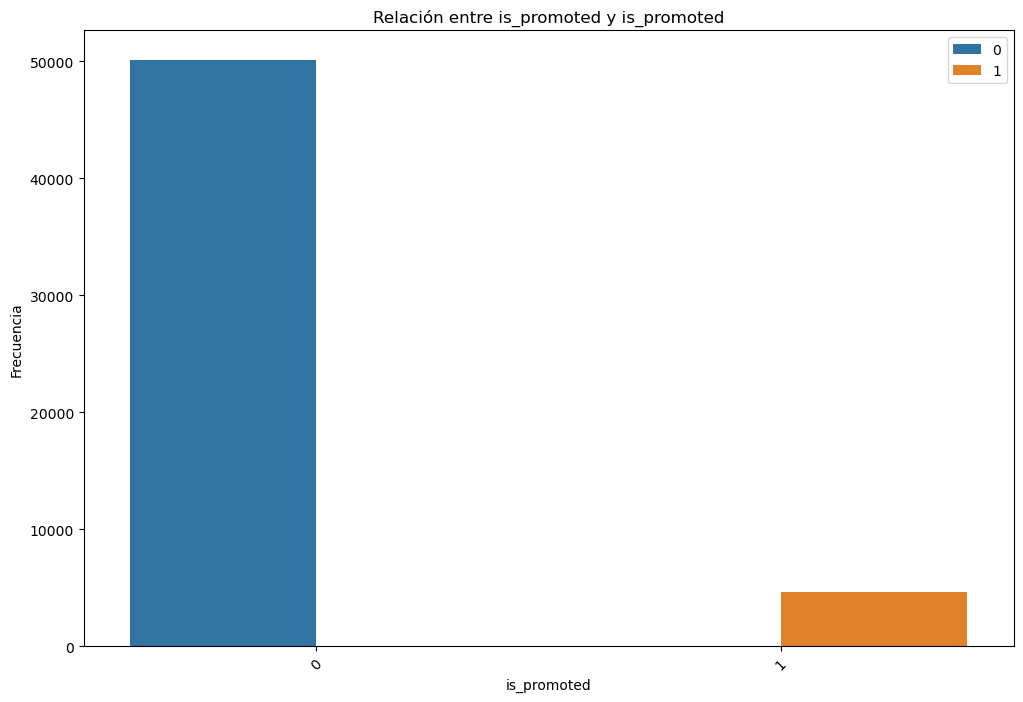

In [19]:
## Relacion de la variable 'is_promoted', con las demas variables numéricas. Gráfica de barras
for var in variables_numericas:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=var, hue='is_promoted', data=df_mod)
    plt.title(f'Relación entre is_promoted y {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

* ***Volvemos a observar la relación entre la variable is_promoted con todas las demás variables numéricas***
* ***Observamos nuevamente posibles atipicos bien notorios en 'no_of_trainings' y 'length_of_service'***

### <ins>Relación entre Variable target y Variables Numéricas - Scatter Plot</ins>

In [20]:
## Primero retiramos los valores nulos, solo para hacer los cálculos
df_mod_drop = df_mod.dropna(how='any')

***************************************************************************
***************************************************************************
[[ 1.         -0.02500557]
 [-0.02500557  1.        ]]


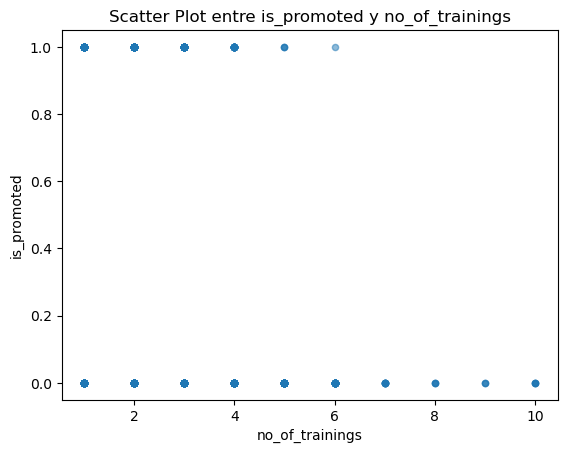

***************************************************************************
***************************************************************************
[[ 1.         -0.02241243]
 [-0.02241243  1.        ]]


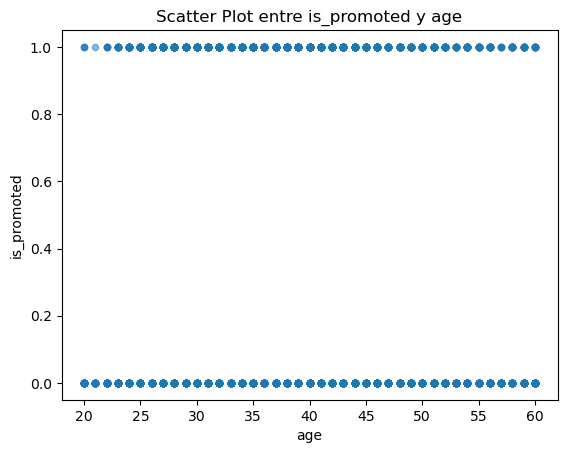

***************************************************************************
***************************************************************************
[[1.         0.15871502]
 [0.15871502 1.        ]]


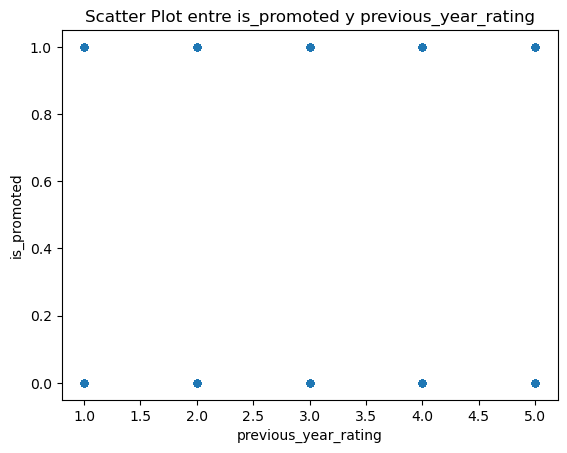

***************************************************************************
***************************************************************************
[[ 1.         -0.01426698]
 [-0.01426698  1.        ]]


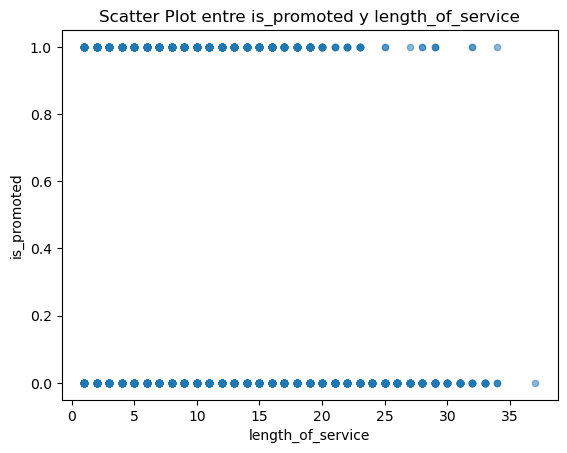

***************************************************************************
***************************************************************************
[[1.         0.21993315]
 [0.21993315 1.        ]]


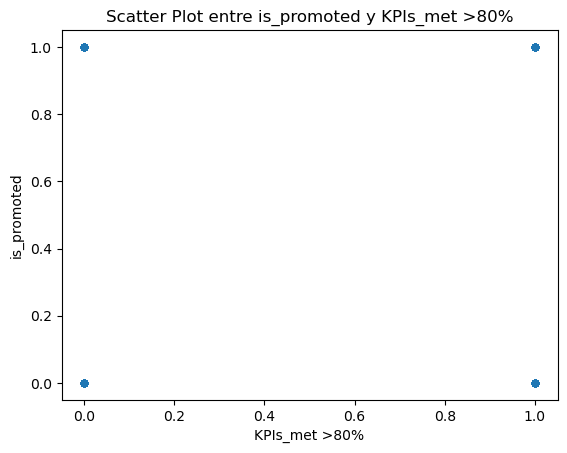

***************************************************************************
***************************************************************************
[[1.         0.19697057]
 [0.19697057 1.        ]]


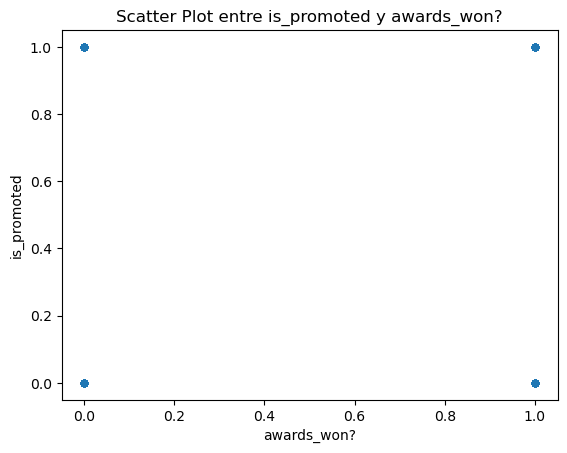

***************************************************************************
***************************************************************************
[[1.         0.17949439]
 [0.17949439 1.        ]]


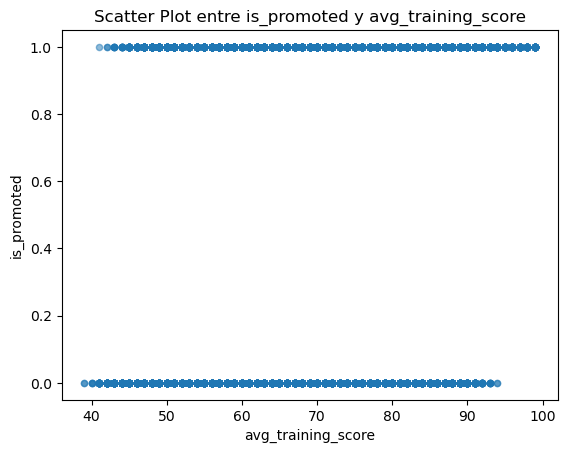

***************************************************************************
***************************************************************************
[[1. 1.]
 [1. 1.]]


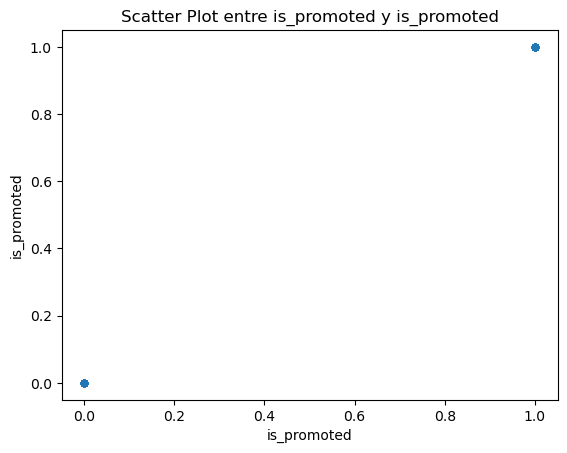

In [21]:
## Relacion de la variable 'is_promoted', con las demas variables numéricas. Gráfica scatter
for var in variables_numericas:
    print('***'*25)
    print('***'*25)
    print(np.corrcoef(df_mod_drop['is_promoted'],df_mod_drop[var]))
    data = pd.concat([df_mod_drop['is_promoted'],df_mod_drop[var]],axis=1)
    data.plot.scatter(x=var,y='is_promoted',alpha=0.5)
    plt.title(f'Scatter Plot entre is_promoted y {var}')
    plt.show()

<ins>**Considerando lo siguiente:**</ins>

> * Mayor de 70% o menos de -70% --> Considerado como bueno
> * Entre 40% y 70% y entre -40% y -70% --> Considerado como aceptable
> * Entre -40% y 40% --> Considerado malo, descartar

* ***Observamos, que todas las correlaciones nos dan un valor que en teoría se deberia descartar, porque se encuentra entre -40% y 40%, pero en este caso, tambien obervamos que si hay bastante data para cada variable correspondiente con nuestra variable objetivo. Asimismo, no tenemos muchas variables en nuestro conjunto de datos, por eso que si consideraremos todas las variables para los análisis posteriores***
* ***Observamos posibles atipicos bien notorios en 'no_of_trainings' y 'length_of_service'***

### <ins>Relación entre Variable target y Variables numéricas discretas</ins>

In [22]:
## Tenemos las siguientes variables numéricas
df_mod.describe().columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

***De estas las que consideraremos discretas son: no_of_trainings, previous_year_rating, KPI_met >80%, y awards_won?***

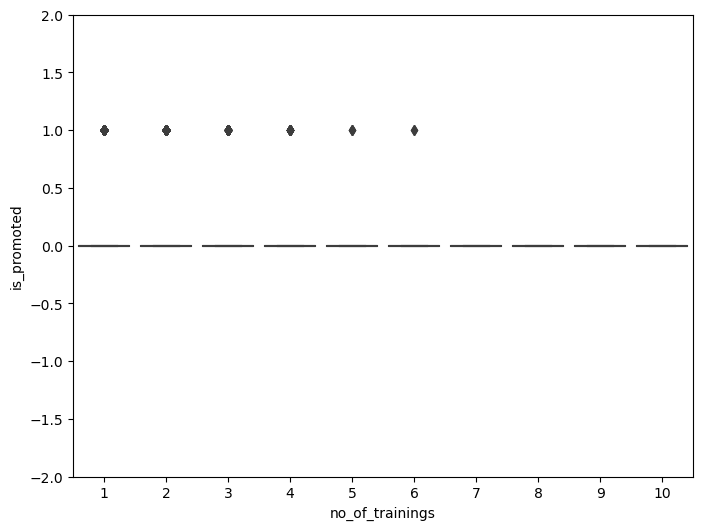

In [23]:
## Diagrama de cajas no_of_trainings/is_promoted:

var = 'no_of_trainings'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.show()


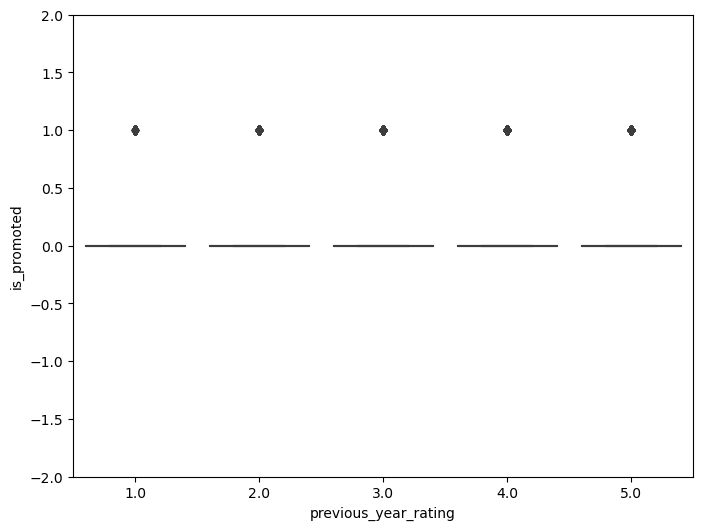

In [24]:
## Diagrama de cajas previous_year_rating/is_promoted:

var = 'previous_year_rating'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.show()

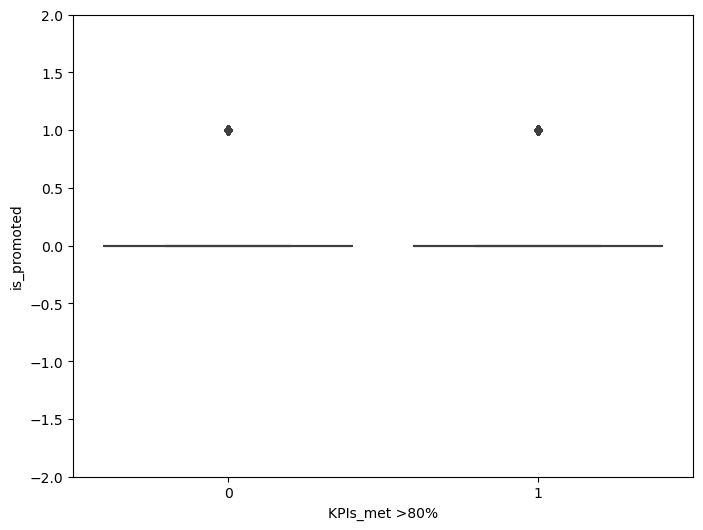

In [25]:
## Diagrama de cajas KPIs_met >80%/is_promoted:

var = 'KPIs_met >80%'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.show()

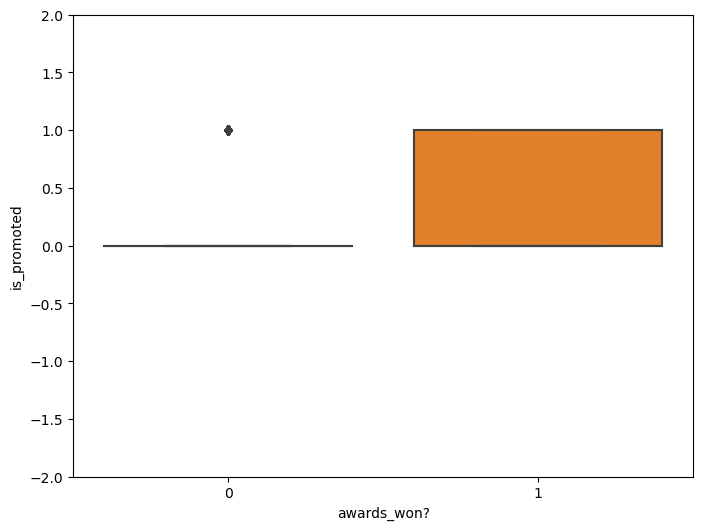

In [26]:
## Diagrama de cajas awards_won?/is_promoted:

var = 'awards_won?'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.show()


* ***Finalmente, observamos que para todas las variables y sus opciones, existen datos relacionados con la variable objetivo, por ende, concluimos que mantendremos todas las variables para los análisis***
* ***Observamos posibles atipicos bien notorios en 'no_of_trainings'***

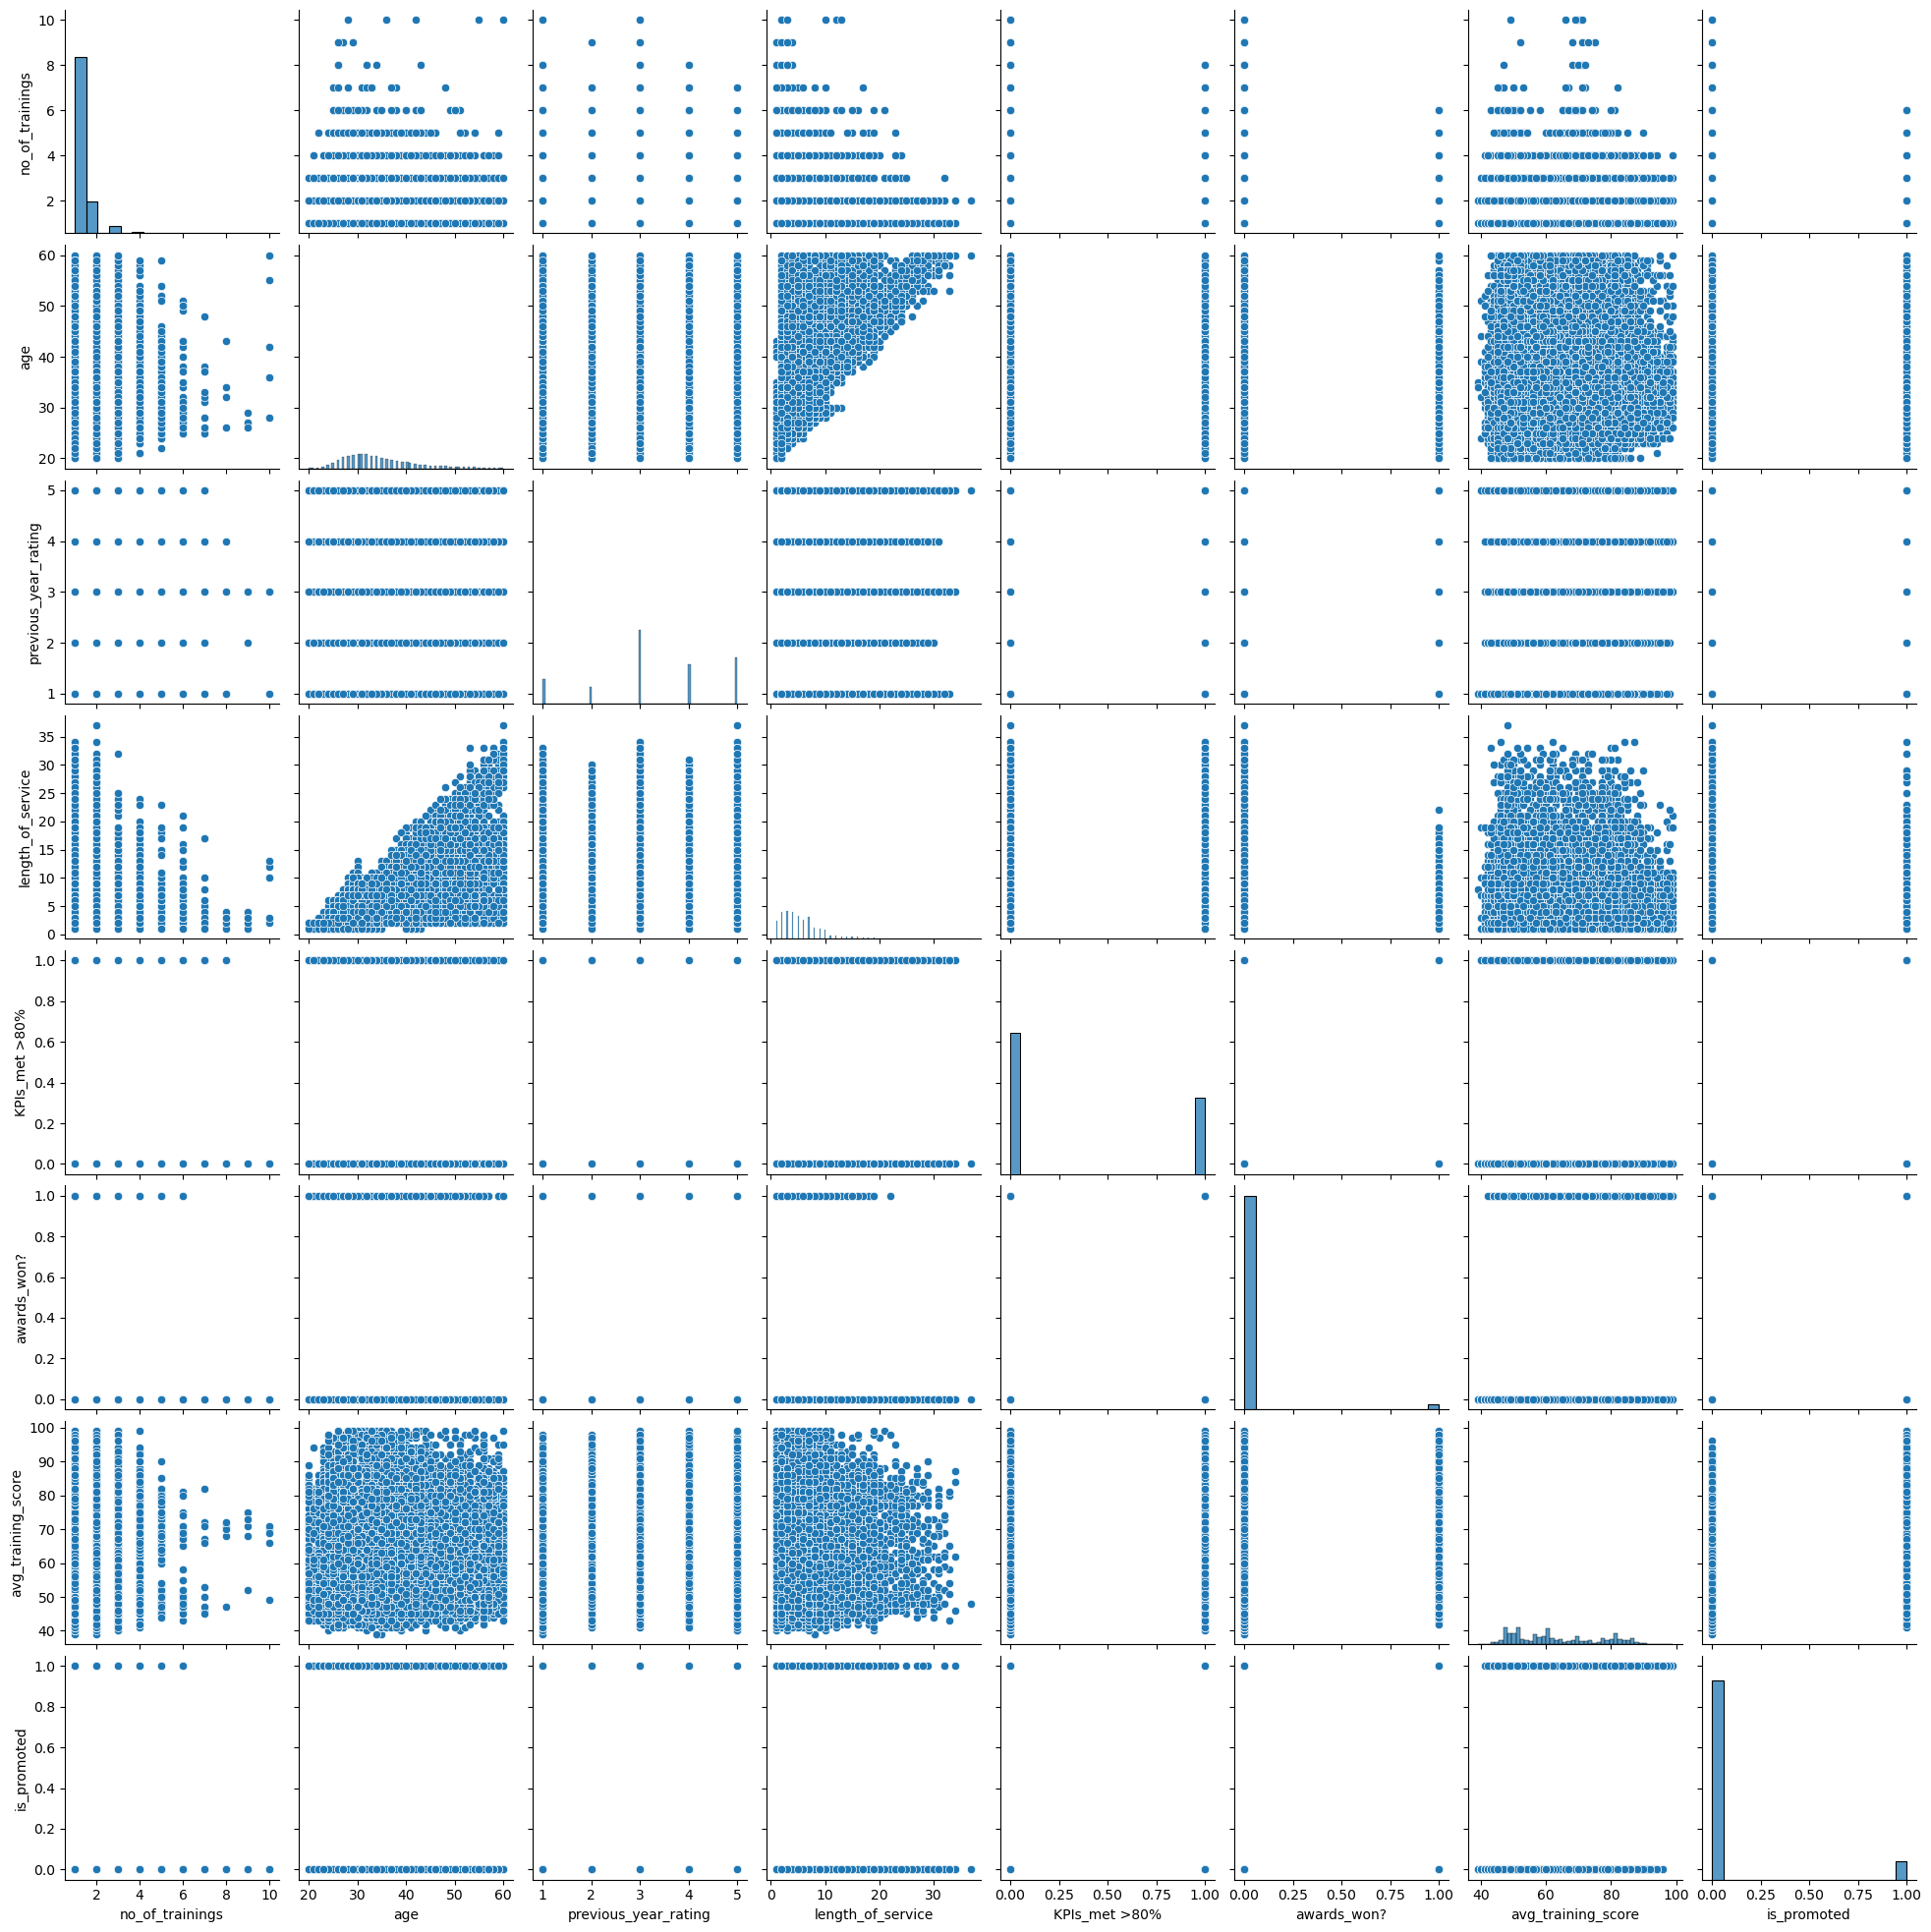

In [27]:
## Realizamos un pairplot, para analizar la correlacion entre las variables numéricas
sns.pairplot(df_mod)

### <ins>Relación entre Variable target y Variables categóricas</ins>

In [28]:
variables_numericas = df_mod.describe().columns
variables_categoricas = list(df_mod.drop(columns=variables_numericas).columns)
variables_categoricas

['department', 'region', 'education', 'gender', 'recruitment_channel']

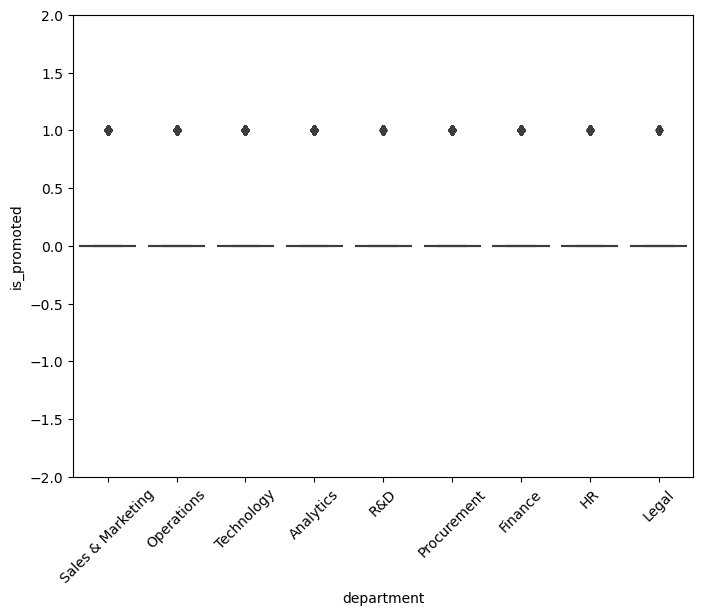

In [29]:
## Diagrama de cajas department/is_promoted:

var = 'department'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.xticks(rotation=45)
plt.show()

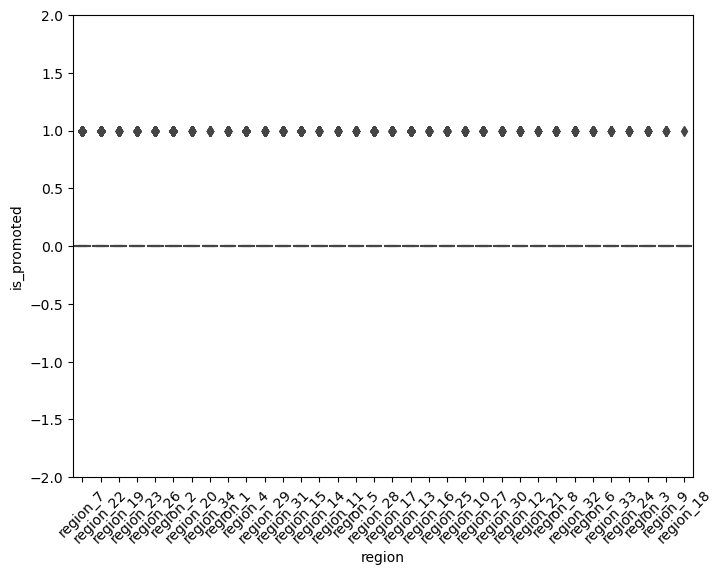

In [30]:
## Diagrama de cajas department/is_promoted:

var = 'region'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.xticks(rotation=45)
plt.show()

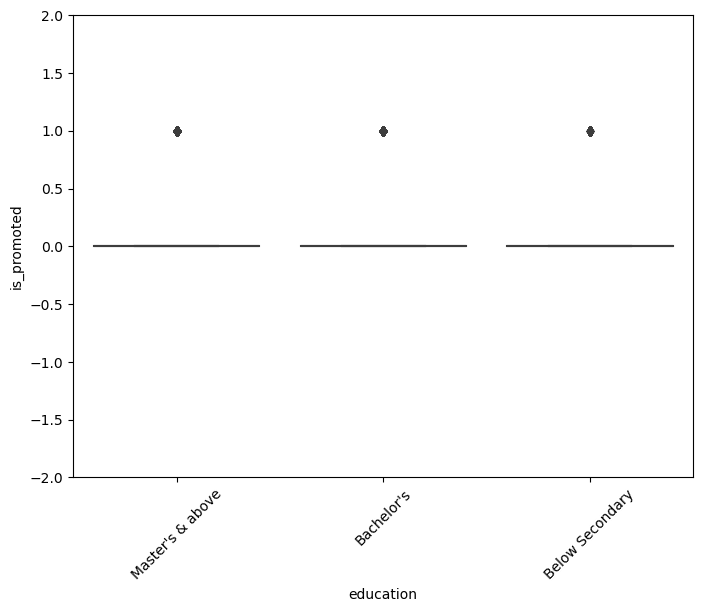

In [31]:
## Diagrama de cajas department/is_promoted:

var = 'education'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.xticks(rotation=45)
plt.show()

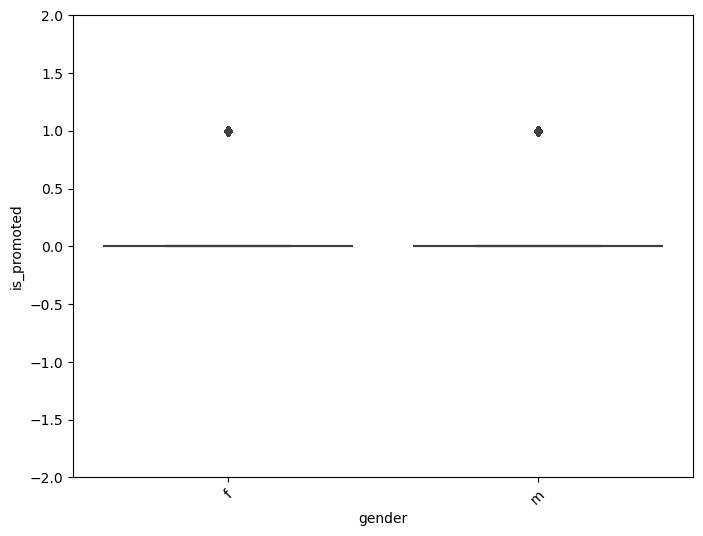

In [32]:
## Diagrama de cajas gender/is_promoted:

var = 'gender'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.xticks(rotation=45)
plt.show()

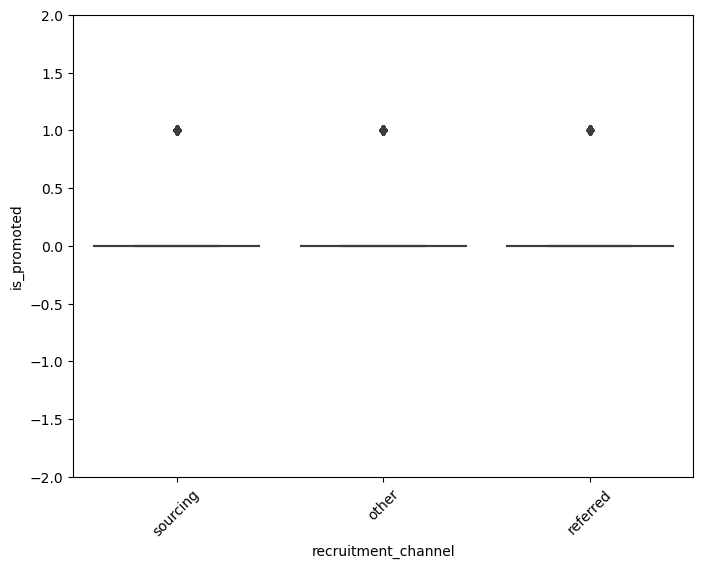

In [33]:
## Diagrama de cajas department/is_promoted:

var = 'recruitment_channel'
data = pd.concat([df_mod['is_promoted'],df_mod[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='is_promoted',data=data)
fig.axis(ymin=-2,ymax=2)
plt.xticks(rotation=45)
plt.show()

 * ***Notamos que todas las Variables categóricas están relacionadas con la variable target***
 * ***No observamos atipicos***

### <ins>Relación entre Variable target y Variables categóricas - Gráfico de frecuencias</ins>

In [34]:
variables_numericas = df_mod.describe().columns
variables_categoricas = list(df_mod.drop(columns=variables_numericas).columns)
variables_categoricas

['department', 'region', 'education', 'gender', 'recruitment_channel']

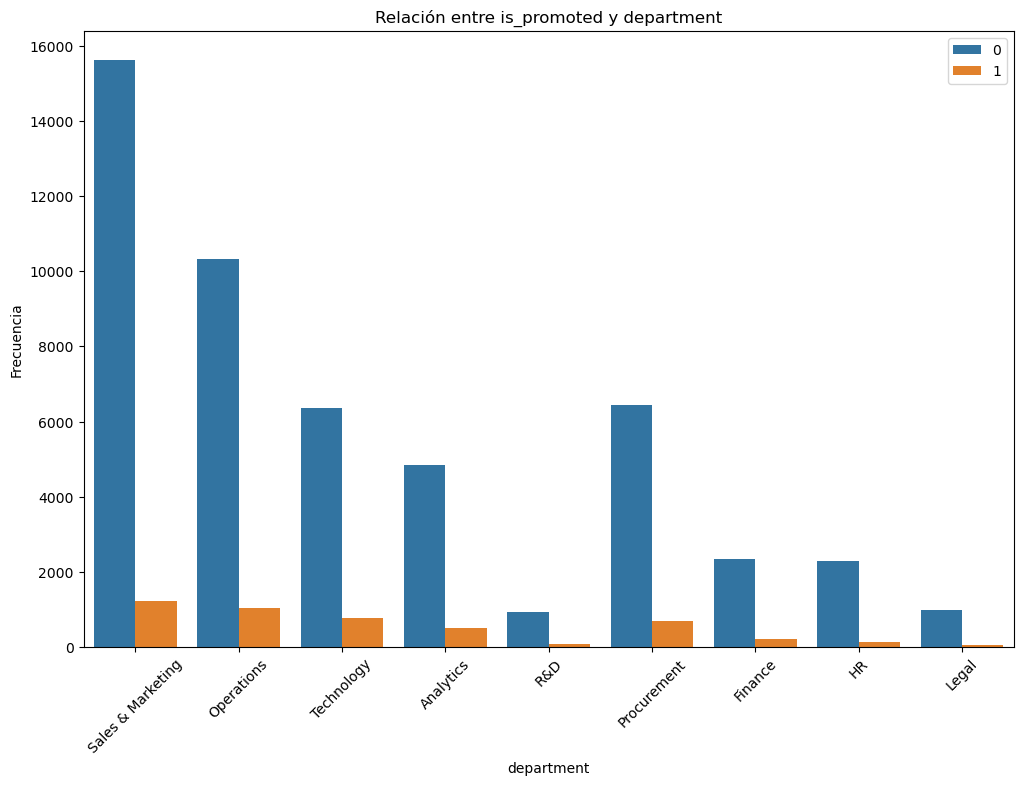

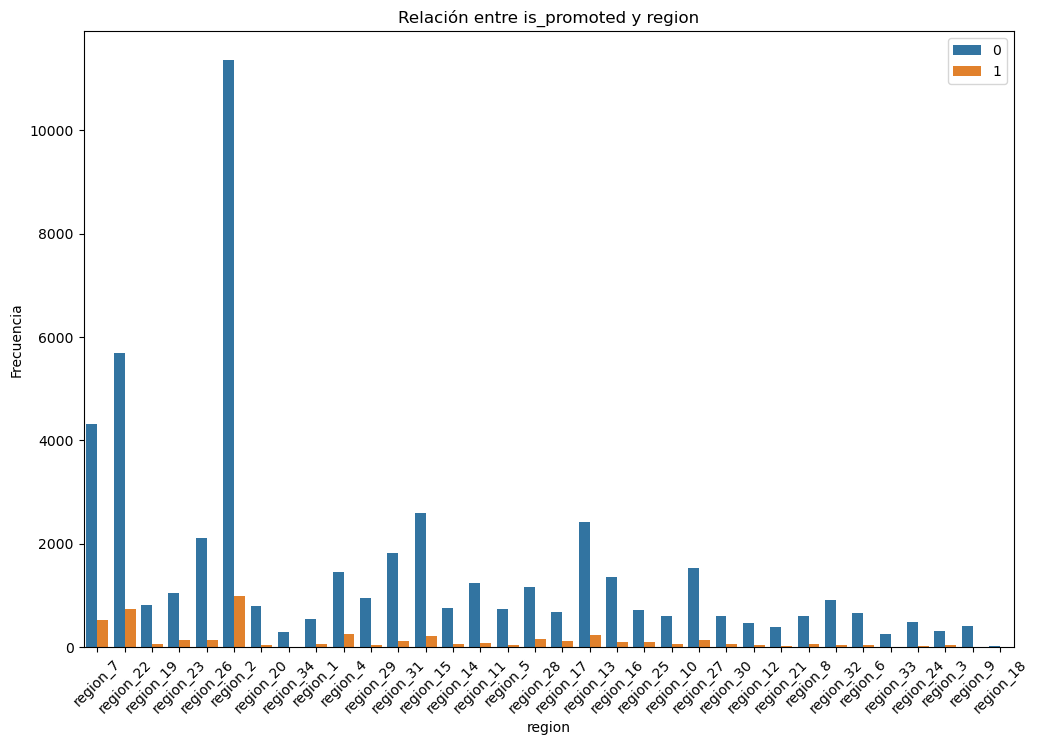

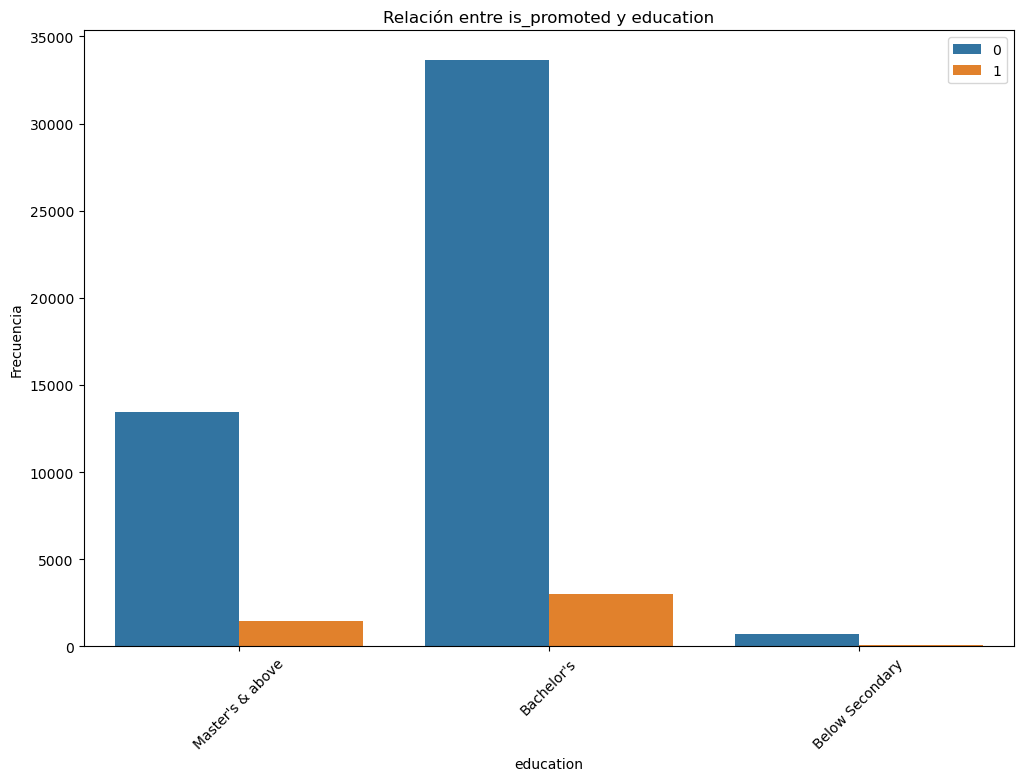

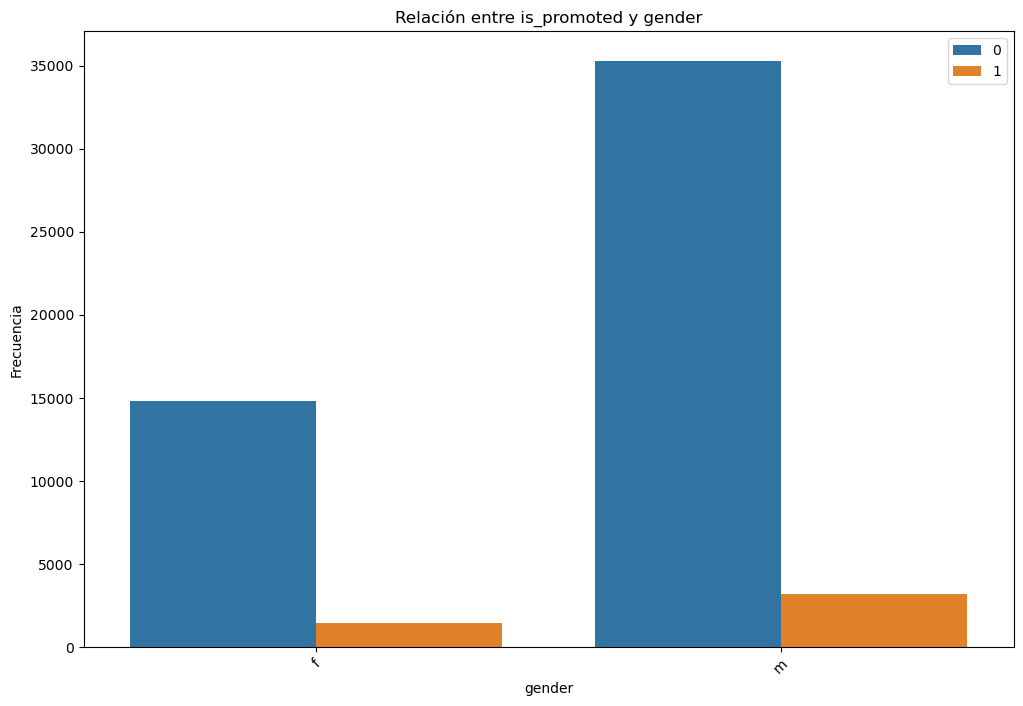

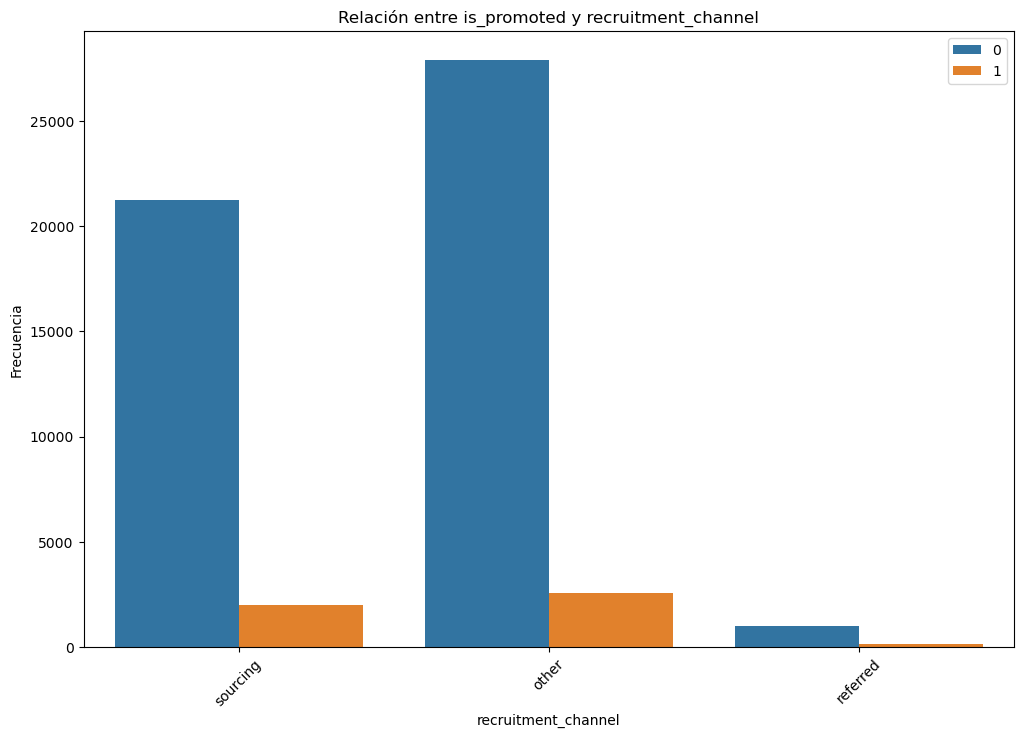

In [35]:
## Relacion de la variable 'is_promoted', con las demas variables categóricas. Gráfica de barras
for var in variables_categoricas:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=var, hue='is_promoted', data=df_mod)
    plt.title(f'Relación entre is_promoted y {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.show()

 * ***Notamos que todas las Variables categóricas están relacionadas con la variable target***

## <ins> Análisis Multivariado</ins>

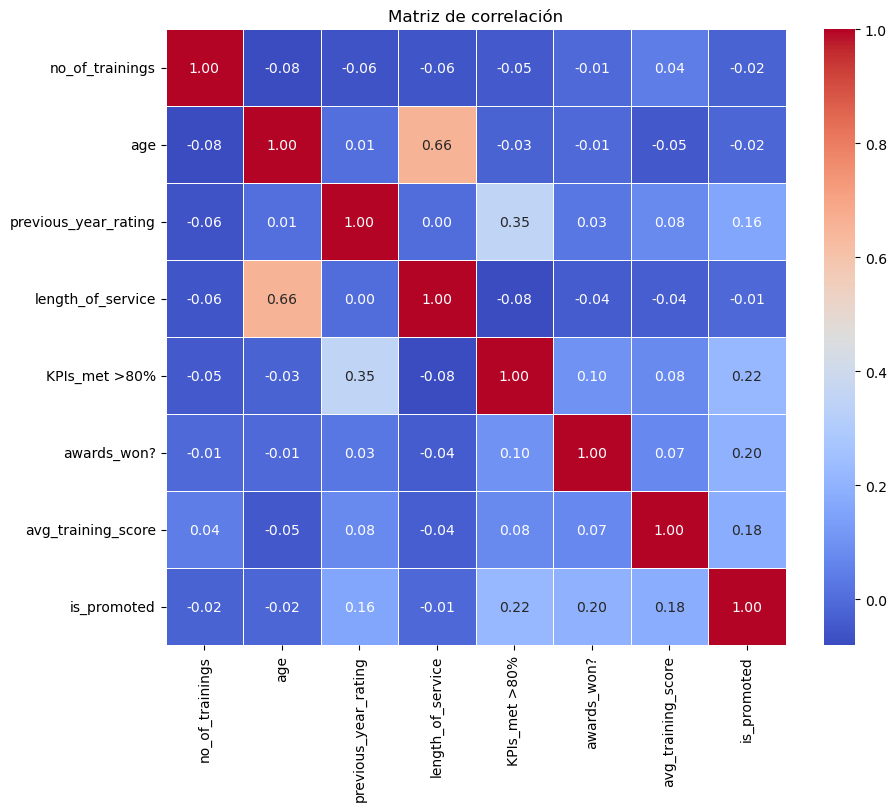

In [36]:
# Correlación entre variables
correlation_matrix = df_mod.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

**<ins>Observamos lo siguiente:</ins>**
* Existen dos variables que estan correlacionadas entre si, que no son el target. Estas variables son 'age' y 'lenght_of_service', tienen una correlacion mayor al 60%, lo cual podría generar multicolinealidad.
* Sin embargo, notamos que al analizar estas variables con la variable objetivo, su correlación no es muy alta. 
* Por el momento las dejaremos para los análisis, ya que tampoco tenemos muchas variables a analizar, pero tenemos que estar pendientes de que no se genere lo observado

In [37]:
## Observamos solo la correlación con el target
corr = df_mod.corr()
corr[['is_promoted']].sort_values(by='is_promoted',ascending=False).style.background_gradient()

* ***Observamos que los que tienen más correlación con el target son las variables: KPI_met, awards_won, avg_training_score y previous_year_rating***
* ***También notamos que la correlación entre estas 4 variables, todas contra todas, no es muy grande, por ende no generaría multicolinealidad***

### <ins>Diagrama de dispersión entre 'is_promoted' y sus variables más correlacionadas</ins>

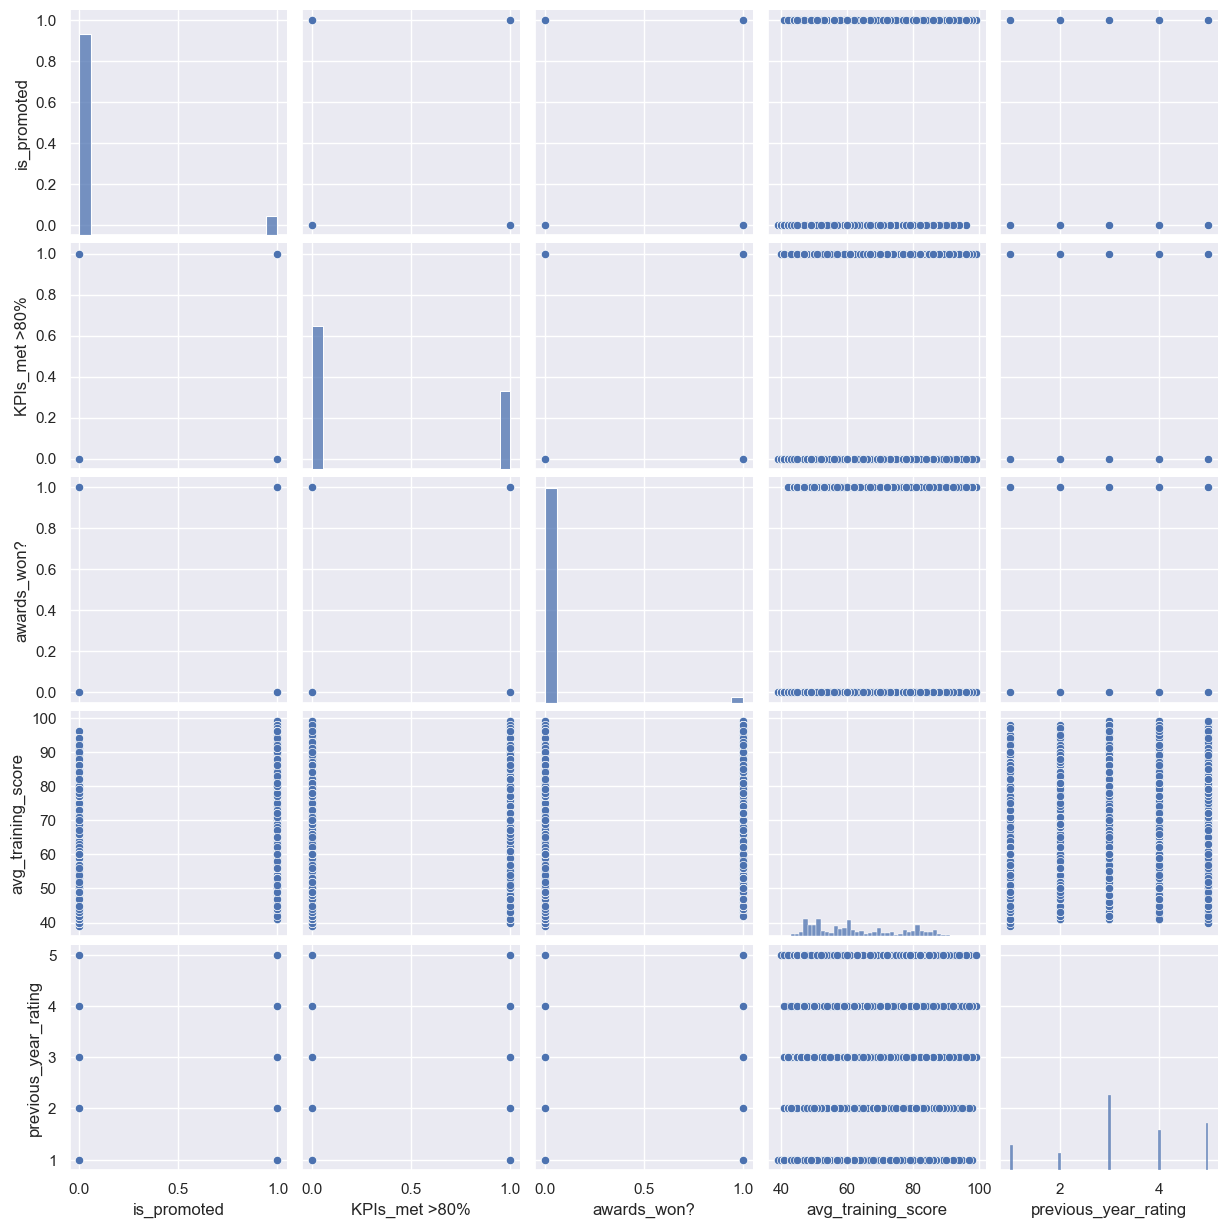

In [38]:
## Scatter plot
sns.set()
cols = ['is_promoted','KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating']
sns.pairplot(df_mod[cols],height=2.5)
plt.show()


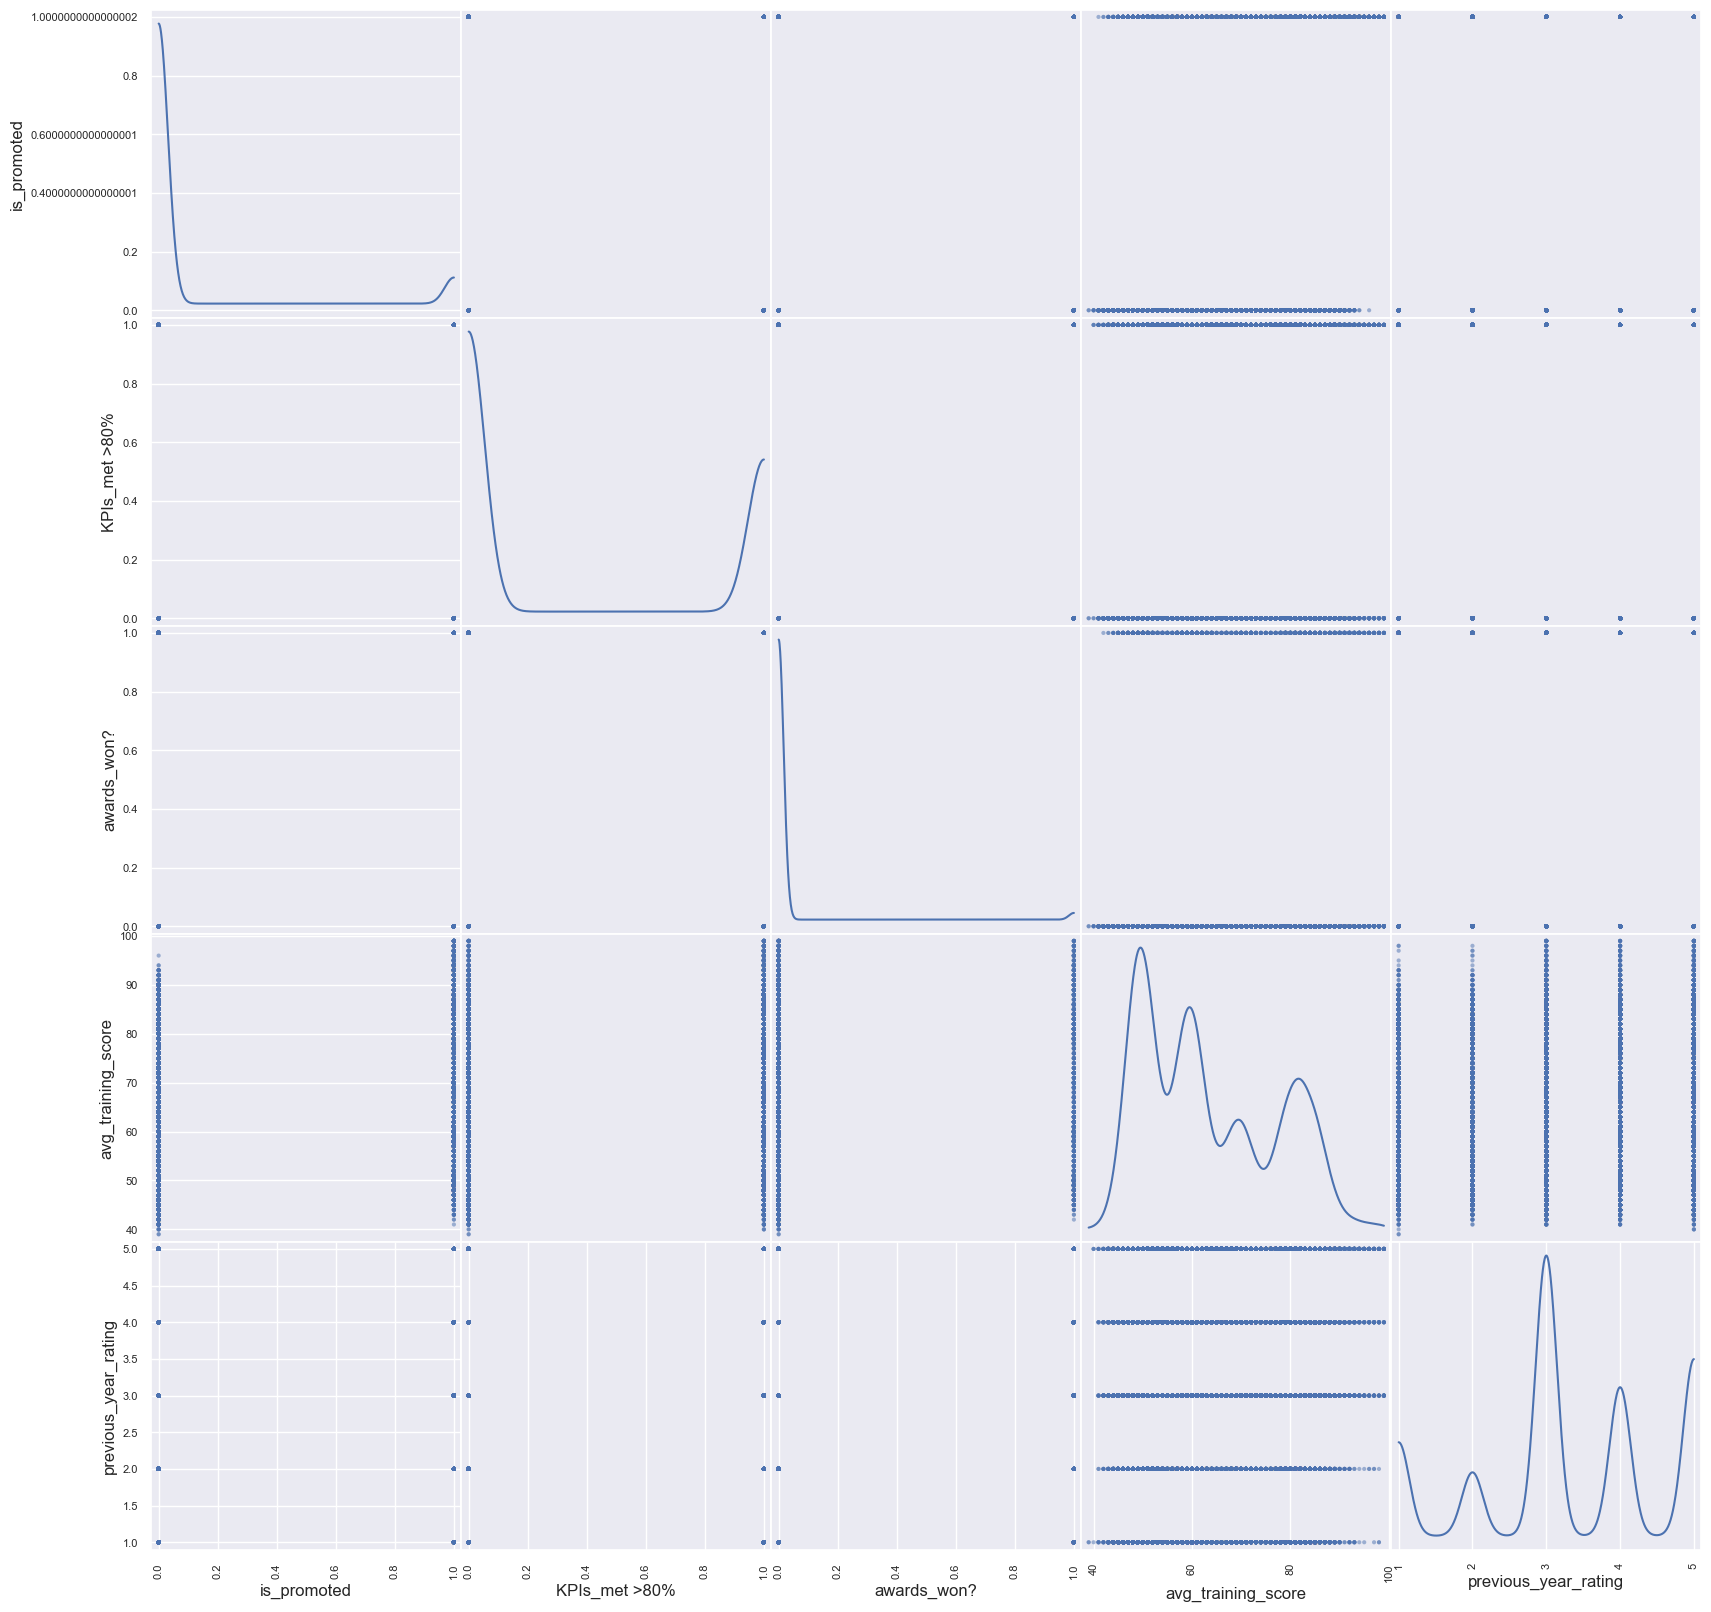

In [39]:
cols = ['is_promoted','KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating']
pd.plotting.scatter_matrix(df_mod[cols],diagonal='kde',figsize=(20,20))
plt.show()

# Limpieza de Datos

In [40]:
##Importante observar la cantidad de datos nulos que poseemos
df_mod

department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9               NaN      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 13 columns]

In [41]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             52399 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  50684 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [42]:
##Missing data
total =df_mod.isnull().sum().sort_values(ascending=False)
percent = (df_mod.isnull().sum()/df_mod.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

Total   Percent
previous_year_rating   4124  0.075244
education              2409  0.043953
department                0  0.000000
region                    0  0.000000
gender                    0  0.000000
recruitment_channel       0  0.000000
no_of_trainings           0  0.000000
age                       0  0.000000
length_of_service         0  0.000000
KPIs_met >80%             0  0.000000
awards_won?               0  0.000000
avg_training_score        0  0.000000
is_promoted               0  0.000000

* ***Notamos que las variables **'previous_year_rating'** y '**education'**,***son las que tienen datos nulos en su conjunto. Pero notamos que comparado con la totalidad de datos, es un porcentaje minimo, por consiguiente evaluamos la posibilidad de realizar la eliminación de estos datos nulos o la imputación de los mismos, se evaluará en el preprocesamiento***
* ***Considerar que es mejor trabajar con datos reales siempre, y al tener bastante data nos da la facilidad de eliminar estos datos y que no afecten mucho a nuestra data final***

# 2. PREPROCESAMIENTO DE DATOS

In [43]:
## Haciendo una copia de la data
df_prepro = df.copy()
df_prepro

employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2                sourcing                1   34                   3.0   
3                   other                2   39                   1.0   
4                   other                1   45                   3.0   
...                   ...              ...  ...                   ...   
54803            sourcing                1   48                   3.0   
54804               other                1   37                   2.0   
54805               other                1   27                   5.0   
54806            sourcing                1   29                   1.0   
54807               other                1   27                   1.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                      8              1            0                  49   
1                      4              0            0                  60   
2                      7              0            0                  50   
3                     10              0            0                  50   
4                      2              0            0                  73   
...                  ...            ...          ...                 ...   
54803                 17              0            0                  78   
54804                  6              0            0                  56   
54805                  3              1            0                  79   
54806                  2              0            0                  45   
54807                  5              0            0                  49   

       is_promoted  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
54803            0  
54804            0  
54805            0  
54806            0  
54807            0  

[54808 rows x 14 columns]

El id de la tabla no nos va a servir para el entrenamiento de datos, por lo que vamos a proceder a eliminarlo del dataframe

In [44]:
## Eliminamos la variable identificadira de la base 'employee_id'
## Trabajaremos con este nuevo dataframe
df_prepro = df_prepro.drop(columns = ['employee_id'])
df_prepro.head(10)

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   
5          Analytics   region_2        Bachelor's      m            sourcing   
6         Operations  region_20        Bachelor's      f               other   
7         Operations  region_34  Master's & above      m            sourcing   
8          Analytics  region_20        Bachelor's      m               other   
9  Sales & Marketing   region_1  Master's & above      m            sourcing   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   
5                2   31                   3.0                  7   
6                1   31                   3.0                  5   
7                1   33                   3.0                  6   
8                1   28                   4.0                  5   
9                1   32                   5.0                  5   

   KPIs_met >80%  awards_won?  avg_training_score  is_promoted  
0              1            0                  49            0  
1              0            0                  60            0  
2              0            0                  50            0  
3              0            0                  50            0  
4              0            0                  73            0  
5              0            0                  85            0  
6              0            0                  59            0  
7              0            0                  63            0  
8              0            0                  83            0  
9              1            0                  54            0

***Queremos predecir si se está apto para ser promovido o no. En este caso es una variable binaria***
* ***1 - Es promovido***
* ***0 - No es promovido***

### <ins> La variable TARGET es de tipo Binaria</ins>

In [45]:
target = 'is_promoted'
seed = 42

In [46]:
df_prepro[target].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

Observamos que:
* Tenemos 4668 personas que estan aptas para ser promovidas
* Tenemos 50140 personas que no estan aptas para ser promovidas

In [47]:
df_prepro[target].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

Se podria considerar que la data estaría desbalanceada, ya que es menos del 10%. Se evaluará la posibilidad de realizar balanceo más adelante

In [48]:
df_prepro[target].mean()

0.08517004816815063

### <ins>Separando el conjunto de datos en Entrenamiento y Prueba</ins>

Separamos la data en dos partes, en base de entrenamiento (Train) y prueba (Test)

In [49]:
## Dividimos nuestras variables en dos partes, esto lo hacemos inicialmente para poder analizar posteriormente
x = df_prepro.drop(target, axis=1)
y = df_prepro[target]

In [50]:
x.head()

department     region         education gender recruitment_channel  \
0  Sales & Marketing   region_7  Master's & above      f            sourcing   
1         Operations  region_22        Bachelor's      m               other   
2  Sales & Marketing  region_19        Bachelor's      m            sourcing   
3  Sales & Marketing  region_23        Bachelor's      m               other   
4         Technology  region_26        Bachelor's      m               other   

   no_of_trainings  age  previous_year_rating  length_of_service  \
0                1   35                   5.0                  8   
1                1   30                   5.0                  4   
2                1   34                   3.0                  7   
3                2   39                   1.0                 10   
4                1   45                   3.0                  2   

   KPIs_met >80%  awards_won?  avg_training_score  
0              1            0                  49  
1              0            0                  60  
2              0            0                  50  
3              0            0                  50  
4              0            0                  73

In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [52]:
x.shape

(54808, 12)

In [53]:
y.shape

(54808,)

In [54]:
## Importamos de SKlearn la librería para dividir nuestra data en prueba y entrenamiento
from sklearn.model_selection import train_test_split

In [55]:
## Usaremos la división Train y Test en 80/20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=seed)

In [56]:
x_train.head()

department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
3872                other                1   31                   5.0   
11619            sourcing                1   34                   1.0   
36178               other                3   29                   4.0   
29884               other                1   54                   4.0   
22968            sourcing                1   31                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
3872                   5              1            0                  48  
11619                  4              0            0                  78  
36178                  4              1            0                  77  
29884                 15              1            0                  47  
22968                  6              0            0                  86

In [57]:
x_test.head()

department     region   education gender recruitment_channel  \
40907                 HR  region_16  Bachelor's      m               other   
51939  Sales & Marketing   region_7  Bachelor's      m               other   
6978             Finance   region_2  Bachelor's      m               other   
12814         Operations  region_22  Bachelor's      f               other   
22921         Technology   region_7  Bachelor's      f               other   

       no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

In [58]:
x_train.shape, x_test.shape

((43846, 12), (10962, 12))

In [59]:
y_train.shape, y_test.shape

((43846,), (10962,))

Todo conforme con las dimensiones de las variables, vemos que no hay nada que se pueda considerar irregular

In [60]:
## validación de los promedios de la variable target
y.mean(), y_train.mean(), y_test.mean()

(0.08517004816815063, 0.08575468685855038, 0.08283160007297938)

In [61]:
y_train.value_counts()

0    40086
1     3760
Name: is_promoted, dtype: int64

In [62]:
y_test.value_counts()

0    10054
1      908
Name: is_promoted, dtype: int64

***---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

## 2.1 <ins>Análisis Exploratorio - Train</ins>

Revisando las columnas del conjunto de datos:

In [63]:
x_train.head()

department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
3872                other                1   31                   5.0   
11619            sourcing                1   34                   1.0   
36178               other                3   29                   4.0   
29884               other                1   54                   4.0   
22968            sourcing                1   31                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
3872                   5              1            0                  48  
11619                  4              0            0                  78  
36178                  4              1            0                  77  
29884                 15              1            0                  47  
22968                  6              0            0                  86

In [64]:
x_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [65]:
x_train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [66]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43846 entries, 3872 to 15795
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            43846 non-null  object 
 1   region                43846 non-null  object 
 2   education             41897 non-null  object 
 3   gender                43846 non-null  object 
 4   recruitment_channel   43846 non-null  object 
 5   no_of_trainings       43846 non-null  int64  
 6   age                   43846 non-null  int64  
 7   previous_year_rating  40543 non-null  float64
 8   length_of_service     43846 non-null  int64  
 9   KPIs_met >80%         43846 non-null  int64  
 10  awards_won?           43846 non-null  int64  
 11  avg_training_score    43846 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 4.3+ MB


* Se observan presencia de nulos en dos columnas, **education** y **previous_year_rating**

<ins>Principales estadísticos:</ins>

In [67]:
## Solo para variables numéricas
x_train.describe()

no_of_trainings           age  previous_year_rating  length_of_service  \
count     43846.000000  43846.000000          40543.000000       43846.000000   
mean          1.254983     34.811340              3.328343           5.874105   
std           0.611056      7.692854              1.260202           4.279768   
min           1.000000     20.000000              1.000000           1.000000   
25%           1.000000     29.000000              3.000000           3.000000   
50%           1.000000     33.000000              3.000000           5.000000   
75%           1.000000     39.000000              4.000000           7.000000   
max          10.000000     60.000000              5.000000          37.000000   

       KPIs_met >80%   awards_won?  avg_training_score  
count   43846.000000  43846.000000        43846.000000  
mean        0.352689      0.023309           63.366077  
std         0.477812      0.150884           13.355242  
min         0.000000      0.000000           39.000000  
25%         0.000000      0.000000           51.000000  
50%         0.000000      0.000000           60.000000  
75%         1.000000      0.000000           76.000000  
max         1.000000      1.000000           99.000000

* Observamos posibles valores atípicos en las columnas **no_of_trainings** y **length_of_service**, los valores máximos estan muy distantes de la media
* En la columna **age**, habria que analizar existencia de atipicos

In [68]:
x_train.describe()[1:3]

no_of_trainings        age  previous_year_rating  length_of_service  \
mean         1.254983  34.811340              3.328343           5.874105   
std          0.611056   7.692854              1.260202           4.279768   

      KPIs_met >80%  awards_won?  avg_training_score  
mean       0.352689     0.023309           63.366077  
std        0.477812     0.150884           13.355242

In [69]:
## Solo para variables categóricas
x_train.describe(include='object')

department    region   education gender recruitment_channel
count               43846     43846       41897  43846               43846
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                13509      9964       29347  30816               24312

* Observamos que dos columnas, poseen muchas categorias, las cuales son **region** y **department**. Sin embargo, consideramos que la región no tiene mucha relación con la respuesta que buscamos, se procederá a eliminarla. La variable department, si bien tiene varias variables, pero consideramos que si es importante para el análisis.
* Asimismo, se observa en la descripción del problema a resolver, que la causa de que no se logre la promoción es por la falta de línea de carrera, y estas variables no influyen mucho para esto. Caso contrario sería si fuera por distancia o por movilización.

<ins>**Observando las variables con valores nulos**</ins>

In [70]:
x_train['education'].value_counts(dropna=False)

Bachelor's          29347
Master's & above    11910
NaN                  1949
Below Secondary       640
Name: education, dtype: int64

In [71]:
x_train['previous_year_rating'].value_counts(dropna=False)

3.0    14933
5.0     9391
4.0     7870
1.0     4991
2.0     3358
NaN     3303
Name: previous_year_rating, dtype: int64

<ins>**Observando las variables con posibles valores Atípicos**</ins>

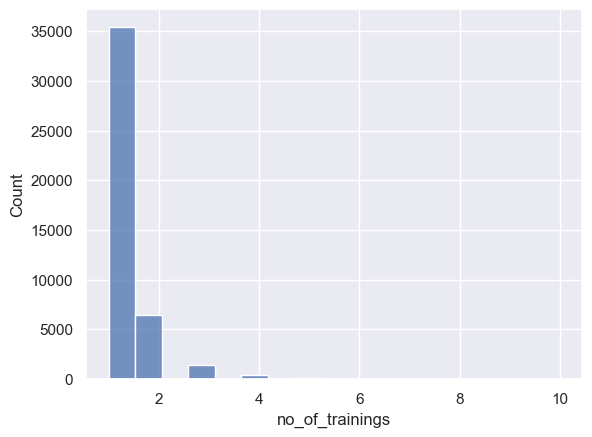

In [72]:
## Para la variable no_of_trainings
sns.histplot(data=x_train, x='no_of_trainings')
plt.show()

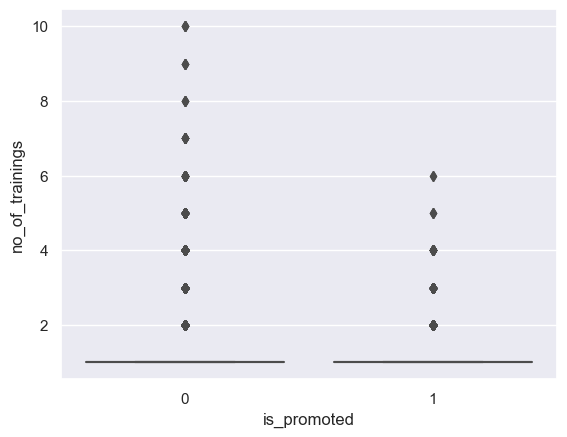

In [73]:
sns.boxplot(data=df_prepro, x=target, y='no_of_trainings')
plt.show()

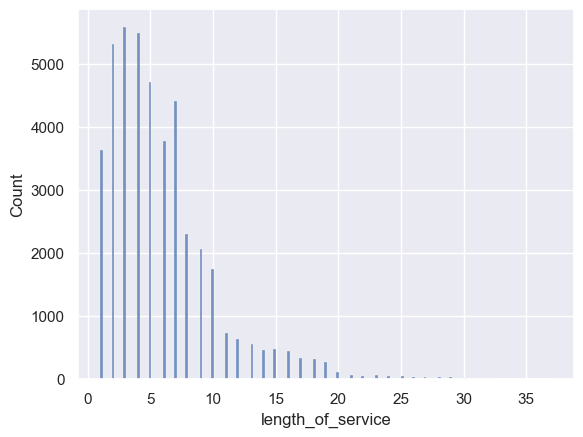

In [74]:
## Para la variable length_of_service
sns.histplot(data=x_train, x='length_of_service')
plt.show()

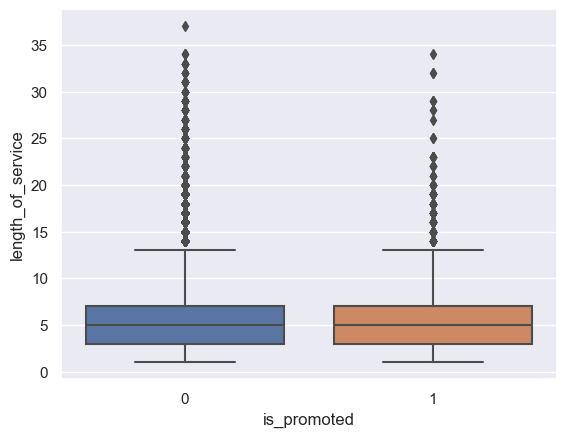

In [75]:
sns.boxplot(data=df_prepro, x=target, y='length_of_service')
plt.show()

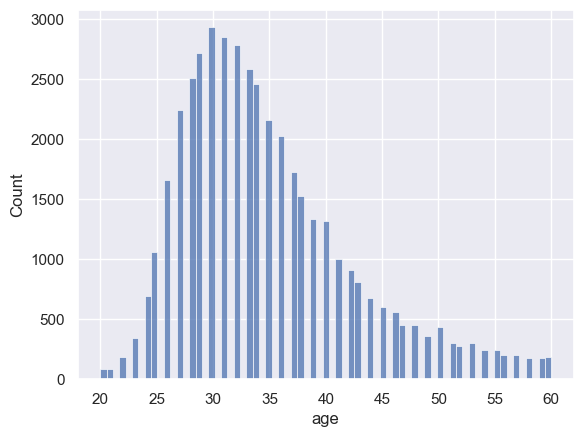

In [76]:
## Para la variable age
sns.histplot(data=x_train, x='age')
plt.show()

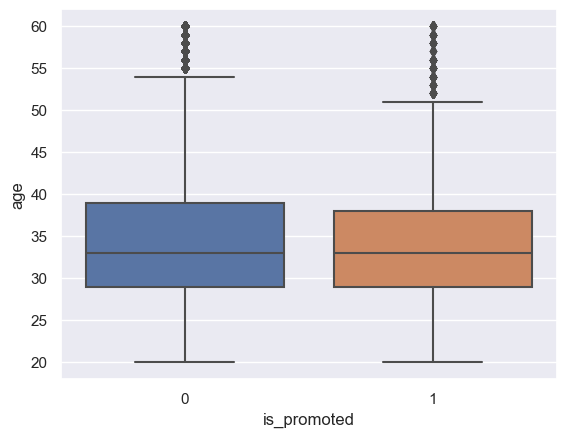

In [77]:
sns.boxplot(data=df_prepro, x=target, y='age')
plt.show()

* ***Observamos que la variable 'age' no hay presencia como tal de atipicos, como se observa en la gráfica de frecuencias***
* ***Si existen valores atípicos en las variables 'no_of_trainings' y 'length_of_service'***
* ***Los valores nulos tenemos que trabajarlos***

### 2.1.1 <ins>Tratamiento de valores nulos</ins> 

In [78]:
## Instalando libreria para tratamiento de nulos
#!pip install missingno

In [79]:
import missingno as msno

In [80]:
x_train.head()

department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
3872                other                1   31                   5.0   
11619            sourcing                1   34                   1.0   
36178               other                3   29                   4.0   
29884               other                1   54                   4.0   
22968            sourcing                1   31                   5.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
3872                   5              1            0                  48  
11619                  4              0            0                  78  
36178                  4              1            0                  77  
29884                 15              1            0                  47  
22968                  6              0            0                  86

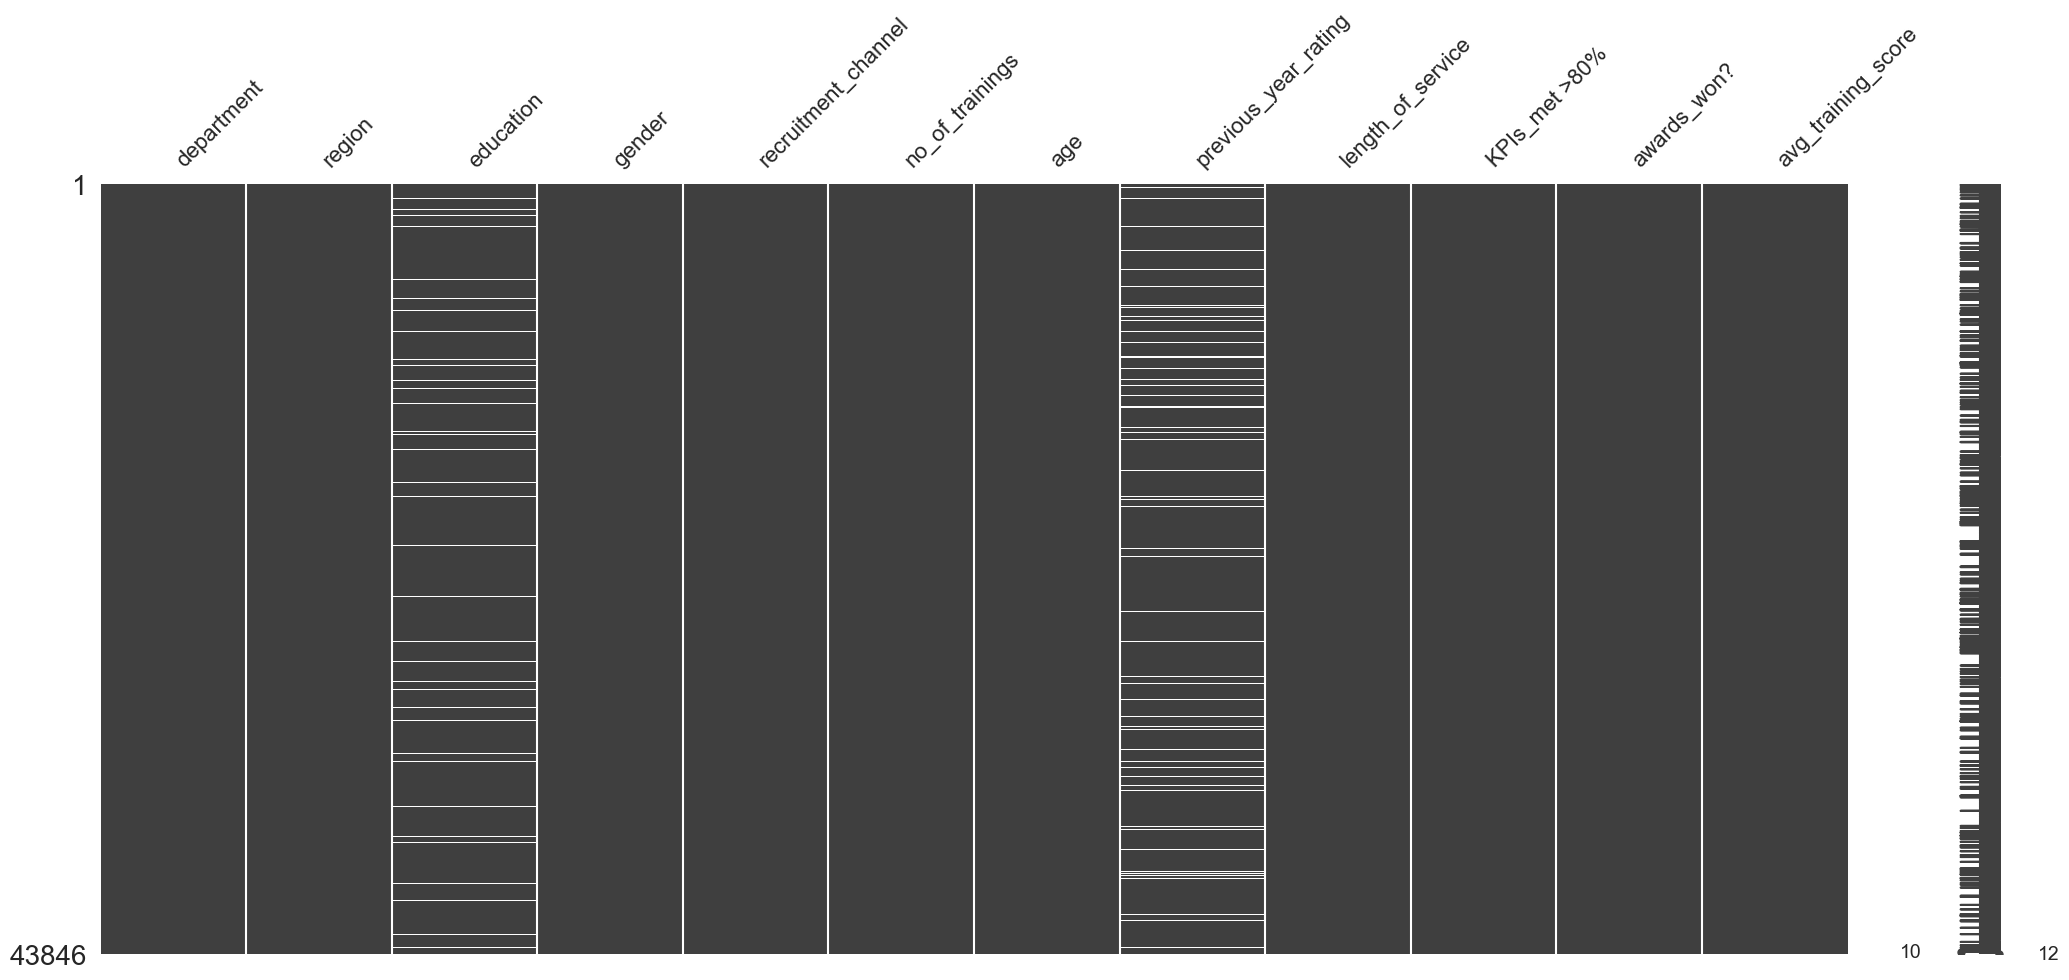

In [81]:
msno.matrix(x_train)
plt.show()

* Efectivamente se observan bastantes nulos en las dos variables a analizar

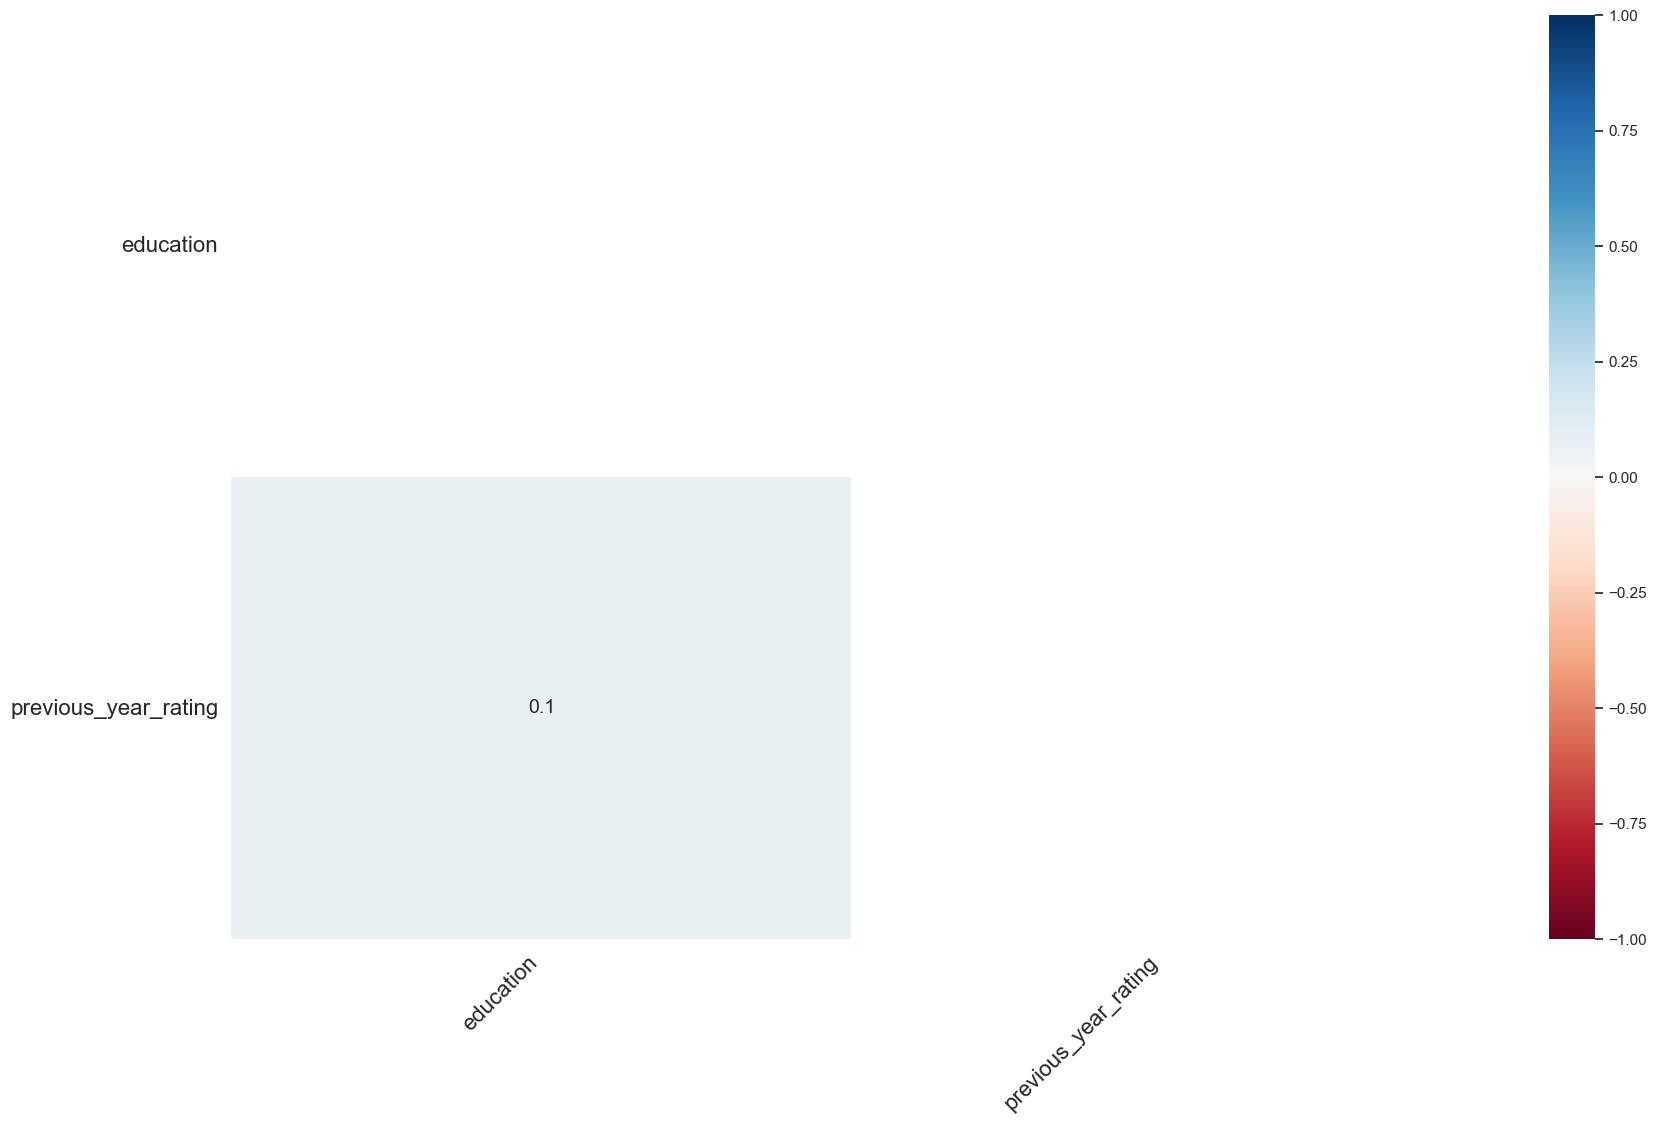

In [82]:
msno.heatmap(x_train)
plt.show()

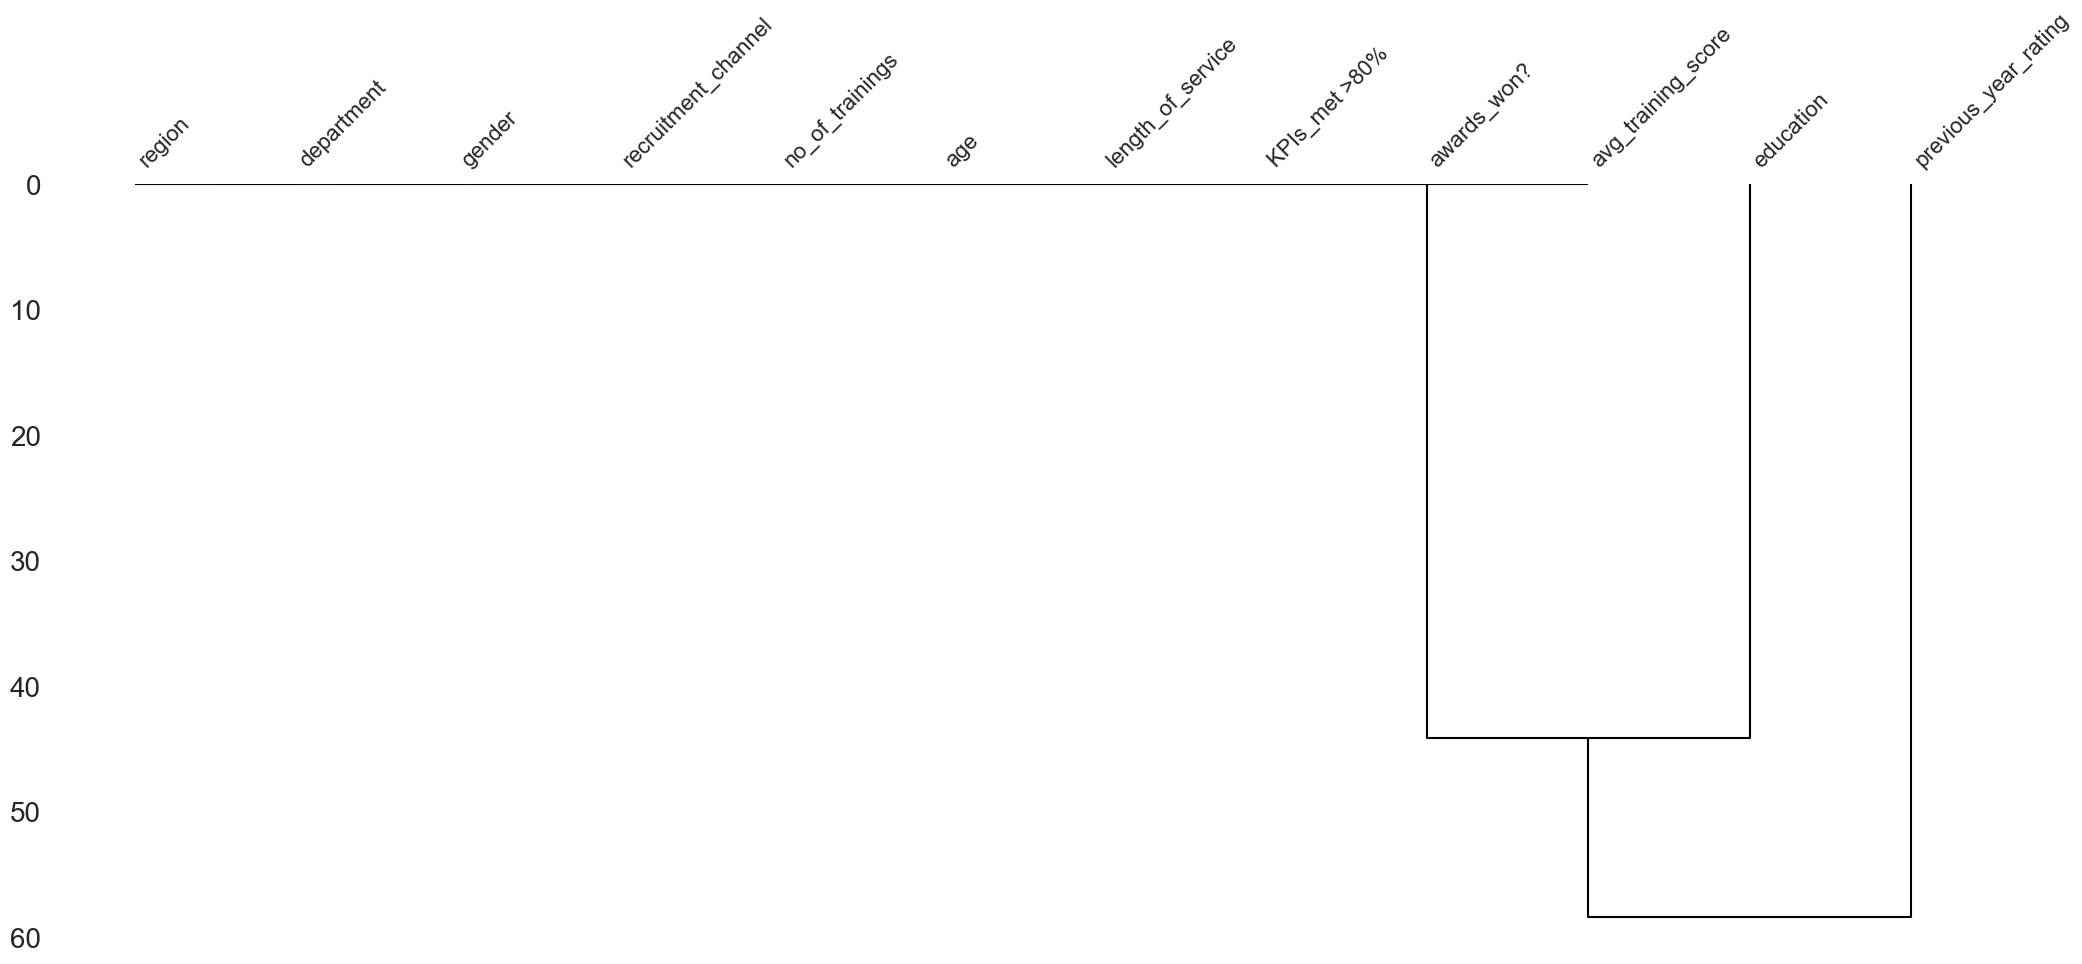

In [83]:
msno.dendrogram(x_train)
plt.show()

In [84]:
x_train.isnull().sum().sort_values(ascending=False)

previous_year_rating    3303
education               1949
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [85]:
## Separamos la data en data categorica y numérica a fin de realizar la imputación
x_train_cat = x_train.select_dtypes('object')
x_train_num = x_train.select_dtypes('number')

In [86]:
x_train_cat.head()

department     region         education gender  \
3872   Sales & Marketing  region_19        Bachelor's      m   
11619         Technology  region_13  Master's & above      m   
36178         Technology  region_22        Bachelor's      m   
29884  Sales & Marketing   region_2  Master's & above      m   
22968                R&D   region_7        Bachelor's      m   

      recruitment_channel  
3872                other  
11619            sourcing  
36178               other  
29884               other  
22968            sourcing

In [87]:
x_train_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
3872                 1   31                   5.0                  5   
11619                1   34                   1.0                  4   
36178                3   29                   4.0                  4   
29884                1   54                   4.0                 15   
22968                1   31                   5.0                  6   

       KPIs_met >80%  awards_won?  avg_training_score  
3872               1            0                  48  
11619              0            0                  78  
36178              1            0                  77  
29884              1            0                  47  
22968              0            0                  86

### Imputación de Numéricas

In [88]:
x_train['previous_year_rating'].mean()

3.3283427472066696

In [89]:
x_train['previous_year_rating'].median()

3.0

In [90]:
from sklearn.impute import SimpleImputer

In [91]:
x_train_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
3872                 1   31                   5.0                  5   
11619                1   34                   1.0                  4   
36178                3   29                   4.0                  4   
29884                1   54                   4.0                 15   
22968                1   31                   5.0                  6   

       KPIs_met >80%  awards_won?  avg_training_score  
3872               1            0                  48  
11619              0            0                  78  
36178              1            0                  77  
29884              1            0                  47  
22968              0            0                  86

In [92]:
imputer_num = SimpleImputer(strategy='median')

In [93]:
imputer_num.fit(x_train_num)

SimpleImputer(strategy='median')

In [94]:
imputer_num.statistics_

array([ 1., 33.,  3.,  5.,  0.,  0., 60.])

In [95]:
imputer_num.transform(x_train_num)

array([[ 1., 31.,  5., ...,  1.,  0., 48.],
       [ 1., 34.,  1., ...,  0.,  0., 78.],
       [ 3., 29.,  4., ...,  1.,  0., 77.],
       ...,
       [ 1., 34.,  5., ...,  1.,  0., 65.],
       [ 3., 35.,  5., ...,  0.,  0., 86.],
       [ 1., 30.,  1., ...,  0.,  0., 53.]])

In [96]:
x_train_num_imputed = pd.DataFrame(data=imputer_num.transform(x_train_num), columns = x_train_num.columns)

In [97]:
x_train_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
3872                 1   31                   5.0                  5   
11619                1   34                   1.0                  4   
36178                3   29                   4.0                  4   
29884                1   54                   4.0                 15   
22968                1   31                   5.0                  6   

       KPIs_met >80%  awards_won?  avg_training_score  
3872               1            0                  48  
11619              0            0                  78  
36178              1            0                  77  
29884              1            0                  47  
22968              0            0                  86

In [98]:
x_train_num_imputed.head()

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  31.0                   5.0                5.0   
1              1.0  34.0                   1.0                4.0   
2              3.0  29.0                   4.0                4.0   
3              1.0  54.0                   4.0               15.0   
4              1.0  31.0                   5.0                6.0   

   KPIs_met >80%  awards_won?  avg_training_score  
0            1.0          0.0                48.0  
1            0.0          0.0                78.0  
2            1.0          0.0                77.0  
3            1.0          0.0                47.0  
4            0.0          0.0                86.0

In [99]:
x_train_num.isnull().sum()

no_of_trainings            0
age                        0
previous_year_rating    3303
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [100]:
x_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

***Notamos que ya imputamos los datos nulos***

### Imputación de categóricas

In [101]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(x_train_cat)
x_train_cat_imputed = pd.DataFrame(data=imputer_cat.transform(x_train_cat), columns = x_train_cat.columns)

x_train_cat_imputed.head()

department     region         education gender recruitment_channel
0  Sales & Marketing  region_19        Bachelor's      m               other
1         Technology  region_13  Master's & above      m            sourcing
2         Technology  region_22        Bachelor's      m               other
3  Sales & Marketing   region_2  Master's & above      m               other
4                R&D   region_7        Bachelor's      m            sourcing

In [102]:
imputer_cat.statistics_

array(['Sales & Marketing', 'region_2', "Bachelor's", 'm', 'other'],
      dtype=object)

In [103]:
x_train_cat.isnull().sum()

department                0
region                    0
education              1949
gender                    0
recruitment_channel       0
dtype: int64

In [104]:
x_train_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

***Ya no tenemos datos nulos***

### Encoding de variables categóricas

In [105]:
x_train_cat_imputed.describe()

department    region   education gender recruitment_channel
count               43846     43846       43846  43846               43846
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                13509      9964       31296  30816               24312

In [106]:
## Eliminamos la variable 'region', debido a que posee demasiadas categorias y además no es una variable relevante
x_train_cat_imputed = x_train_cat_imputed.drop('region',axis=1)
x_train_cat_imputed.head()

department         education gender recruitment_channel
0  Sales & Marketing        Bachelor's      m               other
1         Technology  Master's & above      m            sourcing
2         Technology        Bachelor's      m               other
3  Sales & Marketing  Master's & above      m               other
4                R&D        Bachelor's      m            sourcing

In [107]:
## Convertimos las variables categóricas en su correspondiente en números para poder hacer mejor los cálculos de los algoritmos de machine learning
x_train_cat_dummies = pd.get_dummies(x_train_cat_imputed, drop_first=True)

In [108]:
x_train_cat_imputed.head()

department         education gender recruitment_channel
0  Sales & Marketing        Bachelor's      m               other
1         Technology  Master's & above      m            sourcing
2         Technology        Bachelor's      m               other
3  Sales & Marketing  Master's & above      m               other
4                R&D        Bachelor's      m            sourcing

In [109]:
x_train_cat_dummies.head()

department_Finance  department_HR  department_Legal  department_Operations  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             1   
1                       0               0                             0   
2                       0               0                             0   
3                       0               0                             1   
4                       0               1                             0   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      1                          0   
2                      1                          0   
3                      0                          0   
4                      0                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           1         1                             0   
2                           0         1                             0   
3                           1         1                             0   
4                           0         1                             0   

   recruitment_channel_sourcing  
0                             0  
1                             1  
2                             0  
3                             0  
4                             1

### 2.1.2 <ins>Tratamiento de valores Extremos</ins>

Acá analizaremos los valores atípicos

In [110]:
x_train_num_imputed.describe()

no_of_trainings           age  previous_year_rating  length_of_service  \
count     43846.000000  43846.000000          43846.000000       43846.000000   
mean          1.254983     34.811340              3.303608           5.874105   
std           0.611056      7.692854              1.214899           4.279768   
min           1.000000     20.000000              1.000000           1.000000   
25%           1.000000     29.000000              3.000000           3.000000   
50%           1.000000     33.000000              3.000000           5.000000   
75%           1.000000     39.000000              4.000000           7.000000   
max          10.000000     60.000000              5.000000          37.000000   

       KPIs_met >80%   awards_won?  avg_training_score  
count   43846.000000  43846.000000        43846.000000  
mean        0.352689      0.023309           63.366077  
std         0.477812      0.150884           13.355242  
min         0.000000      0.000000           39.000000  
25%         0.000000      0.000000           51.000000  
50%         0.000000      0.000000           60.000000  
75%         1.000000      0.000000           76.000000  
max         1.000000      1.000000           99.000000

Observamos que los que posiblemente tengan valores atípicos son las variables **no_of_trainings**, **length_of_service** y **age**

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

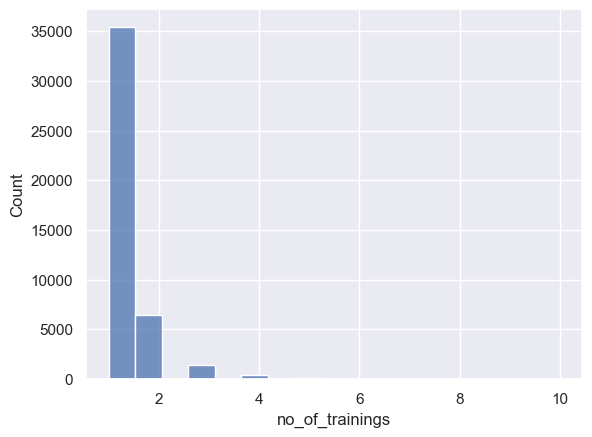

In [112]:
sns.histplot(data=x_train_num_imputed, x='no_of_trainings')
plt.show()

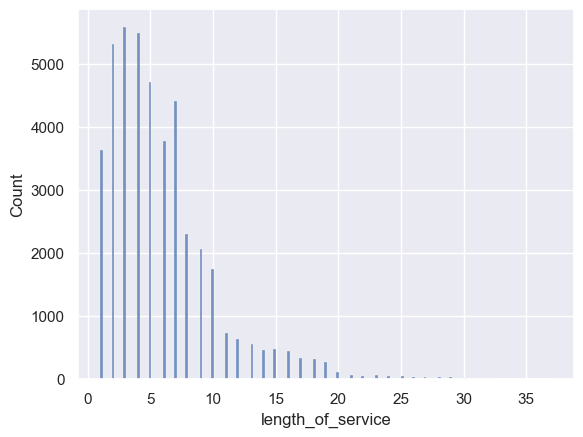

In [113]:
sns.histplot(data=x_train_num_imputed, x='length_of_service')
plt.show()

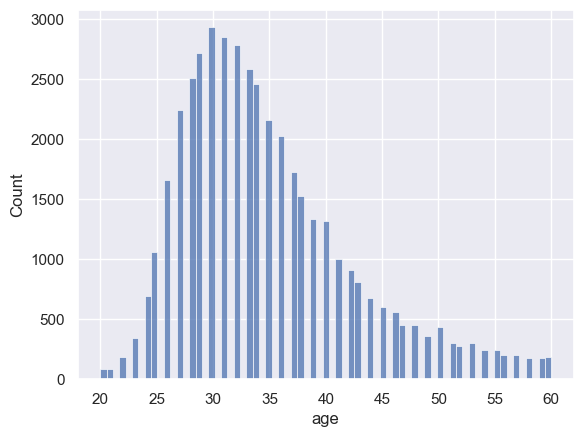

In [114]:
sns.histplot(data=x_train_num_imputed, x='age')
plt.show()

***Notamos que la variable*** '**age**' ***pasa la prueba de atípicos***

In [115]:
x_train_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75])

no_of_trainings  length_of_service           age
count     43846.000000       43846.000000  43846.000000
mean          1.254983           5.874105     34.811340
std           0.611056           4.279768      7.692854
min           1.000000           1.000000     20.000000
1%            1.000000           1.000000     23.000000
2.5%          1.000000           1.000000     24.000000
5%            1.000000           1.000000     25.000000
10%           1.000000           2.000000     27.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
max          10.000000          37.000000     60.000000

In [116]:
x_train_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     43846.000000       43846.000000  43846.000000
mean          1.254983           5.874105     34.811340
std           0.611056           4.279768      7.692854
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     46.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          18.000000     55.000000
99%           4.000000          20.000000     58.000000
max          10.000000          37.000000     60.000000

* Según lo observado, los que si poseen atípicos son **'no_of_trainings'** y **'length_of_service'**.
* La historia es por los percentiles superiores

### Acotando variable 'no_of_trainings'

In [117]:
p1 = np.percentile(x_train_num_imputed['no_of_trainings'],1)
p99 = np.percentile(x_train_num_imputed['no_of_trainings'],99)

In [118]:
p1, p99

(1.0, 4.0)

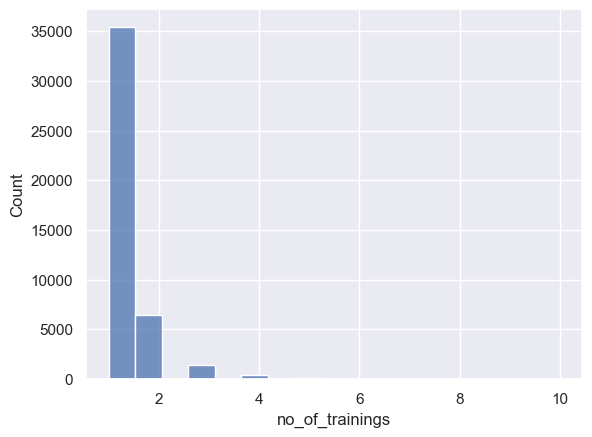

In [119]:
sns.histplot(data=x_train_num_imputed, x='no_of_trainings')
plt.show()

In [120]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
x_train_num_imputed['no_of_trainings'] = np.clip(x_train_num_imputed['no_of_trainings'],p1,p99)

In [121]:
## Veamos los cambios en la distribución
x_train_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     43846.000000       43846.000000  43846.000000
mean          1.249076           5.874105     34.811340
std           0.571111           4.279768      7.692854
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     46.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          18.000000     55.000000
99%           4.000000          20.000000     58.000000
max           4.000000          37.000000     60.000000

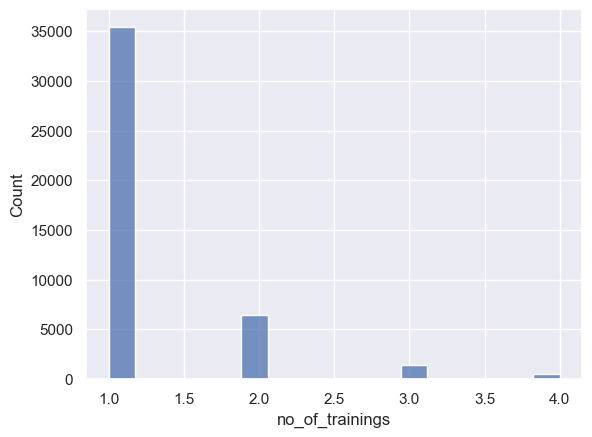

In [122]:
sns.histplot(data = x_train_num_imputed, x='no_of_trainings')
plt.show()

> Observamos que la distribución mejoró

### Acotando variable 'length_of_service'

In [123]:
p1 = np.percentile(x_train_num_imputed['length_of_service'],1)
p99 = np.percentile(x_train_num_imputed['length_of_service'],99)
p1, p99

(1.0, 20.0)

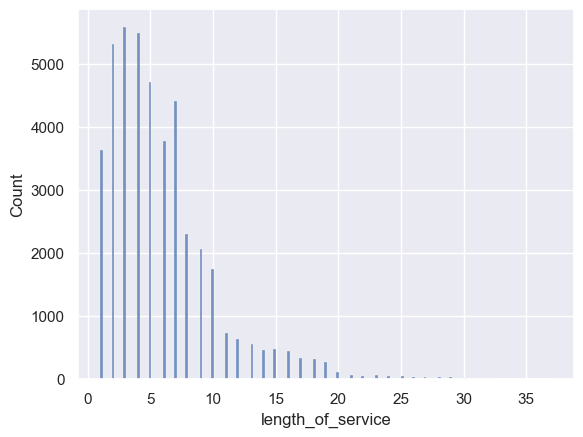

In [124]:
sns.histplot(data=x_train_num_imputed, x='length_of_service')
plt.show()

In [125]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
x_train_num_imputed['length_of_service'] = np.clip(x_train_num_imputed['length_of_service'],p1,p99)

In [126]:
## Veamos los cambios en la distribución
x_train_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     43846.000000       43846.000000  43846.000000
mean          1.249076           5.825777     34.811340
std           0.571111           4.074414      7.692854
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     46.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          18.000000     55.000000
99%           4.000000          20.000000     58.000000
max           4.000000          20.000000     60.000000

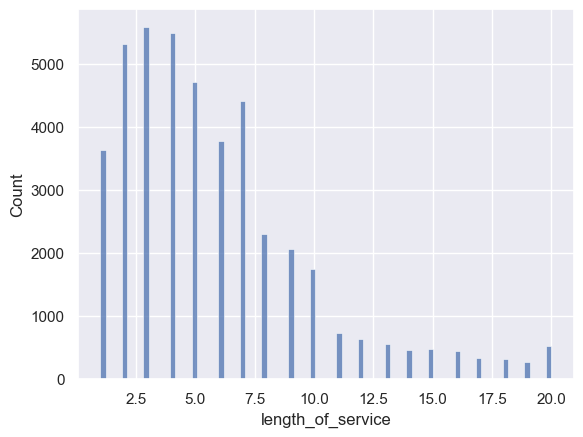

In [127]:
sns.histplot(data = x_train_num_imputed, x='length_of_service')
plt.show()

> Observamos que la distribución mejoró

### <ins>Consolidación de la data</ins>

In [128]:
x_train_cat_dummies.head()

department_Finance  department_HR  department_Legal  department_Operations  \
0                   0              0                 0                      0   
1                   0              0                 0                      0   
2                   0              0                 0                      0   
3                   0              0                 0                      0   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             1   
1                       0               0                             0   
2                       0               0                             0   
3                       0               0                             1   
4                       0               1                             0   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      1                          0   
2                      1                          0   
3                      0                          0   
4                      0                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           1         1                             0   
2                           0         1                             0   
3                           1         1                             0   
4                           0         1                             0   

   recruitment_channel_sourcing  
0                             0  
1                             1  
2                             0  
3                             0  
4                             1

In [129]:
x_train_num_imputed.head()

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  31.0                   5.0                5.0   
1              1.0  34.0                   1.0                4.0   
2              3.0  29.0                   4.0                4.0   
3              1.0  54.0                   4.0               15.0   
4              1.0  31.0                   5.0                6.0   

   KPIs_met >80%  awards_won?  avg_training_score  
0            1.0          0.0                48.0  
1            0.0          0.0                78.0  
2            1.0          0.0                77.0  
3            1.0          0.0                47.0  
4            0.0          0.0                86.0

In [130]:
x_train_cat_dummies.shape

(43846, 13)

In [131]:
x_train_num_imputed.shape

(43846, 7)

In [132]:
## Ahora procedemos a concatenar los dos dataframes para convertirlo en uno total
x_train_total = pd.concat([x_train_num_imputed, x_train_cat_dummies],axis=1)
x_train_total.head(10)

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  31.0                   5.0                5.0   
1              1.0  34.0                   1.0                4.0   
2              3.0  29.0                   4.0                4.0   
3              1.0  54.0                   4.0               15.0   
4              1.0  31.0                   5.0                6.0   
5              1.0  41.0                   3.0               10.0   
6              1.0  57.0                   2.0               20.0   
7              1.0  42.0                   4.0                7.0   
8              2.0  28.0                   1.0                5.0   
9              1.0  29.0                   1.0                3.0   

   KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0            1.0          0.0                48.0                   0   
1            0.0          0.0                78.0                   0   
2            1.0          0.0                77.0                   0   
3            1.0          0.0                47.0                   0   
4            0.0          0.0                86.0                   0   
5            0.0          0.0                65.0                   0   
6            0.0          0.0                53.0                   0   
7            0.0          0.0                62.0                   1   
8            0.0          1.0                66.0                   1   
9            1.0          0.0                52.0                   0   

   department_HR  department_Legal  department_Operations  \
0              0                 0                      0   
1              0                 0                      0   
2              0                 0                      0   
3              0                 0                      0   
4              0                 0                      0   
5              0                 0                      1   
6              0                 0                      0   
7              0                 0                      0   
8              0                 0                      0   
9              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             1   
1                       0               0                             0   
2                       0               0                             0   
3                       0               0                             1   
4                       0               1                             0   
5                       0               0                             0   
6                       0               0                             1   
7                       0               0                             0   
8                       0               0                             0   
9                       0               0                             1   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      1                          0   
2                      1                          0   
3                      0                          0   
4                      0                          0   
5                      0                          0   
6                      0                          0   
7                      0                          0   
8                      0                          0   
9                      0                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           1         1                             0   
2                           0         1                             0   
3                           1         1    

In [133]:
## verificamos si hay nulos
x_train_total.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

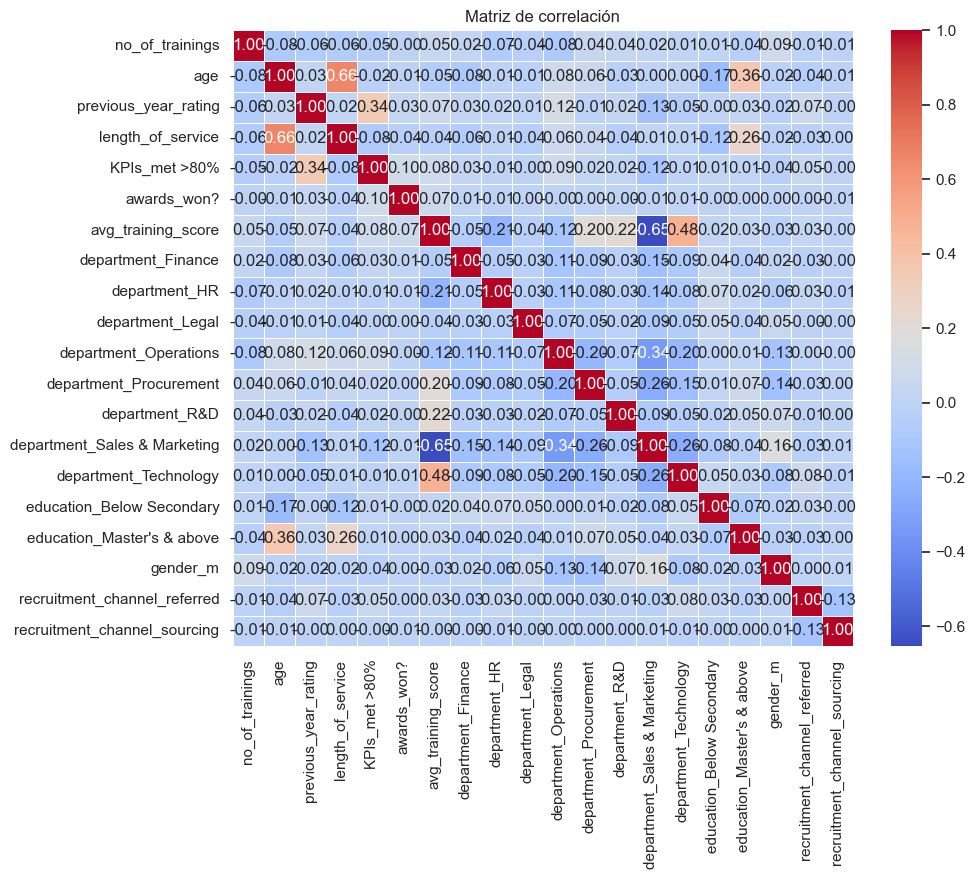

In [134]:
# Correlación entre variables
correlation = x_train_total.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

* Se sigue observando la correlación entre la variable 'age' y 'length_of_service', se procede a continuar con estas variables
* Asimismo, se observa que se genero una nueva correlación entre dos departamentos y 'avg_training_score', no lo consideramos tan importante, ya que inicialmente los departamentos era una variable categórica.
* Se obsrva que no hay multicolinealidad entre las variables generadas por las categorias de departamentos, eso era lo que se tenia que observar para considerar el descarte de alguna de ellas.

### <ins>Estandarización</ins>

Lo realizamos porque hay variables con diferentes escalas, como por ejemplo la edad. Esto podria generar desviaciones en los cálculos

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [136]:
x_scaled = scaler.fit_transform(x_train_total)

In [137]:
## Todos las variables quedan escaladas de 0 a 1
x_train_scaled = pd.DataFrame(data=x_scaled, columns = x_train_total.columns)
x_train_scaled

no_of_trainings    age  previous_year_rating  length_of_service  \
0             0.000000  0.275                  1.00           0.210526   
1             0.000000  0.350                  0.00           0.157895   
2             0.666667  0.225                  0.75           0.157895   
3             0.000000  0.850                  0.75           0.736842   
4             0.000000  0.275                  1.00           0.263158   
...                ...    ...                   ...                ...   
43841         0.666667  0.400                  0.50           0.157895   
43842         0.000000  0.175                  0.50           0.000000   
43843         0.000000  0.350                  1.00           0.315789   
43844         0.666667  0.375                  1.00           0.105263   
43845         0.000000  0.250                  0.00           0.052632   

       KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0                1.0          0.0            0.150000                 0.0   
1                0.0          0.0            0.650000                 0.0   
2                1.0          0.0            0.633333                 0.0   
3                1.0          0.0            0.133333                 0.0   
4                0.0          0.0            0.783333                 0.0   
...              ...          ...                 ...                 ...   
43841            0.0          0.0            0.466667                 0.0   
43842            0.0          0.0            0.483333                 0.0   
43843            1.0          0.0            0.433333                 0.0   
43844            0.0          0.0            0.783333                 0.0   
43845            0.0          0.0            0.233333                 0.0   

       department_HR  department_Legal  department_Operations  \
0                0.0               0.0                    0.0   
1                0.0               0.0                    0.0   
2                0.0               0.0                    0.0   
3                0.0               0.0                    0.0   
4                0.0               0.0                    0.0   
...              ...               ...                    ...   
43841            0.0               0.0                    0.0   
43842            0.0               0.0                    0.0   
43843            0.0               0.0                    1.0   
43844            0.0               0.0                    0.0   
43845            1.0               0.0                    0.0   

       department_Procurement  department_R&D  department_Sales & Marketing  \
0                         0.0             0.0                           1.0   
1                         0.0             0.0                           0.0   
2                         0.0             0.0                           0.0   
3                         0.0             0.0                           1.0   
4                         0.0             1.0                           0.0   
...                       ...             ...                           ...   
43841                     1.0             0.0                           0.0   
43842                     1.0             0.0                           0.0   
43843                     0.0             0.0                           0.0   
43844                     0.0             0.0                           0.0   
43845                     0.0             0.0                           0.0   

       department_Technology  education_Below Secondary  \
0                        0.0                        0.0   
1                        1.0                        0.0   
2                        1.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
...                      ...                        ...   
43841                    0.0                      

**<ins>Comparando las distribuciones:</ins>**

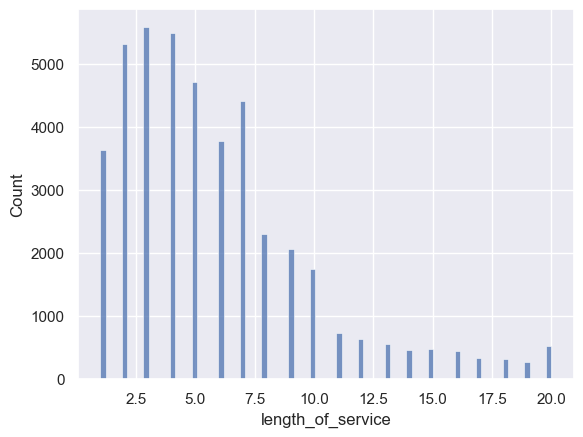

In [138]:
sns.histplot(data=x_train_total['length_of_service'])
plt.show()

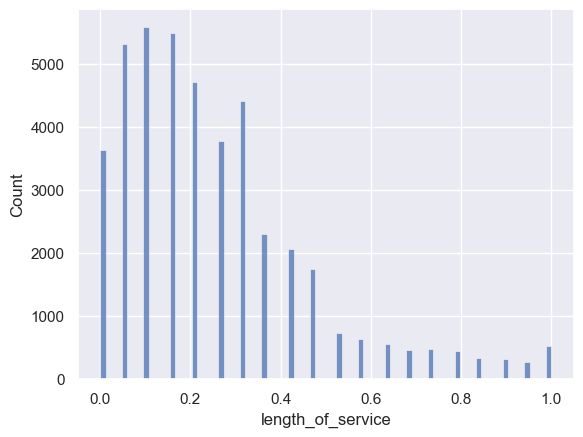

In [139]:
sns.histplot(data=x_train_scaled['length_of_service'])
plt.show()

* ***Como notamos, se mantiene la distribución de la data original con la data escalada***

***---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

## 2.2 <ins>Análisis Exploratorio - Test</ins>

Revisando las columnas del conjunto de datos:

In [140]:
x_test.head()

department     region   education gender recruitment_channel  \
40907                 HR  region_16  Bachelor's      m               other   
51939  Sales & Marketing   region_7  Bachelor's      m               other   
6978             Finance   region_2  Bachelor's      m               other   
12814         Operations  region_22  Bachelor's      f               other   
22921         Technology   region_7  Bachelor's      f               other   

       no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

In [141]:
x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [142]:
x_test.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [143]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 40907 to 18295
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            10962 non-null  object 
 1   region                10962 non-null  object 
 2   education             10502 non-null  object 
 3   gender                10962 non-null  object 
 4   recruitment_channel   10962 non-null  object 
 5   no_of_trainings       10962 non-null  int64  
 6   age                   10962 non-null  int64  
 7   previous_year_rating  10141 non-null  float64
 8   length_of_service     10962 non-null  int64  
 9   KPIs_met >80%         10962 non-null  int64  
 10  awards_won?           10962 non-null  int64  
 11  avg_training_score    10962 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.1+ MB


* Se observan presencia de nulos en dos columnas, **education** y **previous_year_rating**

**<ins>Principales estadísticos:</ins>**

In [144]:
## Solo para variables numéricas
x_test.describe()

no_of_trainings           age  previous_year_rating  length_of_service  \
count     10962.000000  10962.000000          10141.000000       10962.000000   
mean          1.245120     34.774220              3.332906           5.831144   
std           0.602004      7.528289              1.259211           4.205909   
min           1.000000     20.000000              1.000000           1.000000   
25%           1.000000     29.000000              3.000000           3.000000   
50%           1.000000     33.000000              3.000000           5.000000   
75%           1.000000     39.000000              4.000000           7.000000   
max           9.000000     60.000000              5.000000          34.000000   

       KPIs_met >80%   awards_won?  avg_training_score  
count   10962.000000  10962.000000        10962.000000  
mean        0.349115      0.022624           63.469440  
std         0.476712      0.148707           13.436922  
min         0.000000      0.000000           39.000000  
25%         0.000000      0.000000           51.000000  
50%         0.000000      0.000000           60.000000  
75%         1.000000      0.000000           76.000000  
max         1.000000      1.000000           99.000000

* Observamos posibles valores atípicos en las columnas **no_of_trainings** y **length_of_service**, los valores máximos estan muy distantes de la media
* En la columna **age**, habria que analizar existencia de atipicos

In [145]:
x_test.describe()[1:3]

no_of_trainings        age  previous_year_rating  length_of_service  \
mean         1.245120  34.774220              3.332906           5.831144   
std          0.602004   7.528289              1.259211           4.205909   

      KPIs_met >80%  awards_won?  avg_training_score  
mean       0.349115     0.022624           63.469440  
std        0.476712     0.148707           13.436922

In [146]:
## Solo para variables categóricas
x_test.describe(include='object')

department    region   education gender recruitment_channel
count               10962     10962       10502  10962               10962
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                 3331      2379        7322   7680                6134

* Observamos que dos columnas, poseen muchas categorias, las cuales son **region** y **department**. Sin embargo, consideramos que la región no tiene mucha relación con la respuesta que buscamos, se procederá a eliminarla. La variable department, si bien tiene varias variables, pero consideramos que si es importante para el análisis.
* Asimismo, se observa en la descripción del problema a resolver, que la causa de que no se logre la promoción es por la falta de línea de carrera, y estas variables no influyen mucho para esto. Caso contrario sería si fuera por distancia o por movilización.

<ins>**Observando las variables con valores nulos**</ins>

In [147]:
x_test['education'].value_counts(dropna=False)

Bachelor's          7322
Master's & above    3015
NaN                  460
Below Secondary      165
Name: education, dtype: int64

In [148]:
x_test['previous_year_rating'].value_counts(dropna=False)

3.0    3685
5.0    2350
4.0    2007
1.0    1232
2.0     867
NaN     821
Name: previous_year_rating, dtype: int64

<ins>**Observando las variables con posibles valores Atípicos**</ins>

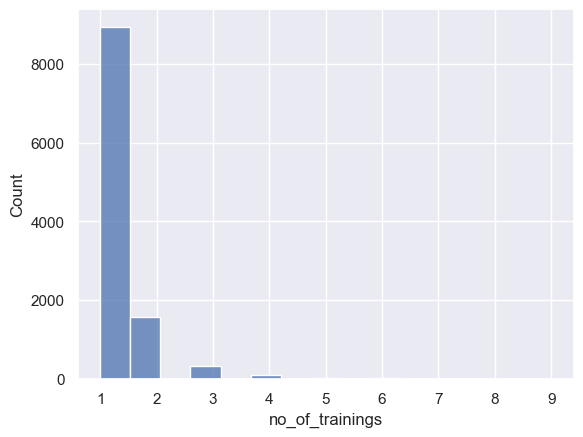

In [149]:
## Para la variable no_of_trainings
sns.histplot(data=x_test, x='no_of_trainings')
plt.show()

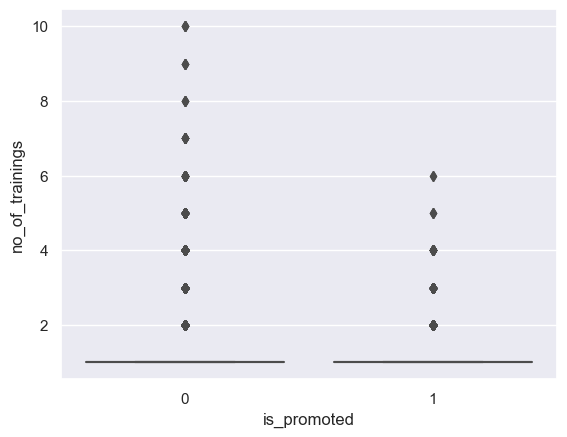

In [150]:
sns.boxplot(data=df_prepro, x=target, y='no_of_trainings')
plt.show()

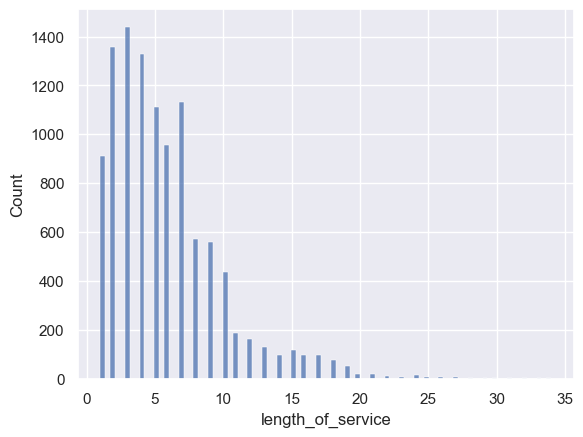

In [151]:
## Para la variable length_of_service
sns.histplot(data=x_test, x='length_of_service')
plt.show()

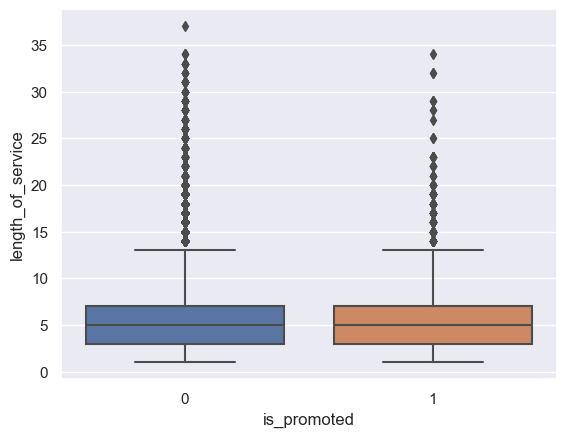

In [152]:
sns.boxplot(data=df_prepro, x=target, y='length_of_service')
plt.show()

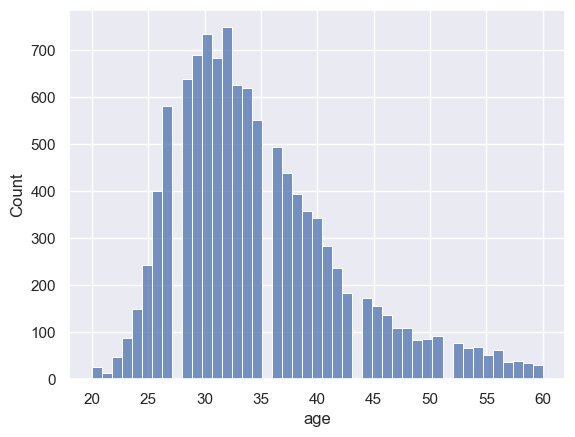

In [153]:
## Para la variable age
sns.histplot(data=x_test, x='age')
plt.show()

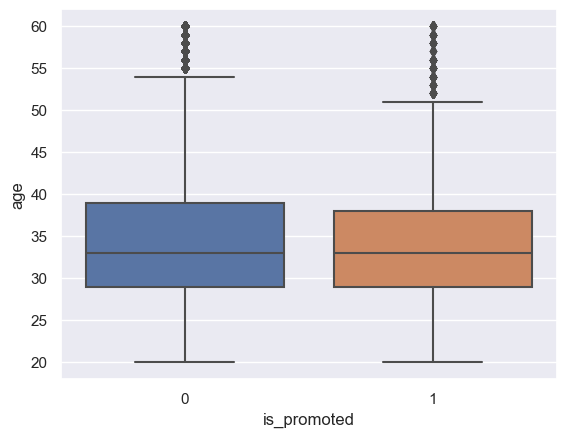

In [154]:
sns.boxplot(data=df_prepro, x=target, y='age')
plt.show()

* ***Observamos que la variable 'age' no hay presencia como tal de atipicos, como se observa en la gráfica de frecuencias***
* ***Si existen valores atípicos en las variables 'no_of_trainings' y 'length_of_service'***
* ***Los valores nulos tenemos que trabajarlos***

### 2.2.1 <ins>Tratamiento de valores nulos</ins> 

In [155]:
## Instalando libreria para tratamiento de nulos
#!pip install missingno

In [156]:
import missingno as msno

In [157]:
x_test.head()

department     region   education gender recruitment_channel  \
40907                 HR  region_16  Bachelor's      m               other   
51939  Sales & Marketing   region_7  Bachelor's      m               other   
6978             Finance   region_2  Bachelor's      m               other   
12814         Operations  region_22  Bachelor's      f               other   
22921         Technology   region_7  Bachelor's      f               other   

       no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

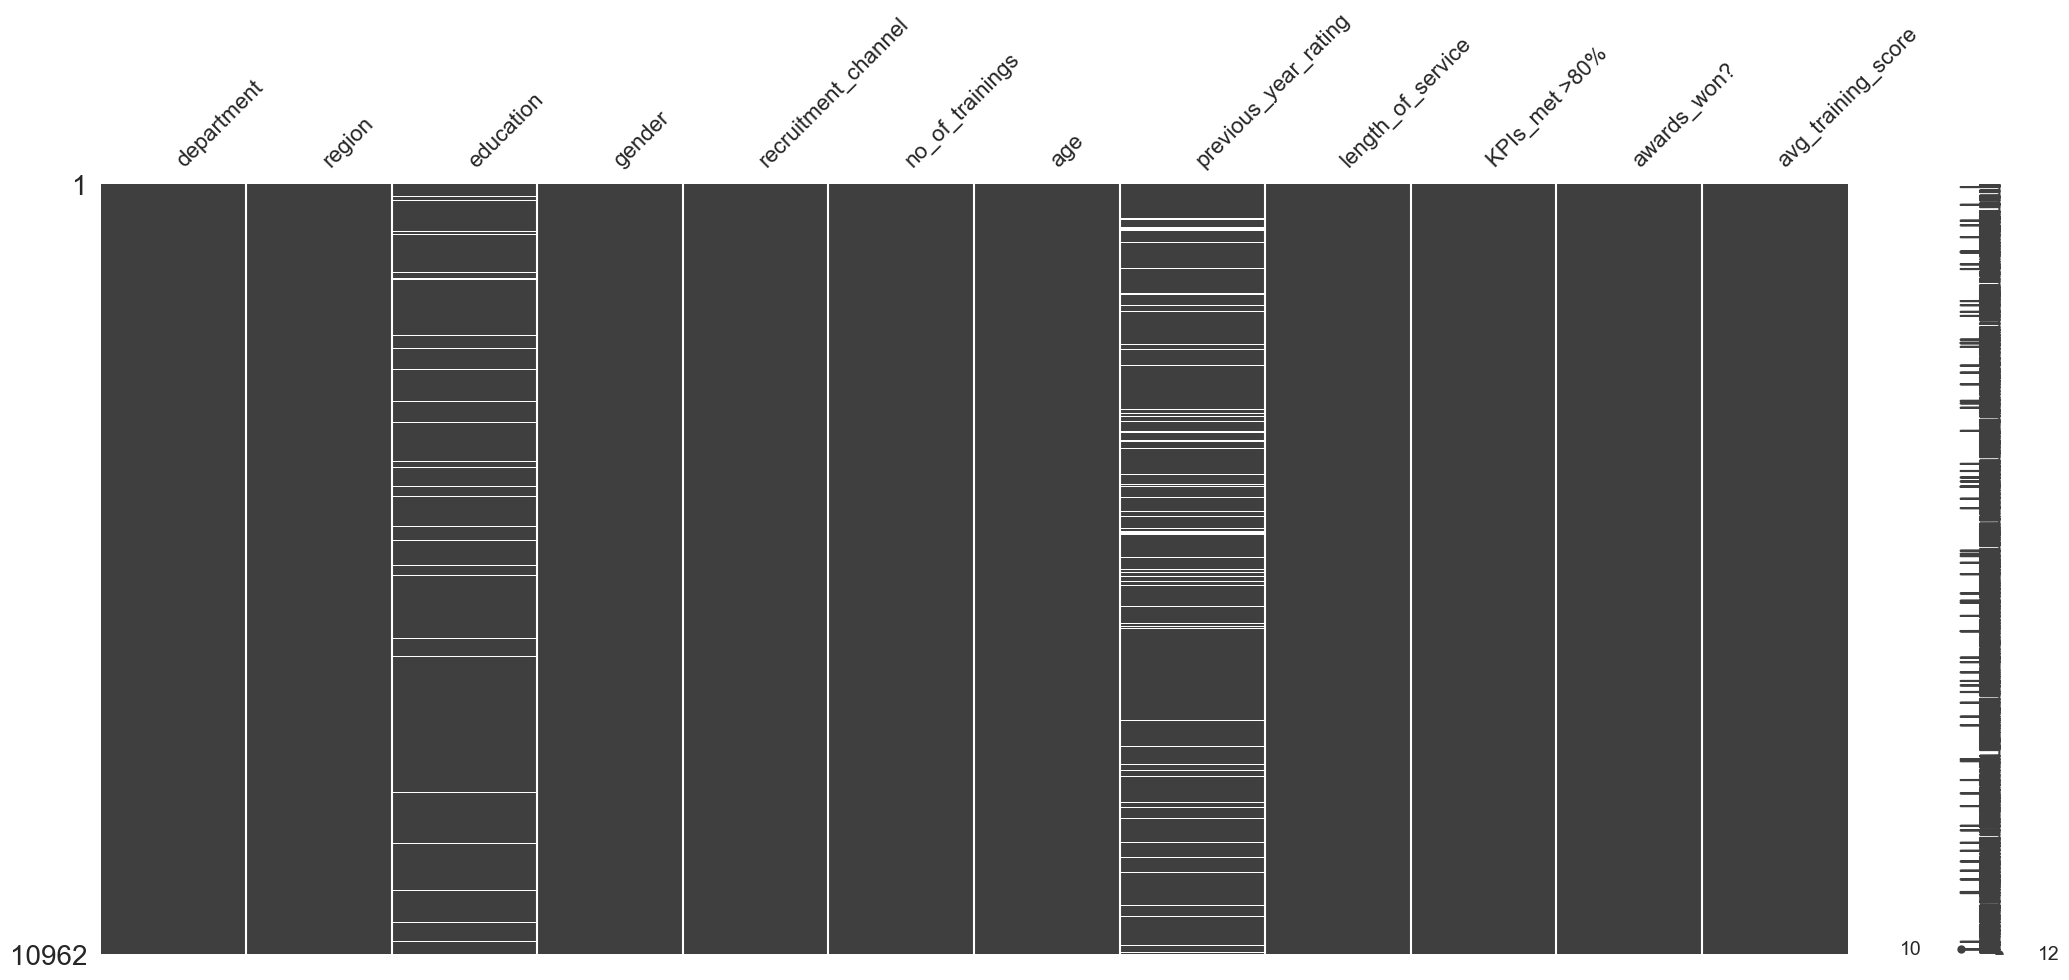

In [158]:
msno.matrix(x_test)
plt.show()

* Efectivamente se observan bastantes nulos en las dos variables a analizar

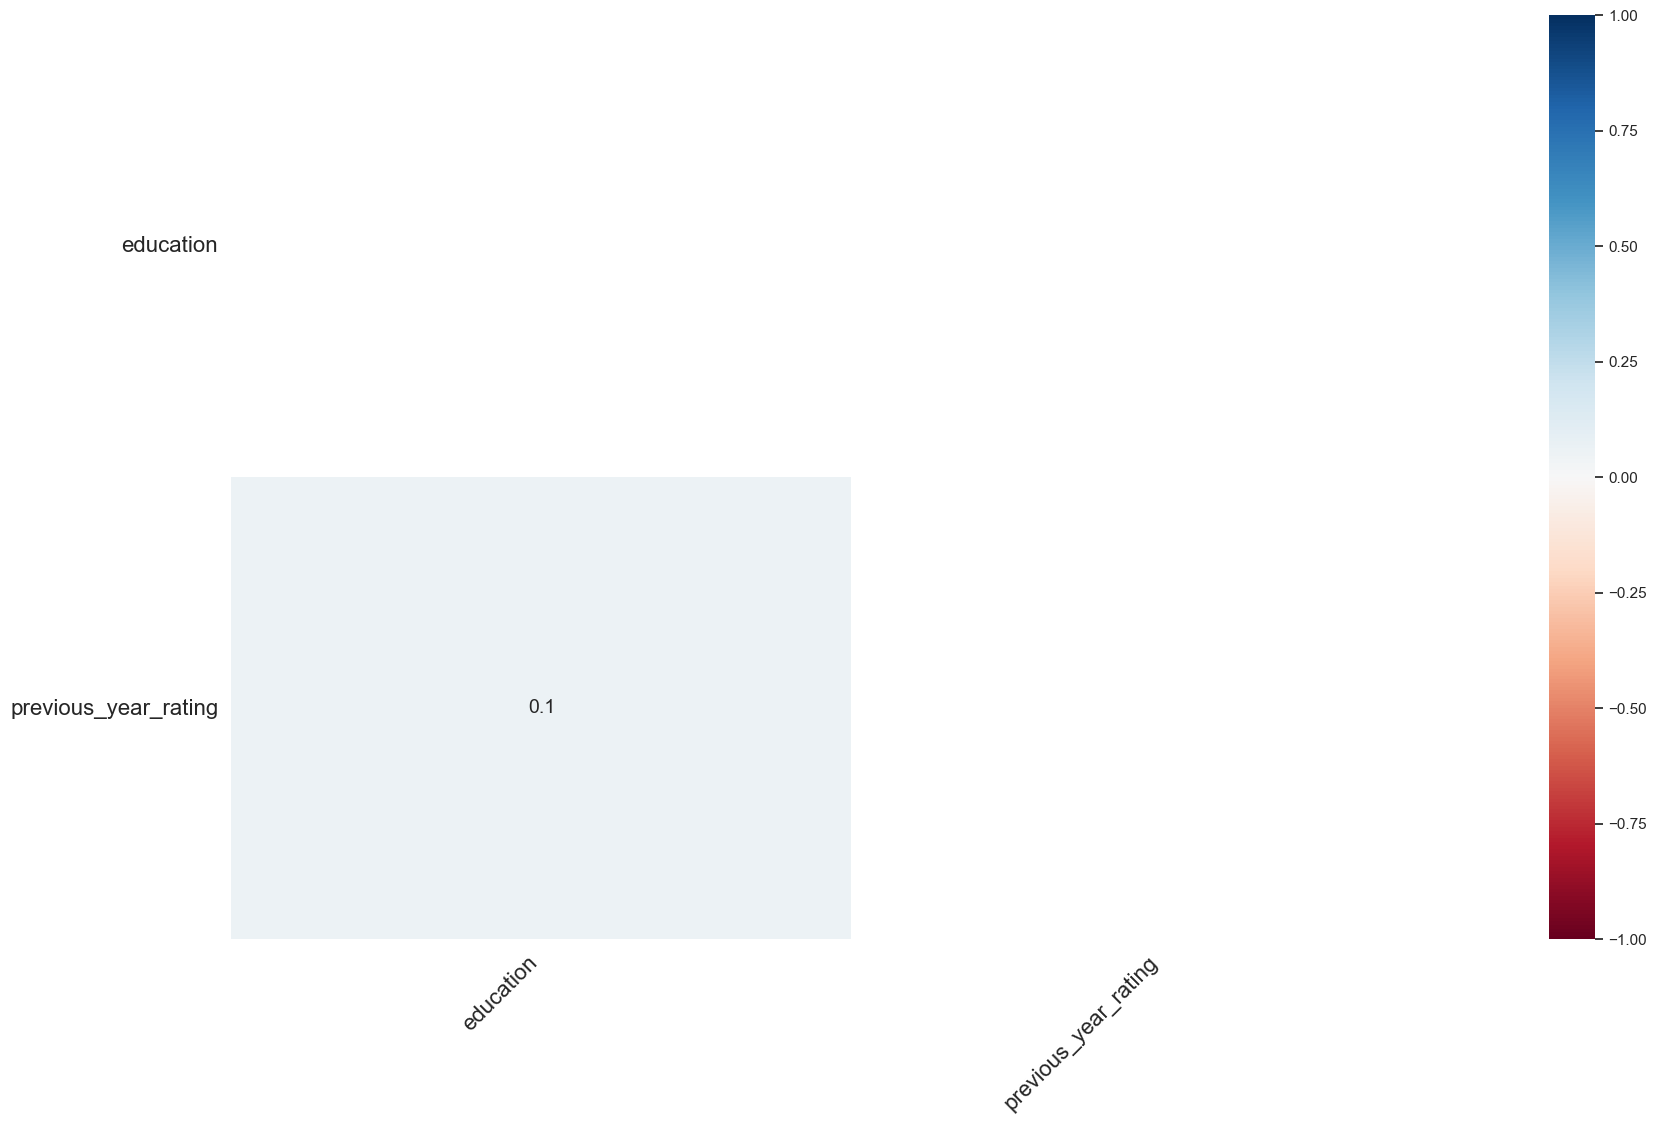

In [159]:
msno.heatmap(x_test)
plt.show()

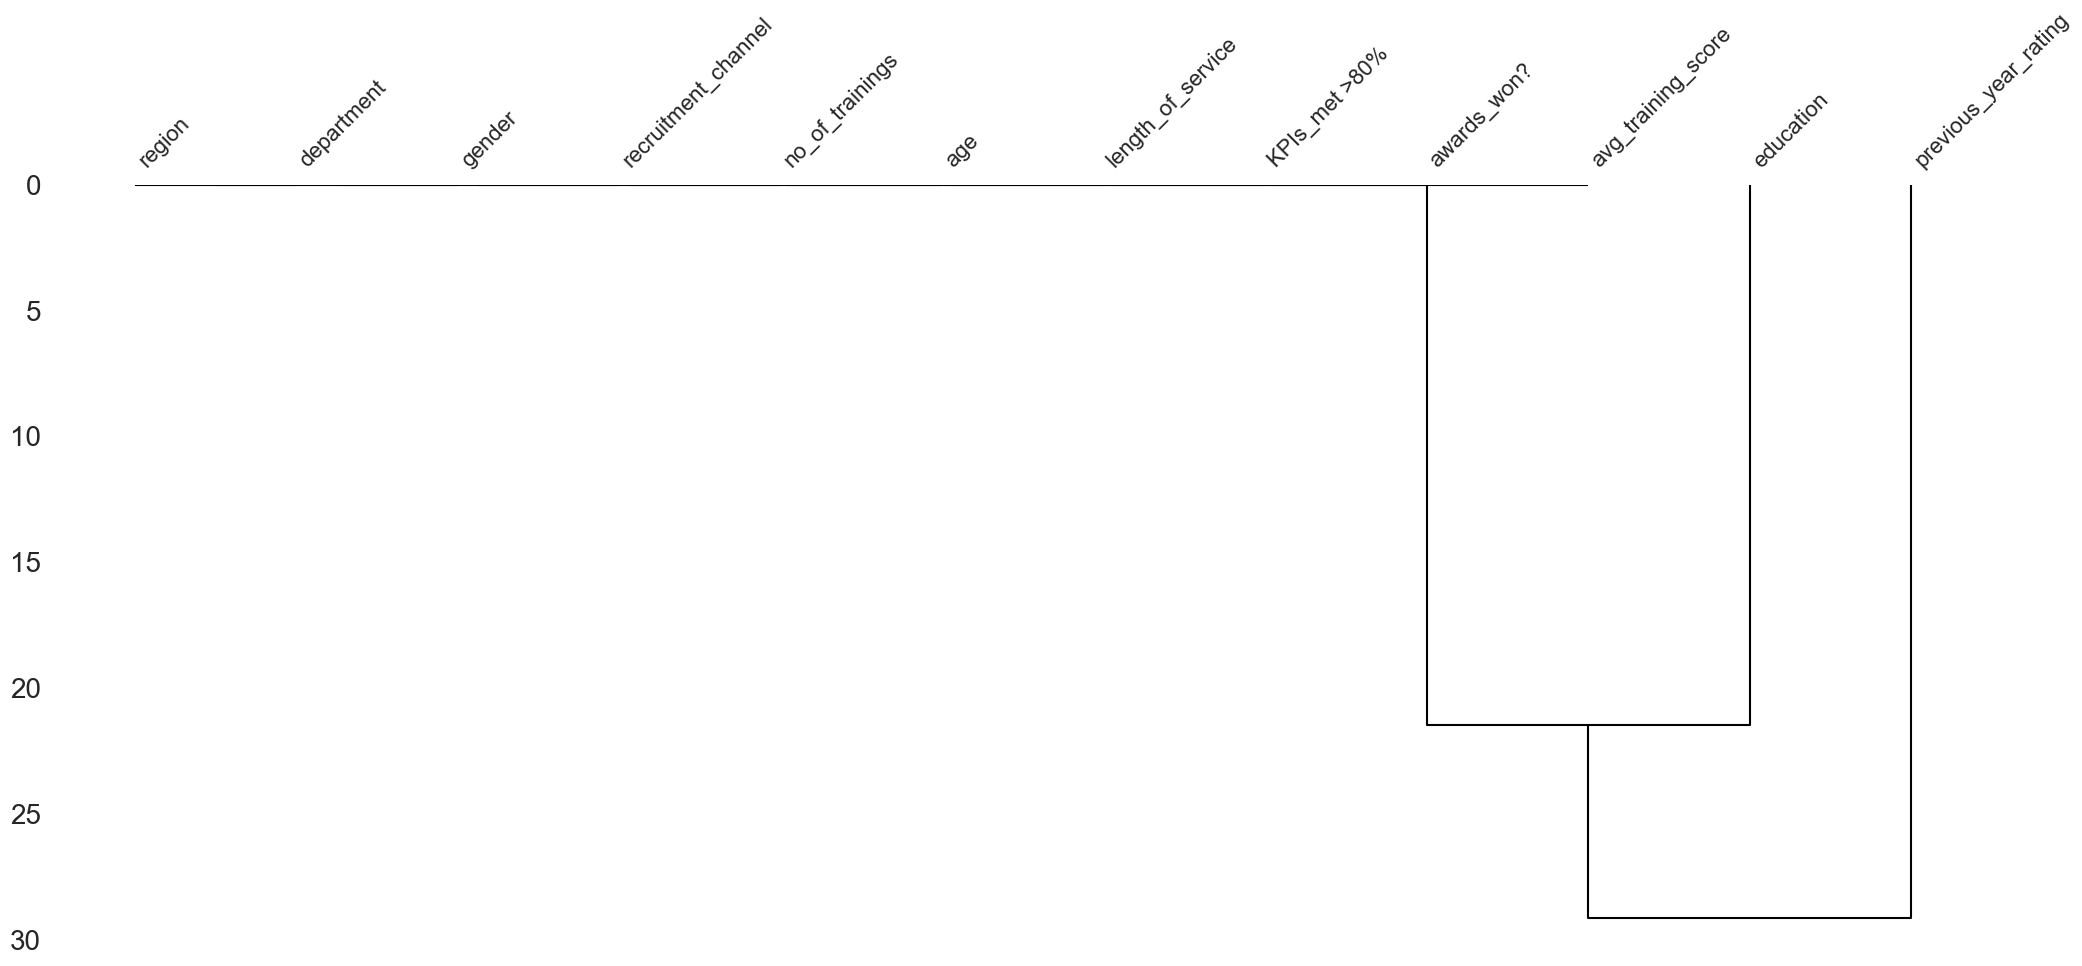

In [160]:
msno.dendrogram(x_test)
plt.show()

In [161]:
x_test.isnull().sum().sort_values(ascending=False)

previous_year_rating    821
education               460
department                0
region                    0
gender                    0
recruitment_channel       0
no_of_trainings           0
age                       0
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
dtype: int64

In [162]:
## Separamos la data en data categorica y numérica a fin de realizar la imputación
x_test_cat = x_test.select_dtypes('object')
x_test_num = x_test.select_dtypes('number')

In [163]:
x_test_cat.head()

department     region   education gender recruitment_channel
40907                 HR  region_16  Bachelor's      m               other
51939  Sales & Marketing   region_7  Bachelor's      m               other
6978             Finance   region_2  Bachelor's      m               other
12814         Operations  region_22  Bachelor's      f               other
22921         Technology   region_7  Bachelor's      f               other

In [164]:
x_test_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

### Imputación de Numéricas

In [165]:
x_test['previous_year_rating'].mean()

3.3329060250468396

In [166]:
x_test['previous_year_rating'].median()

3.0

In [167]:
from sklearn.impute import SimpleImputer

In [168]:
x_test_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

In [169]:
imputer_num = SimpleImputer(strategy='median')

In [170]:
imputer_num.fit(x_test_num)

SimpleImputer(strategy='median')

In [171]:
imputer_num.statistics_

array([ 1., 33.,  3.,  5.,  0.,  0., 60.])

In [172]:
imputer_num.transform(x_test_num)

array([[ 1., 35.,  5., ...,  0.,  0., 47.],
       [ 3., 33.,  1., ...,  0.,  0., 51.],
       [ 2., 38.,  3., ...,  0.,  0., 64.],
       ...,
       [ 1., 39.,  5., ...,  1.,  0., 50.],
       [ 1., 31.,  2., ...,  0.,  0., 49.],
       [ 1., 49.,  3., ...,  0.,  0., 54.]])

In [173]:
x_test_num_imputed = pd.DataFrame(data=imputer_num.transform(x_test_num), columns = x_test_num.columns)

In [174]:
x_test_num.head()

no_of_trainings  age  previous_year_rating  length_of_service  \
40907                1   35                   5.0                 10   
51939                3   33                   1.0                  4   
6978                 2   38                   3.0                 11   
12814                1   33                   1.0                  8   
22921                1   37                   1.0                  4   

       KPIs_met >80%  awards_won?  avg_training_score  
40907              0            0                  47  
51939              0            0                  51  
6978               0            0                  64  
12814              0            0                  56  
22921              0            0                  80

In [175]:
x_test_num_imputed.head()

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  35.0                   5.0               10.0   
1              3.0  33.0                   1.0                4.0   
2              2.0  38.0                   3.0               11.0   
3              1.0  33.0                   1.0                8.0   
4              1.0  37.0                   1.0                4.0   

   KPIs_met >80%  awards_won?  avg_training_score  
0            0.0          0.0                47.0  
1            0.0          0.0                51.0  
2            0.0          0.0                64.0  
3            0.0          0.0                56.0  
4            0.0          0.0                80.0

In [176]:
x_test_num.isnull().sum()

no_of_trainings           0
age                       0
previous_year_rating    821
length_of_service         0
KPIs_met >80%             0
awards_won?               0
avg_training_score        0
dtype: int64

In [177]:
x_test_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

***Notamos que ya imputamos los datos nulos***

### Imputación de categóricas

In [178]:
imputer_cat = SimpleImputer(strategy='most_frequent')
imputer_cat.fit(x_test_cat)
x_test_cat_imputed = pd.DataFrame(data=imputer_cat.transform(x_test_cat), columns = x_test_cat.columns)

x_test_cat_imputed.head()

department     region   education gender recruitment_channel
0                 HR  region_16  Bachelor's      m               other
1  Sales & Marketing   region_7  Bachelor's      m               other
2            Finance   region_2  Bachelor's      m               other
3         Operations  region_22  Bachelor's      f               other
4         Technology   region_7  Bachelor's      f               other

In [179]:
imputer_cat.statistics_

array(['Sales & Marketing', 'region_2', "Bachelor's", 'm', 'other'],
      dtype=object)

In [180]:
x_test_cat.isnull().sum()

department               0
region                   0
education              460
gender                   0
recruitment_channel      0
dtype: int64

In [181]:
x_test_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

***Ya no tenemos datos nulos***

### Encoding de variables categóricas

In [182]:
x_test_cat_imputed.describe()

department    region   education gender recruitment_channel
count               10962     10962       10962  10962               10962
unique                  9        34           3      2                   3
top     Sales & Marketing  region_2  Bachelor's      m               other
freq                 3331      2379        7782   7680                6134

In [183]:
## Eliminamos la variable 'region', debido a que posee demasiadas categorias y además no es una variable relevante
x_test_cat_imputed = x_test_cat_imputed.drop('region',axis=1)
x_test_cat_imputed.head()

department   education gender recruitment_channel
0                 HR  Bachelor's      m               other
1  Sales & Marketing  Bachelor's      m               other
2            Finance  Bachelor's      m               other
3         Operations  Bachelor's      f               other
4         Technology  Bachelor's      f               other

In [184]:
## Convertimos las variables categóricas en su correspondiente en números para poder hacer mejor los cálculos de los algoritmos de machine learning
x_test_cat_dummies = pd.get_dummies(x_test_cat_imputed, drop_first=True)

In [185]:
x_test_cat_imputed.head()

department   education gender recruitment_channel
0                 HR  Bachelor's      m               other
1  Sales & Marketing  Bachelor's      m               other
2            Finance  Bachelor's      m               other
3         Operations  Bachelor's      f               other
4         Technology  Bachelor's      f               other

In [186]:
x_test_cat_dummies.head()

department_Finance  department_HR  department_Legal  department_Operations  \
0                   0              1                 0                      0   
1                   0              0                 0                      0   
2                   1              0                 0                      0   
3                   0              0                 0                      1   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             0   
1                       0               0                             1   
2                       0               0                             0   
3                       0               0                             0   
4                       0               0                             0   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      1                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           0         1                             0   
2                           0         1                             0   
3                           0         0                             0   
4                           0         0                             0   

   recruitment_channel_sourcing  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

### 2.2.2 <ins>Tratamiento de valores Extremos</ins>

Acá analizaremos los valores atípicos

In [187]:
x_test_num_imputed.describe()

no_of_trainings           age  previous_year_rating  length_of_service  \
count     10962.000000  10962.000000          10962.000000       10962.000000   
mean          1.245120     34.774220              3.307973           5.831144   
std           0.602004      7.528289              1.214301           4.205909   
min           1.000000     20.000000              1.000000           1.000000   
25%           1.000000     29.000000              3.000000           3.000000   
50%           1.000000     33.000000              3.000000           5.000000   
75%           1.000000     39.000000              4.000000           7.000000   
max           9.000000     60.000000              5.000000          34.000000   

       KPIs_met >80%   awards_won?  avg_training_score  
count   10962.000000  10962.000000        10962.000000  
mean        0.349115      0.022624           63.469440  
std         0.476712      0.148707           13.436922  
min         0.000000      0.000000           39.000000  
25%         0.000000      0.000000           51.000000  
50%         0.000000      0.000000           60.000000  
75%         1.000000      0.000000           76.000000  
max         1.000000      1.000000           99.000000

Observamos que los que posiblemente tengan valores atípicos son las variables **no_of_trainings**, **length_of_service** y **age**

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

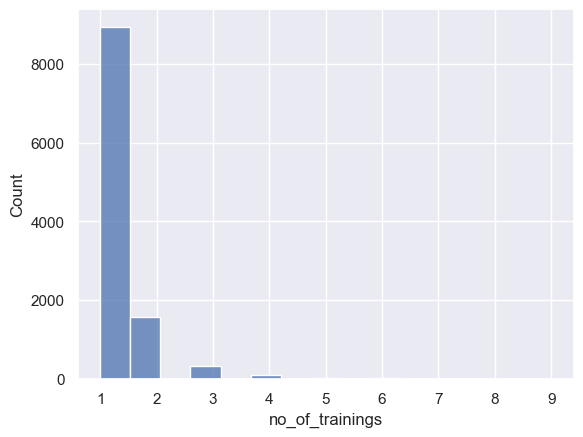

In [189]:
sns.histplot(data=x_test_num_imputed, x='no_of_trainings')
plt.show()

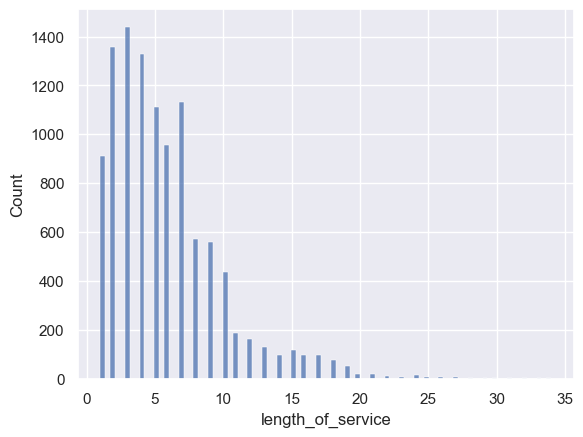

In [190]:
sns.histplot(data=x_test_num_imputed, x='length_of_service')
plt.show()

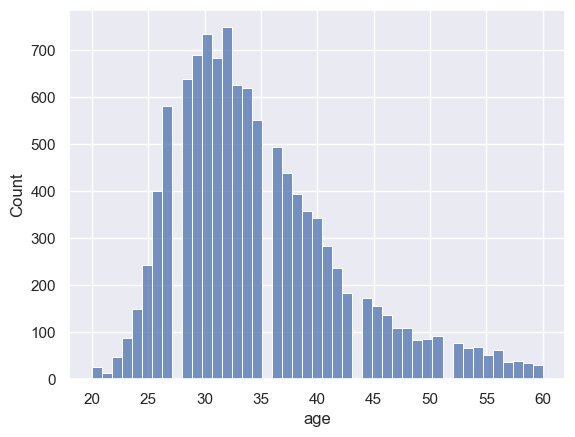

In [191]:
sns.histplot(data=x_test_num_imputed, x='age')
plt.show()

***Notamos que la variable*** '**age**' ***pasa la prueba de atípicos***

In [192]:
x_test_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.01,0.025,0.05,0.1,0.5,0.75])

no_of_trainings  length_of_service           age
count     10962.000000       10962.000000  10962.000000
mean          1.245120           5.831144     34.774220
std           0.602004           4.205909      7.528289
min           1.000000           1.000000     20.000000
1%            1.000000           1.000000     23.000000
2.5%          1.000000           1.000000     24.000000
5%            1.000000           1.000000     25.000000
10%           1.000000           2.000000     27.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
max           9.000000          34.000000     60.000000

In [193]:
x_test_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     10962.000000       10962.000000  10962.000000
mean          1.245120           5.831144     34.774220
std           0.602004           4.205909      7.528289
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     45.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          17.000000     54.000000
99%           4.000000          20.000000     57.000000
max           9.000000          34.000000     60.000000

* Según lo observado, los que si poseen atípicos son **'no_of_trainings'** y **'length_of_service'**.
* La historia es por los percentiles superiores

### Acotando variable 'no_of_trainings'

In [194]:
p1 = np.percentile(x_test_num_imputed['no_of_trainings'],1)
p99 = np.percentile(x_test_num_imputed['no_of_trainings'],99)

In [195]:
p1, p99

(1.0, 4.0)

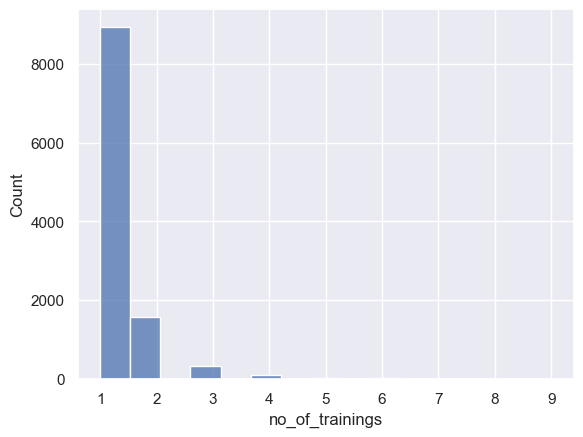

In [196]:
sns.histplot(data=x_test_num_imputed, x='no_of_trainings')
plt.show()

In [197]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
x_test_num_imputed['no_of_trainings'] = np.clip(x_test_num_imputed['no_of_trainings'],p1,p99)

In [198]:
## Veamos los cambios en la distribución
x_test_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     10962.000000       10962.000000  10962.000000
mean          1.238916           5.831144     34.774220
std           0.560807           4.205909      7.528289
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     45.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          17.000000     54.000000
99%           4.000000          20.000000     57.000000
max           4.000000          34.000000     60.000000

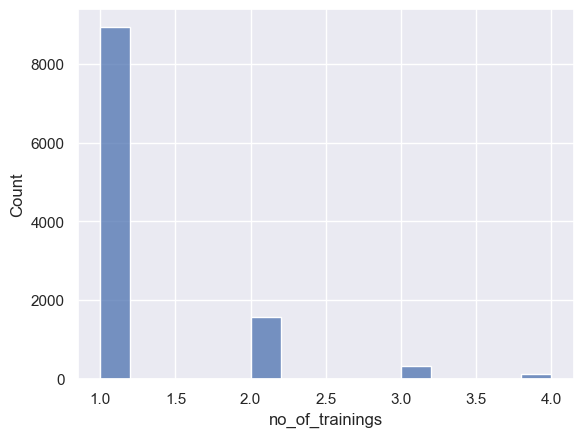

In [199]:
sns.histplot(data = x_test_num_imputed, x='no_of_trainings')
plt.show()

> Observamos que la distribución mejoró

### Acotando variable 'length_of_service'

In [200]:
p1 = np.percentile(x_test_num_imputed['length_of_service'],1)
p99 = np.percentile(x_test_num_imputed['length_of_service'],99)
p1, p99

(1.0, 20.0)

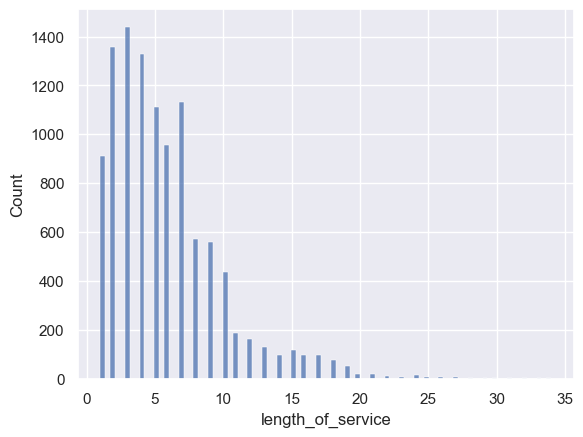

In [201]:
sns.histplot(data=x_test_num_imputed, x='length_of_service')
plt.show()

In [202]:
## Imputando los valores con la función clip, acotamos entre los percentiles seleccionados
x_test_num_imputed['length_of_service'] = np.clip(x_test_num_imputed['length_of_service'],p1,p99)

In [203]:
## Veamos los cambios en la distribución
x_test_num_imputed[['no_of_trainings','length_of_service','age']].describe(percentiles=[0.5,0.75,0.9,0.95,0.975,0.99])

no_of_trainings  length_of_service           age
count     10962.000000       10962.000000  10962.000000
mean          1.238916           5.788360     34.774220
std           0.560807           4.021779      7.528289
min           1.000000           1.000000     20.000000
50%           1.000000           5.000000     33.000000
75%           1.000000           7.000000     39.000000
90%           2.000000          11.000000     45.000000
95%           2.000000          15.000000     51.000000
97.5%         3.000000          17.000000     54.000000
99%           4.000000          20.000000     57.000000
max           4.000000          20.000000     60.000000

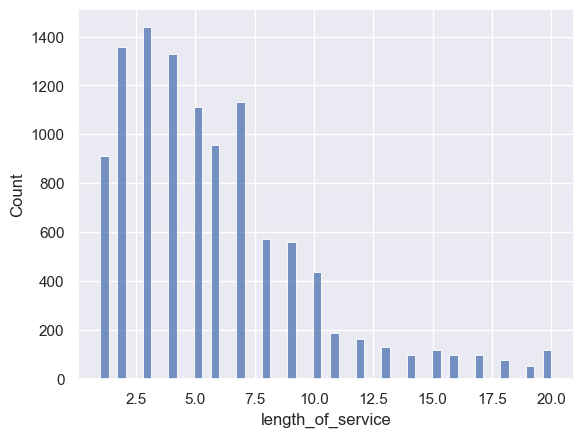

In [204]:
sns.histplot(data = x_test_num_imputed, x='length_of_service')
plt.show()

> Observamos que la distribución mejoró

### <ins>Consolidación de la data</ins>

In [205]:
x_test_cat_dummies.head()

department_Finance  department_HR  department_Legal  department_Operations  \
0                   0              1                 0                      0   
1                   0              0                 0                      0   
2                   1              0                 0                      0   
3                   0              0                 0                      1   
4                   0              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             0   
1                       0               0                             1   
2                       0               0                             0   
3                       0               0                             0   
4                       0               0                             0   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      1                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           0         1                             0   
2                           0         1                             0   
3                           0         0                             0   
4                           0         0                             0   

   recruitment_channel_sourcing  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

In [206]:
x_test_num_imputed.head()

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  35.0                   5.0               10.0   
1              3.0  33.0                   1.0                4.0   
2              2.0  38.0                   3.0               11.0   
3              1.0  33.0                   1.0                8.0   
4              1.0  37.0                   1.0                4.0   

   KPIs_met >80%  awards_won?  avg_training_score  
0            0.0          0.0                47.0  
1            0.0          0.0                51.0  
2            0.0          0.0                64.0  
3            0.0          0.0                56.0  
4            0.0          0.0                80.0

In [207]:
x_test_cat_dummies.shape

(10962, 13)

In [208]:
x_test_num_imputed.shape

(10962, 7)

In [209]:
## Ahora procedemos a concatenar los dos dataframes para convertirlo en uno total
x_test_total = pd.concat([x_test_num_imputed, x_test_cat_dummies],axis=1)
x_test_total.head(10)

no_of_trainings   age  previous_year_rating  length_of_service  \
0              1.0  35.0                   5.0               10.0   
1              3.0  33.0                   1.0                4.0   
2              2.0  38.0                   3.0               11.0   
3              1.0  33.0                   1.0                8.0   
4              1.0  37.0                   1.0                4.0   
5              1.0  30.0                   5.0                2.0   
6              2.0  34.0                   3.0                9.0   
7              1.0  29.0                   4.0                5.0   
8              2.0  40.0                   3.0                4.0   
9              1.0  51.0                   4.0               18.0   

   KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0            0.0          0.0                47.0                   0   
1            0.0          0.0                51.0                   0   
2            0.0          0.0                64.0                   1   
3            0.0          0.0                56.0                   0   
4            0.0          0.0                80.0                   0   
5            1.0          0.0                71.0                   0   
6            0.0          0.0                82.0                   0   
7            0.0          0.0                51.0                   0   
8            0.0          0.0                76.0                   1   
9            1.0          0.0                69.0                   0   

   department_HR  department_Legal  department_Operations  \
0              1                 0                      0   
1              0                 0                      0   
2              0                 0                      0   
3              0                 0                      1   
4              0                 0                      0   
5              0                 0                      0   
6              0                 0                      0   
7              0                 0                      0   
8              0                 0                      0   
9              0                 0                      0   

   department_Procurement  department_R&D  department_Sales & Marketing  \
0                       0               0                             0   
1                       0               0                             1   
2                       0               0                             0   
3                       0               0                             0   
4                       0               0                             0   
5                       1               0                             0   
6                       0               0                             0   
7                       0               0                             1   
8                       0               0                             0   
9                       1               0                             0   

   department_Technology  education_Below Secondary  \
0                      0                          0   
1                      0                          0   
2                      0                          0   
3                      0                          0   
4                      1                          0   
5                      0                          0   
6                      1                          0   
7                      0                          0   
8                      0                          0   
9                      0                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           0         1                             0   
1                           0         1                             0   
2                           0         1                             0   
3                           0         0    

In [210]:
## verificamos si hay nulos
x_test_total.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Below Secondary       0
education_Master's & above      0
gender_m                        0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
dtype: int64

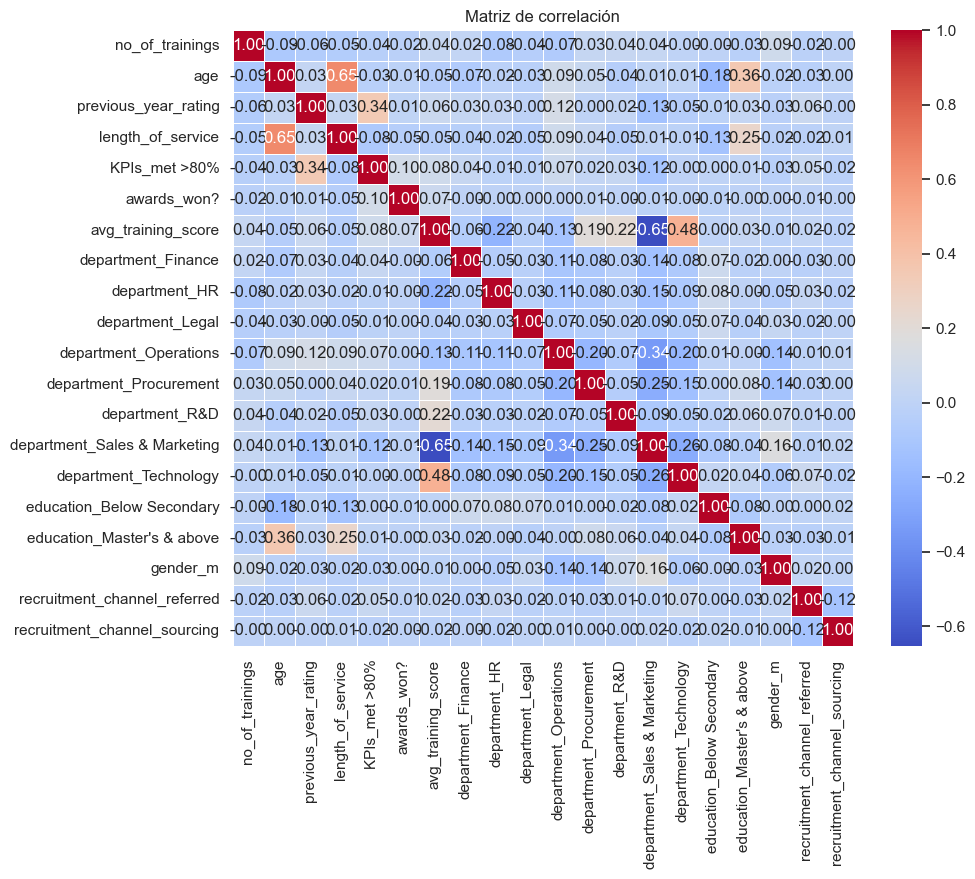

In [211]:
# Correlación entre variables
correlation = x_test_total.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

* Se sigue observando la correlación entre la variable 'age' y 'length_of_service', se procede a continuar con estas variables
* Asimismo, se observa que se genero una nueva correlación entre dos departamentos y 'avg_training_score', no lo consideramos tan importante, ya que inicialmente los departamentos era una variable categórica.
* Se obsrva que no hay multicolinealidad entre las variables generadas por las categorias de departamentos, eso era lo que se tenia que observar para considerar el descarte de alguna de ellas.

### <ins>Estandarización</ins>

Lo realizamos porque hay variables con diferentes escalas, como por ejemplo la edad. Esto podria generar desviaciones en los cálculos

In [212]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [213]:
x_scaled = scaler.fit_transform(x_test_total)

In [214]:
## Todos las variables quedan escaladas de 0 a 1
x_test_scaled = pd.DataFrame(data=x_scaled, columns = x_test_total.columns)
x_test_scaled

no_of_trainings    age  previous_year_rating  length_of_service  \
0             0.000000  0.375                  1.00           0.473684   
1             0.666667  0.325                  0.00           0.157895   
2             0.333333  0.450                  0.50           0.526316   
3             0.000000  0.325                  0.00           0.368421   
4             0.000000  0.425                  0.00           0.157895   
...                ...    ...                   ...                ...   
10957         0.000000  0.375                  0.50           0.052632   
10958         0.333333  0.750                  1.00           0.105263   
10959         0.000000  0.475                  1.00           0.157895   
10960         0.000000  0.275                  0.25           0.210526   
10961         0.000000  0.725                  0.50           0.052632   

       KPIs_met >80%  awards_won?  avg_training_score  department_Finance  \
0                0.0          0.0            0.133333                 0.0   
1                0.0          0.0            0.200000                 0.0   
2                0.0          0.0            0.416667                 1.0   
3                0.0          0.0            0.283333                 0.0   
4                0.0          0.0            0.683333                 0.0   
...              ...          ...                 ...                 ...   
10957            0.0          0.0            0.733333                 0.0   
10958            1.0          0.0            0.100000                 0.0   
10959            1.0          0.0            0.183333                 0.0   
10960            0.0          0.0            0.166667                 0.0   
10961            0.0          0.0            0.250000                 0.0   

       department_HR  department_Legal  department_Operations  \
0                1.0               0.0                    0.0   
1                0.0               0.0                    0.0   
2                0.0               0.0                    0.0   
3                0.0               0.0                    1.0   
4                0.0               0.0                    0.0   
...              ...               ...                    ...   
10957            0.0               0.0                    0.0   
10958            0.0               0.0                    0.0   
10959            0.0               0.0                    0.0   
10960            0.0               0.0                    0.0   
10961            0.0               0.0                    0.0   

       department_Procurement  department_R&D  department_Sales & Marketing  \
0                         0.0             0.0                           0.0   
1                         0.0             0.0                           1.0   
2                         0.0             0.0                           0.0   
3                         0.0             0.0                           0.0   
4                         0.0             0.0                           0.0   
...                       ...             ...                           ...   
10957                     0.0             0.0                           0.0   
10958                     0.0             0.0                           1.0   
10959                     0.0             0.0                           1.0   
10960                     0.0             0.0                           1.0   
10961                     0.0             0.0                           1.0   

       department_Technology  education_Below Secondary  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        1.0                        0.0   
...                      ...                        ...   
10957                    0.0                      

**<ins>Comparando las distribuciones:</ins>**

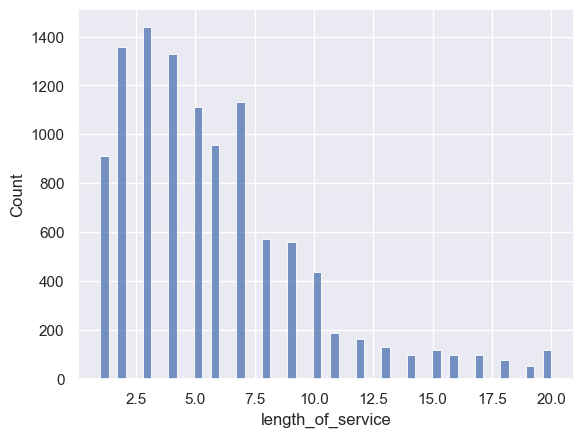

In [215]:
sns.histplot(data=x_test_total['length_of_service'])
plt.show()

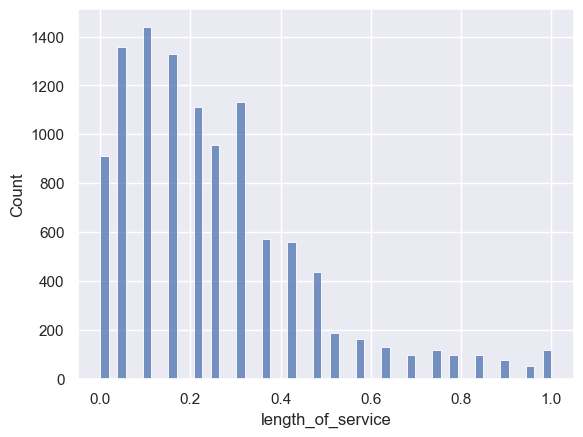

In [216]:
sns.histplot(data=x_test_scaled['length_of_service'])
plt.show()

* ***Como notamos, se mantiene la distribución de la data original con la data escalada***

***----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------***

Verificamos que ambas tengan las misma cantidad de columnas

In [217]:
x_train_scaled.shape

(43846, 20)

In [218]:
x_test_scaled.shape

(10962, 20)

## 2.3 <ins>Balanceo de Clases</ins>

### 2.3.1 Primer Balanceo

El balanceo solo lo realizamos sobre la base de entrenamiento

In [219]:
## Observamos el porcentaje de la variable target original en la base train.
y_train.mean()

0.08575468685855038

* ***Notamos que el porcentaje es del 8.6 %. Lo que nos indica que tenemos poca data de la variable objetivo de forma positiva***
* ***Se buscará balancear la data hasta conseguir aproximadamente una variación de 25%***
* ***De todas maneras se evaluará la data inicial***

In [220]:
## Cantidad de registros de la base
x_train_scaled.shape

(43846, 20)

In [221]:
y_train.value_counts()

0    40086
1     3760
Name: is_promoted, dtype: int64

Dado que estás tratando con un conjunto de datos donde la clase minoritaria (1, que representa a aquellos que serán promovidos) tiene una baja frecuencia en comparación con la clase mayoritaria (0, que representa a aquellos que no serán promovidos), es necesario aplicar técnicas de balanceo.

In [222]:
## Instalando la librería que utilizaremos para el balanceo de la data
#!pip install --user imblearn

In [223]:
import imblearn

In [224]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [225]:
## Primero hacemos un undersampling, con un sampling_strategy del 0.15.
## Bajamos registros de No es promovido
undersampler = RandomUnderSampler(sampling_strategy=0.15, random_state=42)

In [226]:
x_under, y_under = undersampler.fit_resample(x_train_scaled,y_train)

In [227]:
x_under.shape

(28826, 20)

In [228]:
y_under.mean()

0.13043779920904738

In [229]:
y_under.value_counts()

0    25066
1     3760
Name: is_promoted, dtype: int64

In [230]:
## Segundo hacemos un oversampling, con un sampling_strategy del 0.30.
## Subimos registros de Es promovido
oversampler = RandomOverSampler(sampling_strategy=0.30,random_state=42)

In [231]:
x_over, y_over = oversampler.fit_resample(x_under,y_under)

In [232]:
x_over.shape

(32585, 20)

In [233]:
y_over.mean()

0.2307503452508823

In [234]:
y_over.value_counts()

0    25066
1     7519
Name: is_promoted, dtype: int64

* ***Con este balanceo, llegamos casi a lo que planteamos inicialmente, un balanceo casi del 25%, quedando en 23%. Con esta data trabajaremos para realizar las predicciones***

In [235]:
## Renombramos las variables balanceadas para poder trabajar con ellas
x_train_balanced = x_over.copy()
y_train_balanced = y_over.copy()

In [236]:
x_train_balanced.shape

(32585, 20)

### 2.3.2 Segundo Balanceo

El balanceo solo lo realizamos sobre la base de entrenamiento

In [264]:
## Observamos el porcentaje de la variable target original en la base train.
y_train.mean()

0.08575468685855038

* ***Notamos que el porcentaje es del 8.6 %. Lo que nos indica que tenemos poca data de la variable objetivo de forma positiva***
* ***Se buscará balancear la data hasta conseguir aproximadamente una variación de 25%***
* ***De todas maneras se evaluará la data inicial***

In [265]:
## Cantidad de registros de la base
x_train_scaled.shape

(43846, 20)

In [266]:
y_train.value_counts()

0    40086
1     3760
Name: is_promoted, dtype: int64

Dado que estás tratando con un conjunto de datos donde la clase minoritaria (1, que representa a aquellos que serán promovidos) tiene una baja frecuencia en comparación con la clase mayoritaria (0, que representa a aquellos que no serán promovidos), es necesario aplicar técnicas de balanceo.

In [222]:
## Instalando la librería que utilizaremos para el balanceo de la data
#!pip install --user imblearn

In [267]:
import imblearn

In [268]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [269]:
## Primero hacemos un undersampling, con un sampling_strategy del 0.20.
## Bajamos registros de No es promovido
undersampler_2 = RandomUnderSampler(sampling_strategy=0.20, random_state=42)

In [270]:
x_under_2, y_under_2 = undersampler_2.fit_resample(x_train_scaled,y_train)

In [271]:
x_under_2.shape

(22560, 20)

In [272]:
y_under_2.mean()

0.16666666666666666

In [273]:
y_under_2.value_counts()

0    18800
1     3760
Name: is_promoted, dtype: int64

In [274]:
## Segundo hacemos un oversampling, con un sampling_strategy del 0.40.
## Subimos registros de Es promovido
oversampler_2 = RandomOverSampler(sampling_strategy=0.40,random_state=42)

In [275]:
x_over_2, y_over_2 = oversampler_2.fit_resample(x_under,y_under)

In [276]:
x_over_2.shape

(35092, 20)

In [277]:
y_over_2.mean()

0.28570614385045023

In [278]:
y_over_2.value_counts()

0    25066
1    10026
Name: is_promoted, dtype: int64

* ***Con este balanceo, llegamos a otro planteamiento, un balanceo del 28%. Con esta data trabajaremos para realizar las predicciones***

In [279]:
## Renombramos las variables balanceadas para poder trabajar con ellas
x_train_balanced_2 = x_over_2.copy()
y_train_balanced_2 = y_over_2.copy()

In [280]:
x_train_balanced_2.shape

(35092, 20)

# 3. Métodos Supervisados de Clasificación

In [237]:
## Importando librerías a utilizar
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
seed = 3141592654
target = 'is_promoted'

## 3.1 <ins>Regresión Logística Binaria</ins>

### 3.1.1 <ins>Para la data Escalada, sin balanceo</ins>

***Data a utilizar***
   * x_train_scaled
   * y_train
   * x_test_scaled
   * y_test

In [239]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()

In [240]:
##hiperparámetros del modelo estimado
reglog.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [241]:
## Entrenando el modelo con nuestra data
reglog.fit(x_train_scaled,y_train) 

LogisticRegression()

In [242]:
##variables utilizadas
reglog.feature_names_in_

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', "education_Master's & above",
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'], dtype=object)

In [243]:
## Coeficientes del modelo
reglog.coef_

array([[-3.55492637e-01, -9.92705219e-01,  1.08343362e+00,
         5.10509402e-01,  1.67721258e+00,  1.45920052e+00,
         1.50866534e+01,  5.64467811e+00,  7.84839480e+00,
         5.26706660e+00,  5.78348272e+00,  3.50622189e+00,
        -5.53173075e-01,  8.39909869e+00,  1.34168834e+00,
         5.20031664e-02,  2.56128970e-01,  2.20162762e-02,
        -3.81706443e-02, -1.25787300e-02]])

In [244]:
## Predicción de probabilidades
reglog.predict_proba(x_test_scaled)[:,1]

array([0.01030646, 0.01165668, 0.03910603, ..., 0.16984445, 0.0123619 ,
       0.0332301 ])

In [245]:
## Predicción de la categoría
reglog.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [246]:
y_pred_train = reglog.predict(x_train_scaled)
y_pred_test = reglog.predict(x_test_scaled)

y_proba_test = reglog.predict_proba(x_test_scaled)[:,1]

In [247]:
### Métricas para evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10054
           1       0.87      0.21      0.34       908

    accuracy                           0.93     10962
   macro avg       0.90      0.61      0.65     10962
weighted avg       0.93      0.93      0.91     10962



* El modelo sin balancear muestra un alto valor de precisión para la clase 0 (93%), pero un valor mucho más bajo de precisión para la clase 1 (87%). Esto podría indicar que el modelo tiene una tendencia a clasificar las instancias como clase 0, lo que puede deberse al desbalanceo de clases.

* El recall para la clase 1 es bajo (21%), lo que significa que el modelo tiene dificultades para identificar correctamente las instancias de la clase 1. Esto puede deberse nuevamente al desbalanceo, ya que el modelo puede no haber sido entrenado adecuadamente para reconocer patrones en la clase minoritaria

* El accuracy global es alto (93%), pero es importante considerar que el desbalance de clases puede sesgar esta métrica. Un modelo que predice siempre la clase mayoritaria podría tener un alto accuracy pero no ser útil en la práctica.

* El F1-score, el cual nos proporciona un equilibrio entre precision y recall, lo tenemos un poco bajo (34%) para la clase 1, lo cual nos indica que el modelo no estaría prediciendo correctamente.

* Tenemos que intentar subir el valor del recall y asi subir el F1_score a más de 50%.

In [248]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y,y_proba,label=''):
    '''
    Dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y,y_proba)
    fpr, tpr, thresholds = roc_curve(y,y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size':12})
    plt.plot(fpr,fpr,c='red')
    plt.plot(fpr,tpr,label=(f'curva ROC {label} (AUC = {auc_roc:.4f})'))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f'curva ROC {label}')
    plt.legend(loc=4, numpoints=1)

In [249]:
## ROC AUC
roc_auc_score(y_test,y_proba_test)

0.8761733445561369

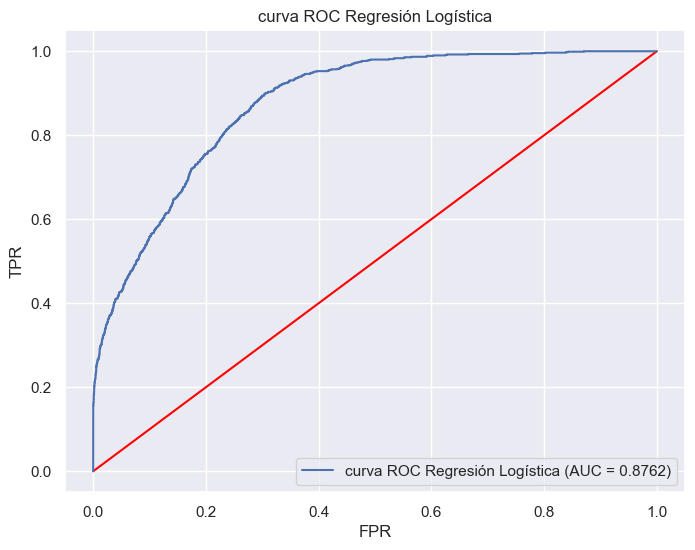

In [250]:
## Gráfica curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

* El AUC es 0.876, lo que indica que el modelo tiene una buena capacidad para discriminar entre las clases. Sin embargo, es posible que esta capacidad esté influenciada por el alto porcentaje de la clase mayoritaria.

### Ejecutando con varios optimizadores y reguladores

Haremos variaciones en los valores de **solver** y **regularization**. Con esto vamos a realizar comparaciones con varios modelos y analizar si alguno puede mejoras nuestros valores

In [251]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
Cs=[0.01,0.02,0.05,0.1,0.3,0.5,0.75,1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(x_train_scaled,y_train)
        yhat = LR.predict(x_test_scaled)
        yhat_proba = LR.predict_proba(x_test_scaled)[:,1]
        print("Solver="+s+", C="+str(c)+"->Accuracy: "+str(accuracy_score(y_test,yhat))+"->Recall: "+str(recall_score(y_test,yhat))+"->AUC : "+str(roc_auc_score(y_test,yhat_proba)))

Solver=newton-cg, C=0.01->Accuracy: 0.9195402298850575->Recall: 0.03303964757709251->AUC : 0.8275894421226699
Solver=newton-cg, C=0.02->Accuracy: 0.9219120598430943->Recall: 0.0671806167400881->AUC : 0.8396094459960267
Solver=newton-cg, C=0.05->Accuracy: 0.9257434774676154->Recall: 0.11563876651982379->AUC : 0.8550657397191729
Solver=newton-cg, C=0.1->Accuracy: 0.9272030651340997->Recall: 0.1343612334801762->AUC : 0.8660463124677402
Solver=newton-cg, C=0.3->Accuracy: 0.9295748950921364->Recall: 0.1685022026431718->AUC : 0.8762278957944281
Solver=newton-cg, C=0.5->Accuracy: 0.9306695858419997->Recall: 0.1905286343612335->AUC : 0.8770037721414492
Solver=newton-cg, C=0.75->Accuracy: 0.9317642765918628->Recall: 0.20814977973568283->AUC : 0.8766685777856842
Solver=newton-cg, C=1->Accuracy: 0.9322203977376391->Recall: 0.21475770925110133->AUC : 0.8761740017999716
Solver=lbfgs, C=0.01->Accuracy: 0.9195402298850575->Recall: 0.03303964757709251->AUC : 0.8275897707445871
Solver=lbfgs, C=0.02->Ac

* ***Notamos que si bien es cierto el Accuracy y el AUC están dando valores altos, por más que modificamos los hiperparámetros del modelo, sigue dando un valor bajo de RECALL, que es una variable importante para nuestra clase minoritaria, que en este caso es nuestro objetivo***
* ***Debido a esto, consideramos evaluar el modelo, con nuestra data balanceada al 23% aproximadamente***

### 3.1.2 <ins>Para la data Escalada y Primer Balanceo</ins>

***Data a utilizar***
   * x_train_balanced
   * y_train_balanced
   * x_test_scaled
   * y_test

In [252]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()

In [253]:
## Entrenando el modelo con nuestra data
reglog.fit(x_train_balanced,y_train_balanced) 

LogisticRegression()

In [254]:
##variables utilizadas
reglog.feature_names_in_

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', "education_Master's & above",
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'], dtype=object)

In [255]:
## Coeficientes del modelo
reglog.coef_

array([[-0.3189713 , -0.96963516,  1.13350846,  0.55366727,  1.98862964,
         1.59434323, 14.97345699,  5.51493643,  7.72073233,  5.15720597,
         5.64189508,  3.38189858, -0.63415675,  8.22838211,  1.28695059,
        -0.06191245,  0.21155242,  0.02165003,  0.03591495,  0.03073556]])

In [256]:
## Predicción de probabilidades
reglog.predict_proba(x_test_scaled)[:,1]

array([0.02734589, 0.02824743, 0.09522541, ..., 0.40449666, 0.02973579,
       0.08125447])

In [257]:
## Predicción de la categoría
reglog.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [258]:
y_pred_train = reglog.predict(x_train_balanced)
y_pred_test = reglog.predict(x_test_scaled)

y_proba_test = reglog.predict_proba(x_test_scaled)[:,1]

In [259]:
### Métricas para evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10054
           1       0.39      0.44      0.41       908

    accuracy                           0.90     10962
   macro avg       0.67      0.69      0.68     10962
weighted avg       0.90      0.90      0.90     10962



* El modelo balanceado al 23% aprox. muestra un alto valor de precisión para la clase 0 (95%), pero un valor mucho más bajo de precisión para la clase 1 (39%). Esto podría indicar que el modelo tiene una tendencia a clasificar las instancias como clase 0, lo que puede deberse a que sigue habiendo desbalanceo de clases.

* El recall para la clase 1 se incremento (44%), lo que significa que el modelo mejoro en buena forma, ya que este indicador nos muestra que hay mejoras en la identificación de la instancia de la clase 1 para este modelo. De todas maneras, quizás pueda mejorar si balanceamos un poco más, habría que analizar los demás valores.

* El accuracy global sigue siendo alto (90%), lo cual es un buen indicador de que nuestro modelo a pesar de modificar la data inicial, mantiene valores buenos.

* El F1-score, el cual nos proporciona un equilibrio entre precision y recall, aumento en valor (44%) para la clase 1, lo cual nos indica que el modelo mejoró. Lo ideal seria tener un F1-score superior al 50%, pero consideramos que vamos en buen camino

* Tenemos que intentar subir el valor del recall y asi subir el F1_score a más de 50%.

In [260]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y,y_proba,label=''):
    '''
    Dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y,y_proba)
    fpr, tpr, thresholds = roc_curve(y,y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size':12})
    plt.plot(fpr,fpr,c='red')
    plt.plot(fpr,tpr,label=(f'curva ROC {label} (AUC = {auc_roc:.4f})'))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f'curva ROC {label}')
    plt.legend(loc=4, numpoints=1)

In [261]:
## ROC AUC
roc_auc_score(y_test,y_proba_test)

0.8782798110467792

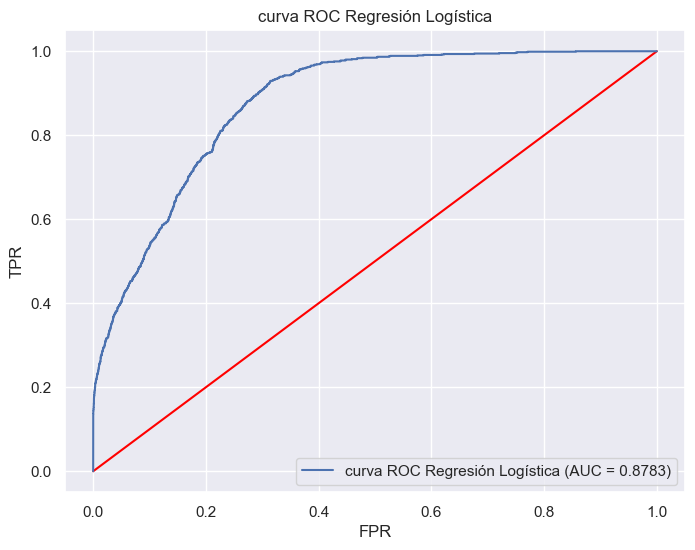

In [262]:
## Gráfica curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

* El AUC es 0.8783, lo que indica que el modelo tiene una buena capacidad para discriminar entre las clases. Observamos que despues del balanceo, este valor aumento ligeramente, es un buen indicio de que nuetro modelo va por buen camino.

### Ejecutando con varios optimizadores y reguladores

Haremos variaciones en los valores de **solver** y **regularization**. Con esto vamos a realizar comparaciones con varios modelos y analizar si alguno puede mejoras nuestros valores

In [263]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
Cs=[0.01,0.02,0.05,0.1,0.3,0.5,0.75,1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(x_train_balanced,y_train_balanced)
        yhat = LR.predict(x_test_scaled)
        yhat_proba = LR.predict_proba(x_test_scaled)[:,1]
        print("Solver="+s+", C="+str(c)+"->Accuracy: "+str(accuracy_score(y_test,yhat))+"->Recall: "+str(recall_score(y_test,yhat))+"->AUC : "+str(roc_auc_score(y_test,yhat_proba)))

Solver=newton-cg, C=0.01->Accuracy: 0.9074074074074074->Recall: 0.21255506607929514->AUC : 0.8316106789854609
Solver=newton-cg, C=0.02->Accuracy: 0.9051268016785258->Recall: 0.24669603524229075->AUC : 0.8428277499739294
Solver=newton-cg, C=0.05->Accuracy: 0.9028461959496442->Recall: 0.289647577092511->AUC : 0.8574630366067288
Solver=newton-cg, C=0.1->Accuracy: 0.9012041598248495->Recall: 0.31828193832599116->AUC : 0.8674358354752181
Solver=newton-cg, C=0.3->Accuracy: 0.9001094690749863->Recall: 0.38876651982378857->AUC : 0.8763385318399586
Solver=newton-cg, C=0.5->Accuracy: 0.8991972267834337->Recall: 0.4118942731277533->AUC : 0.8777131573205132
Solver=newton-cg, C=0.75->Accuracy: 0.89792008757526->Recall: 0.42951541850220265->AUC : 0.8781245919611192
Solver=newton-cg, C=1->Accuracy: 0.8970990695128627->Recall: 0.43612334801762115->AUC : 0.8782825495627576
Solver=lbfgs, C=0.01->Accuracy: 0.9074074074074074->Recall: 0.21255506607929514->AUC : 0.8316050924128647
Solver=lbfgs, C=0.02->Acc

* ***Notamos que no conseguimos valores mayores de RECALL, por más que variemos los hiperparámetros.***
* ***Habría que analizar nuestra data con un balanceo un poco mayor, y ver como se comportan los valores***

### 3.1.3 <ins>Para la data Escalada y Segundo Balanceo</ins>

***Data a utilizar***
   * x_train_balanced_2
   * y_train_balanced_2
   * x_test_scaled
   * y_test

In [281]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()

In [282]:
## Entrenando el modelo con nuestra data
reglog.fit(x_train_balanced_2,y_train_balanced_2) 

LogisticRegression()

In [283]:
##variables utilizadas
reglog.feature_names_in_

array(['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', "education_Master's & above",
       'gender_m', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'], dtype=object)

In [284]:
## Coeficientes del modelo
reglog.coef_

array([[-0.31304253, -1.08505028,  1.14770679,  0.59134048,  2.09614292,
         1.6175325 , 15.19152604,  5.58860564,  7.80298941,  5.32613393,
         5.74372768,  3.4256851 , -0.61827986,  8.33278779,  1.30600777,
        -0.07252265,  0.21652305,  0.01709727,  0.04571235,  0.02124304]])

In [285]:
## Predicción de probabilidades
reglog.predict_proba(x_test_scaled)[:,1]

array([0.03224296, 0.03396062, 0.11504066, ..., 0.47629654, 0.03589898,
       0.09271706])

In [286]:
## Predicción de la categoría
reglog.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [287]:
y_pred_train = reglog.predict(x_train_balanced_2)
y_pred_test = reglog.predict(x_test_scaled)

y_proba_test = reglog.predict_proba(x_test_scaled)[:,1]

In [288]:
### Métricas para evaluar el modelo
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93     10054
           1       0.33      0.52      0.40       908

    accuracy                           0.87     10962
   macro avg       0.64      0.71      0.67     10962
weighted avg       0.90      0.87      0.89     10962



* El modelo balanceado al 28% aprox. muestra un alto valor de precisión para la clase 0 (95%), pero un valor mucho más bajo de precisión para la clase 1 (33%). Esto podría indicar que el modelo tiene una tendencia a clasificar las instancias como clase 0, lo que puede deberse a que sigue habiendo desbalanceo de clases. Notamos que a medida que balanceamos mejor los datos, nuestra precisión va disminuyendo, lo cual genera que el F1-score no aumente como habiamos pensado

* El recall para la clase 1 se incremento (52%), lo que significa que el modelo mejoro en buena forma, ya que este indicador nos muestra que hay mejoras en la identificación de la instancia de la clase 1 para este modelo. 

* El accuracy global sigue siendo alto (87%), lo cual es un buen indicador de que nuestro modelo a pesar de modificar la data inicial, mantiene valores buenos.

* El F1-score, el cual nos proporciona un equilibrio entre precision y recall, aumento en valor (40%) para la clase 1, lo cual nos indica que el modelo no mejoro, se podría decir que se mantiene como el balanceo anterior. Lo ideal seria tener un F1-score superior al 50%, pero consideramos que vamos en buen camino.

* Subimos el valor del recall, pero segun notamos el F1_score se mantiene debido a que la precisión baja.

In [289]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y,y_proba,label=''):
    '''
    Dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y,y_proba)
    fpr, tpr, thresholds = roc_curve(y,y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size':12})
    plt.plot(fpr,fpr,c='red')
    plt.plot(fpr,tpr,label=(f'curva ROC {label} (AUC = {auc_roc:.4f})'))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f'curva ROC {label}')
    plt.legend(loc=4, numpoints=1)

In [290]:
## ROC AUC
roc_auc_score(y_test,y_proba_test)

0.8782522068057161

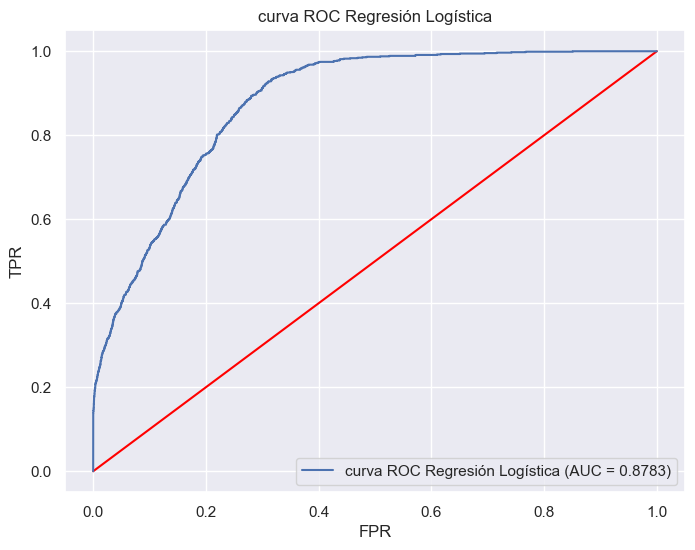

In [291]:
## Gráfica curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

* El AUC es 0.8783, lo que indica que el modelo tiene una buena capacidad para discriminar entre las clases. Observamos que despues del balanceo, este valor se mantuvo, es un buen indicio de que nuetro modelo va por buen camino.

### Ejecutando con varios optimizadores y reguladores

Haremos variaciones en los valores de **solver** y **regularization**. Con esto vamos a realizar comparaciones con varios modelos y analizar si alguno puede mejoras nuestros valores

In [292]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
Cs=[0.01,0.02,0.05,0.1,0.3,0.5,0.75,1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(x_train_balanced_2,y_train_balanced_2)
        yhat = LR.predict(x_test_scaled)
        yhat_proba = LR.predict_proba(x_test_scaled)[:,1]
        print("Solver="+s+", C="+str(c)+"->Accuracy: "+str(accuracy_score(y_test,yhat))+"->Recall: "+str(recall_score(y_test,yhat))+"->AUC : "+str(roc_auc_score(y_test,yhat_proba)))

Solver=newton-cg, C=0.01->Accuracy: 0.8777595329319468->Recall: 0.3491189427312775->AUC : 0.833907855728844
Solver=newton-cg, C=0.02->Accuracy: 0.8736544426199598->Recall: 0.3755506607929515->AUC : 0.8448928101029769
Solver=newton-cg, C=0.05->Accuracy: 0.8713738368910783->Recall: 0.3986784140969163->AUC : 0.8591521532622517
Solver=newton-cg, C=0.1->Accuracy: 0.8721948549534756->Recall: 0.43612334801762115->AUC : 0.8683820475161002
Solver=newton-cg, C=0.3->Accuracy: 0.873380769932494->Recall: 0.4955947136563877->AUC : 0.8762620724738395
Solver=newton-cg, C=0.5->Accuracy: 0.8724685276409414->Recall: 0.5066079295154186->AUC : 0.8775404117325912
Solver=newton-cg, C=0.75->Accuracy: 0.8727422003284072->Recall: 0.5187224669603524->AUC : 0.8780518569767309
Solver=newton-cg, C=1->Accuracy: 0.8723773034117862->Recall: 0.5209251101321586->AUC : 0.8782516591025205
Solver=lbfgs, C=0.01->Accuracy: 0.8777595329319468->Recall: 0.3491189427312775->AUC : 0.8339113610292965
Solver=lbfgs, C=0.02->Accuracy

* ***Notamos que no conseguimos valores mayores de RECALL, por más que variemos los hiperparámetros.***
* ***Consideramos que hemos conseguido buenos valores, evaluamos si nos quedamos con este ultimo modelo, evaluado con el balanceo***